# Customer Retention Analysis
The subject of customer retention, loyalty, and churn is receiving attention in many industries. This is important in the customer lifetime value context. A company will have a sense of how much is really being lost because of the customer churn and the scale of the efforts that would be appropriate for retention campaign. The mass marketing approach cannot succeed in the diversity of consumer business today. Customer value analysis along with customer churn predictions will help marketing programs target more specific groups of customers.

This project is aimed to

1. Understand the causes and/or scenarios causing attrition of customers 
2. Provide a predictive model that ranks the customers 
3. Learn the factors which are strongly correlated with churn rate 
4. Make recommendations to minimize the revenue loss 



# Need for Predicting Customer Churn
Our data in this project was of company operating in a Telecommunication sector. In this sector a company must operate on a long-term customer strategy, young customers are recognized as being unprofitable in the early stage in lifecycle but will become profitable later on. So as the customer relationships last, maybe decades, the company must address the value of a potential loss of a customer. The Customer Retention Analysis will help to face this challenge.

# Dataset
In this project [Telco Customer Churn dataset](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv) is used to study the customer behavior to develop focused customer retention programs.

This dataset has 7043 samples and 21 features, the features includes 

1. Customers who left within the last month – the column is called **Churn**
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

# Project Scope

1. Which variables influences if the client will leave? 
2. What are the most important variables to look?
3. Which clients have the highest chance of leaving?
4. Propose solutions to prevent Customer Churn.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import pickle

## Data Ingestion

In [63]:
#Loading the data
df = pd.read_excel("Customer-Churn-Dataset.xls")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
df.shape

(7043, 21)

* Replace empty spaces (if any) with NA values.

In [65]:
#Replacing empty spaces with Null values
df = df.replace(r'^\s+$', np.nan, regex=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [67]:
# Check for Null Values
df.apply(lambda x: sum(x.isnull()), axis=0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Dropping few NaN rows that has Null values

In [68]:
# Dropping NA values
df = df.dropna()

## Visualizing the Missingness of Data

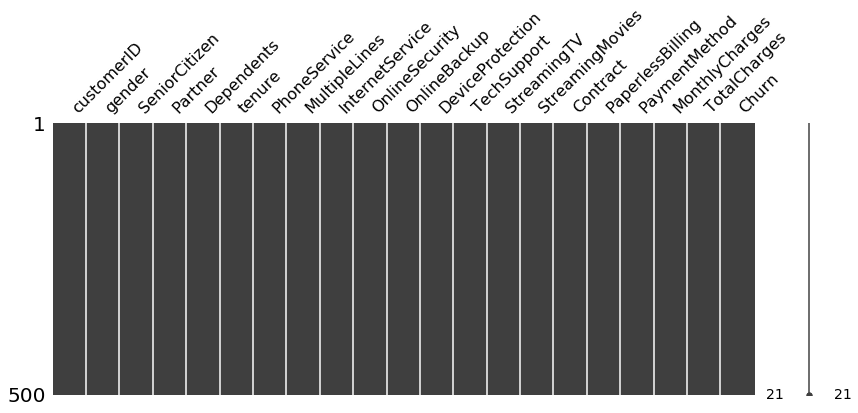

In [69]:
# Matrix of missingness of the data
missingness=msno.matrix(df.sample(500), figsize=(14, 5), width_ratios=(14, 1));

* Above plot shows that there is no more missing data in the dataset 

* **CustomerId** is specific and unique to every row and it doesn’t help to predict if the client is going to Churn. Deleting the CustomerID.

In [70]:
# Deleting the custumerID column
del df["customerID"]

* While exploring data it has been observed that TotalCharges and Monthly Charges are correlated and MonthlyCharges is approximately equal to product of MonthlyCharges and tenure which makes MonthlyCharges redundant. Dropping TotalCharges.

In [71]:
# Deleting TotalCharges variable from the data
del df["TotalCharges"]

* Force change of 'dtypes' to numeric and categorical.

In [72]:
all_columns_list = df.columns.tolist()
numerical_columns_list = ['tenure','MonthlyCharges']
categorical_columns_list = [e for e in all_columns_list if e not in numerical_columns_list]
for index in categorical_columns_list:
    df[index] = pd.Categorical(df[index])
for index in numerical_columns_list:
    df[index] = pd.to_numeric(df[index])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
gender              7032 non-null category
SeniorCitizen       7032 non-null category
Partner             7032 non-null category
Dependents          7032 non-null category
tenure              7032 non-null int64
PhoneService        7032 non-null category
MultipleLines       7032 non-null category
InternetService     7032 non-null category
OnlineSecurity      7032 non-null category
OnlineBackup        7032 non-null category
DeviceProtection    7032 non-null category
TechSupport         7032 non-null category
StreamingTV         7032 non-null category
StreamingMovies     7032 non-null category
Contract            7032 non-null category
PaperlessBilling    7032 non-null category
PaymentMethod       7032 non-null category
MonthlyCharges      7032 non-null float64
Churn               7032 non-null category
dtypes: category(17), float64(1), int64(1)
memory usage: 283.3 KB


# Exploratory Data Analysis

## EDA Plan
> Sourced from [Aparna C Shastry - Customer Retention Case Study](https://github.com/aparnack/data_science/blob/master/projects/customer_retention/Customer%20Retention_SlideDeck.pdf)

Exploratory data analysis consists of the following major tasks, which we present linearly here because each task doesn't make much sense to do without the ones prior to it. However, in reality, you are going to constantly jump around from step to step.  You may want to do all the steps for a subset of the variables first. Or often, an observation will bring up a question you want to investigate and you'll branch off and explore to answer that question before returning down the main path of exhaustive EDA.

1. Form hypotheses/develop investigation themes to explore 
3. Wrangle data 
3. Assess quality of data 
4. Profile data
5. Explore each individual variable in the dataset
6. Assess the relationship between each variable and the target 
7. Assess interactions between variables 
8. Explore data across many dimensions 

Throughout the entire analysis you want to:
* Capture a list of hypotheses and questions that come up for further exploration.
* Record things to watch out for/ be aware of in future analyses. 
* Show intermediate results to colleagues to get a fresh perspective, feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge. 
* Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity. 

## Splitting the Dataset into Numeric and Objects to facilitate the Analysis

In [74]:
# Splitting data according to datatypes
num = ['float64', 'int64']
num_df = df.select_dtypes(include=num)
obj_df = df.select_dtypes(exclude=num)

Splitting dataset into numeric and categorical variables enables us to perform extensive analysis with specific variables and with several combination of variables.

In [75]:
num_df.describe()

,tenure,MonthlyCharges
count,7032.000000,7032.000000
mean,32.421786,64.798208
std,24.545260,30.085974
min,1.000000,18.250000
25%,9.000000,35.587500
50%,29.000000,70.350000
75%,55.000000,89.862500
max,72.000000,118.750000


In [76]:
obj_df.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [77]:
df.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

* Churn Percentage

In [78]:
df['Churn'].value_counts(normalize = True) * 100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

* As per the given dataset 74% of customer will remain loyal to organization and rest 26% will leave the organization.

## Univariate Distribution
>Considers Numeric Variables

A univariate frequency analysis was used to pinpoint value distributions, missing values and outliers. For Univariate analysis following plots are used

1. Boxplots
2. Histograms


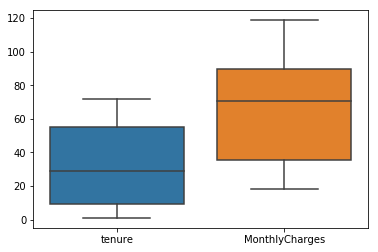

In [79]:
sns.boxplot(data = num_df);

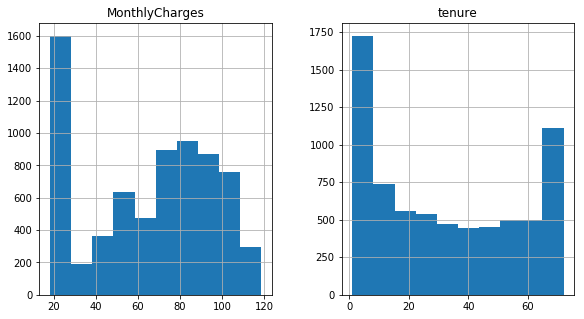

In [80]:
# histogram plots
num_df.hist(layout=(1,3), figsize=(15,5))
plt.plot();

* The above two plots shows that the numeric variables are not normally distributed.
* Further, checking how they are related to the target variable.

* Adding 'Churn' variable in numeric dataset

In [81]:
num_df = pd.concat([num_df,df["Churn"]],axis=1)

In [82]:
num_df.head()

,tenure,MonthlyCharges,Churn
0,1,29.85,No
1,34,56.95,No
2,2,53.85,Yes
3,45,42.30,No
4,2,70.70,Yes


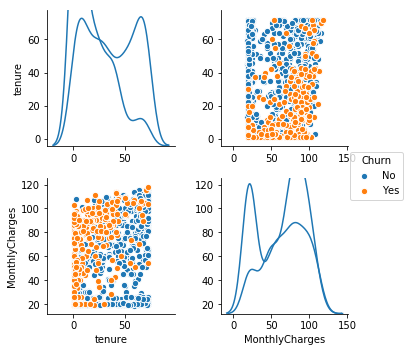

In [83]:
#Plotting pair plot to identify relationship between 'Churn' and other variables
g = sns.PairGrid(num_df.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

* From the above plots it is clear that the numeric variables of dataset including MonthlyCharges and tenure are evenly distributed in the context of Churn and are good predictors of Churn variable.

## Bivariate Distribution

Bivariate Distribution helps to identify how each numeric variable is distributed with respect to target variable 'Churn'

Process:
* Use violin plots to decide bins of the numerical variables that we are going to use.
* Divide the numerical variables into bins and plot separately to identify the low and high Churn areas using Countplots.

Plotting for 'tenure' variable with respect to target variable 'Churn'

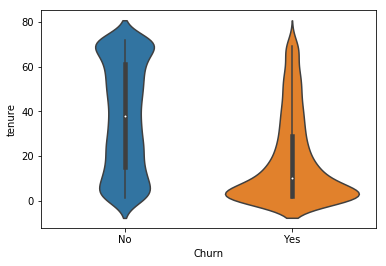

In [84]:
sns.violinplot(x="Churn", y="tenure", data=num_df);

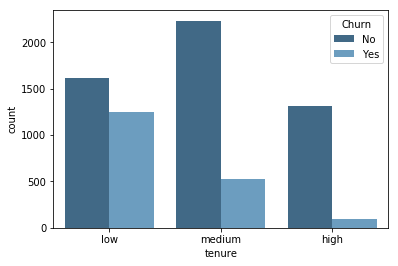

In [85]:
#Creating bins and plotting Countplot for 'tenure'
tenure_bins=pd.cut(num_df["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=num_df, palette="Blues_d");

Plotting for 'MonthlyCharges' variable with respect to target variable 'Churn'

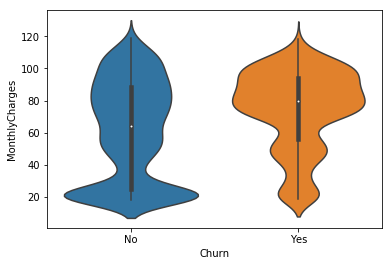

In [86]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=num_df);

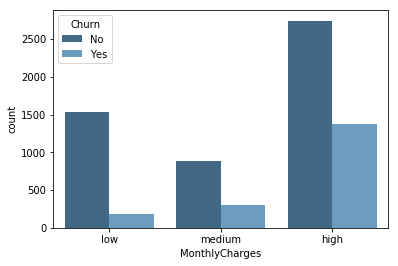

In [87]:
#Creating bins and plotting Countplot for 'MonthlyCharges'
MonthlyCharges_bins=pd.cut(num_df["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=num_df, palette="Blues_d");

**Inference:**
The numerical variables are divided in 3 bins according to the violin plot trying to separate them in a way to distinguish the low churn rate areas from the high churn rate areas, justified by count plots showing how distribution is different in each bin.

**From the above plots following can be deducted:**

* Less than a year tenure category has highest churn
* Customers paying high Monthly charges tends to churn more
* 2 to 5 years tenure category results in highest revenue loss
* There is not much variation in medium bin which means customer remain loyal as they cross a year

## Numerical vs Categorical Variables
>Plot numeric and categorical variables to explore the dependency of variables on each other.

Since there are too many categorical variables , splitting them into 3 different sets and then plotting each set with the numerical variables

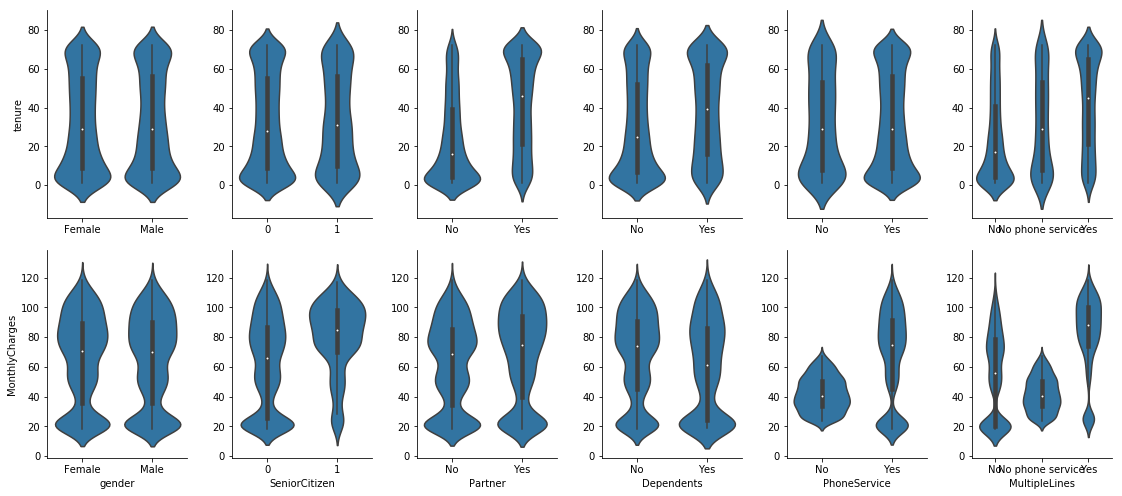

In [88]:
# Splitting the first set and plotting against numeric variables
g = sns.PairGrid(df, x_vars=obj_df.columns[0:6].values,
    y_vars=num_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

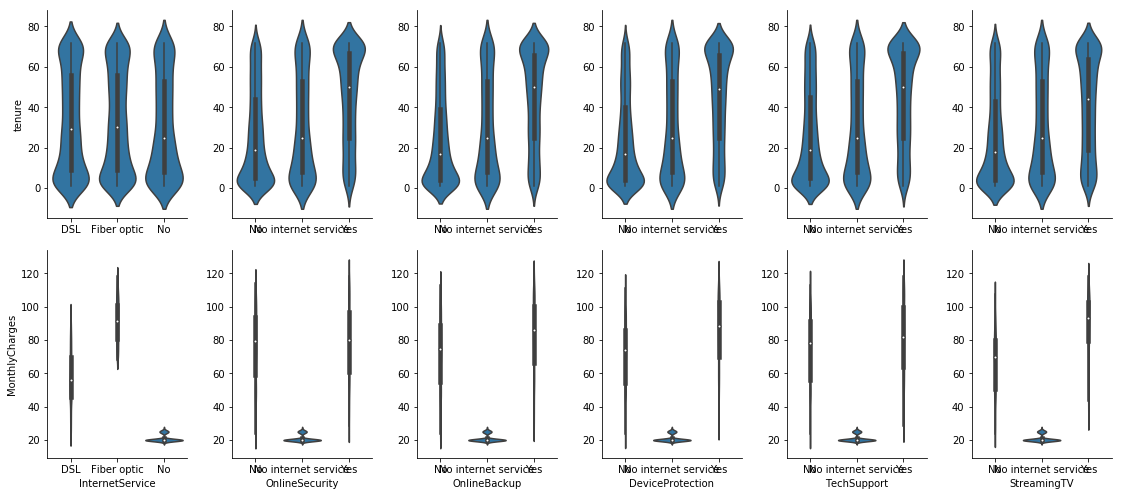

In [89]:
# Splitting the second set and plotting against numeric variables
g = sns.PairGrid(df, x_vars=obj_df.columns[6:12].values,
    y_vars=num_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

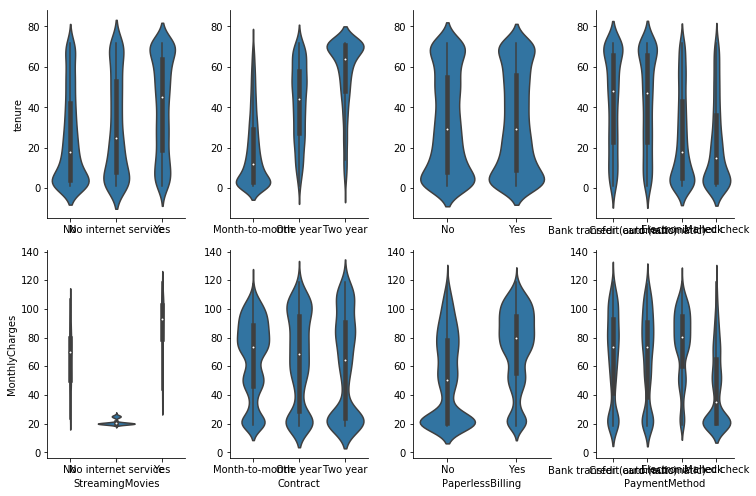

In [90]:
# Splitting the third set and plotting against numeric variables
g = sns.PairGrid(df, x_vars=obj_df.columns[12:16].values,
    y_vars=num_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

**From the above plots following can be deduced:**

* Customers with Eletronic or Mailed check payment method have a lower tenure
* Variable like gender does not influence tenure and monthly payment 
* The importance of Fibre optic service on monthly revenue is very clear
    
> The above conclusions from the plots are very important to design the campaigns for the firm to focus on the specific areas which needs to be enhanced in terms of service quality or affordable price to reduce the customer's churn rate. 

## Categorical Variables

* Main target for analysis of categorical values is to focus on the variables that delivers best results in context of churn of clients

* Use Countplots to decide which categorical variables are most effective with respect to Customer Churn 

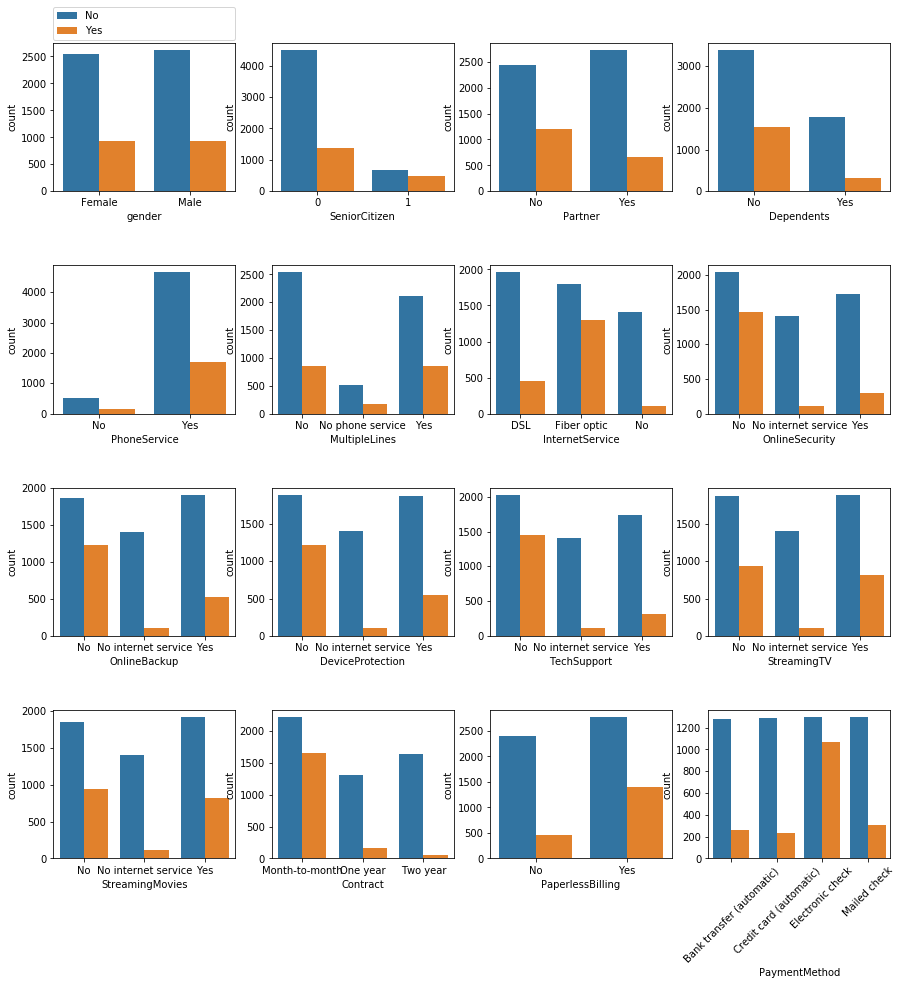

In [91]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=obj_df.iloc[:,i], hue=obj_df["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

**The above plots gives a better picture of variables that are more important such as**

* Month-to-month contract is a strong indicator if the client might leave
* Electronic check payment method also provide clear view to the client stability
* On the other hand Senior citizen is a good predictor but only represents a small amount of clients
    
Above plots helps to focus on the variables that delivers best results in terms of Churn of company clients

# Feature Engineering

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning.

> Feature engineering is an informal topic, but it is considered essential in applied machine learning.

In the dataset:
    
* There are columns with a scope of transformation, like SeniorCitizen
* There is no null data in the dataset as it has been removed intially
* Variable like CustomerId is redundant as it does not help in prediction of the churn of the clients, already dropped
* As per Numerical variable analysis TotalCharges and Monthly Charges are correlated and MothlyCharges is approximately equal to product of MonthlyCharges and tenure which makes MonthlyCharges redundant, already dropped




In [92]:
#Converting SeniorCitizen variable into categorical and mapping values of Yes & No to 1 & 0 respectively
df['SeniorCitizen'] = df.SeniorCitizen.map({0:'No', 1:'Yes'})

**Process Followed:**
* Merge the numerical variables bins into dataframe
* Concatenate with the categorical variables
* Transform the categorical variables into binary vectors
* Split the dataset into training and testing

In [93]:
# Saving numeric variable bins into a dataframe
bins = pd.DataFrame([tenure_bins, MonthlyCharges_bins]).T

In [94]:
# Concatenate bins with object variables
transformed_df = pd.concat([bins,obj_df],axis=1)

In [95]:
transformed_df.head()

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,low,low,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,medium,medium,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,low,medium,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,medium,medium,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,low,high,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


## Dummy Variables

> A dummy variable (also known as an indicator variable, design variable, Boolean indicator, binary variable, or qualitative variable) is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. Dummy variables are used as devices to sort data into mutually exclusive categories. A dummy variable can thus be thought of as a truth value represented as a numerical value 0 or 1

* Dummy variables are used as devices to sort data into mutually exclusive categories
* Converting the categorial variables into dummy variables (extensive categories) to indicate the occurence of major prediction values
* In this project we have converted all variables to dummy except target variable Churn

In [96]:
dummy_columns = [e for e in transformed_df.columns if e != 'Churn']
# Creating dataframe of dummy variables
df_dummies = pd.get_dummies(data=transformed_df, columns=dummy_columns)

In [97]:
df_dummies.head()

,Churn,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,gender_Female,gender_Male,SeniorCitizen_0,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,No,0,0,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,Yes,0,1,0,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,No,0,0,1,0,0,1,0,1,1,...,0,0,1,0,1,0,1,0,0,0
4,Yes,0,1,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [98]:
# Splitting dependent and independent variables for extracting important features
df_dummies_features = df_dummies.drop(["Churn"], axis=1).columns
X_all = df_dummies[df_dummies_features]
y_all = df_dummies["Churn"]

# Feature Selection

> In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

> The central premise when using a feature selection technique is that the data contains many features that are either redundant or irrelevant and can thus be removed without incurring much loss of information.


** Using Boruta Library for Feature Selection**

## Boruta Library

> The Boruta algorithm is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features you might have in your dataset with respect to an outcome variable.

In [99]:
# Change X and y to its values
X_boruta = X_all.values
y_boruta = y_all.values

# Define random forest classifier, with utilising all cores and sampling in proportion to y labels
rfc = RandomForestClassifier(n_jobs = -1)
 
# Define Boruta feature selection method
feature_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
 
# Find all relevant features
feature_selector.fit(X_boruta, y_boruta)

#Transposing dataframe for ranking
df_features_rank = df_dummies.drop(['Churn'],axis=1).T

# Check ranking of features
df_features_rank['Boruta_Rank'] = feature_selector.ranking_
df_features_rank

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	37


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	37


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	37


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	37


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40
Iteration: 	29 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	41


BorutaPy finished running.

Iteration: 	30 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	41


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


,0,1,2,3,4,5,6,7,8,9,...,7034,7035,7036,7037,7038,7039,7040,7041,7042,Boruta_Rank
tenure_high,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,6
tenure_low,1,0,1,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,1,0,1
tenure_medium,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
MonthlyCharges_high,0,0,0,0,1,1,1,0,1,0,...,1,1,1,0,1,1,0,1,1,30
MonthlyCharges_low,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,38
MonthlyCharges_medium,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,31
gender_Female,1,0,0,0,1,1,0,1,1,0,...,1,0,1,1,0,1,1,0,0,10
gender_Male,0,1,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,1,10
SeniorCitizen_0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,20
SeniorCitizen_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,18


In [100]:
# Adding a variable 'Feature' in the dataframedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB3MAAAPoCAYAAADEMdR4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzs3XmcZlV17//PVxqZo8igoGAbBJWxCQXKGCBIFI2CoiAERXPlEokE/KEhJBcQUTEYiSYYbAyD/hAxCDhEAZknBQroCQS9CCqKKCrK1A206/7x7JKni+qq6u5qnqe6P+/Xq191zj77rL3Oqe6/Vq99UlVIkiRJkiRJkiRJkvrLc3qdgCRJkiRJkiRJkiTpmSzmSpIkSZIkSZIkSVIfspgrSZIkSZIkSZIkSX3IYq4kSZIkSZIkSZIk9SGLuZIkSZIkSZIkSZLUhyzmSpIkSZIkSZIkSVIfspgrSZIkSZIkSZIkSX3IYq4kSZIkSZIkSZIk9SGLuZIkSZIkSZIkSZLUh6b0OgFJE+d1r3tdXXzxxb1OQ5IkSZIkSZIkSaPLeCbZmSstQx588MFepyBJkiRJkiRJkqQJkqrqdQ6SJsiaa29Su73pM71OYwEXnPG6XqcgSZIkSZIkSZLUb+zMlSRJkiRJkiRJkqTJymKuJEmSJEmSJEmSJPUhi7mSJEmSJEmSJEmS1Ics5kqSJEmSJEmSJElSH7KYq2VSkucneV+v8xguySO9zkGSJEmSJEmSJEmTg8VcLaueDyzVYm6SKUszviRJkiRJkiRJkpZvFnO1rDoJ2CjJjCQnJ/lgkpuTzEryYYAkU5N8P8npSW5PcmmSVdq1q5IMtOO1k9zbjg9O8t9JvgFc2saeEXss6Tg5yZwks5Ps18Y/m+RN7fjCJGe0479JcuKEviFJkiRJkiRJkiT1NYu5WlYdDdxdVdOA7wAbA9sB04BtkuzS5m0MnFpVmwEPAW8dR+ztgXdV1e5J9hwl9mje0uZvBewBnJxkPeAaYOc258XApu14J+DakQIlOSTJYJLBeXN/N46lJUmSJEmSJEmSNBlYzNXyYM/25zbgVuCVdAqwAPdU1Yx2fAswdRzxvlNVvxlH7NHsBJxbVfOr6gHgamBbOgXbnZNsCtwBPNCKvNsDN4wUqKqmV9VAVQ2stPLzxrG0JEmSJEmSJEmSJgO/+anlQYCPV9XnFhhMpgLzuobmA6u046d4+j87rDws3qNjxR5nTs9QVT9LsibwOjpdui8A3g48UlUPL+IakiRJkiRJkiRJmsTszNWy6mFgjXZ8CfCeJKsDJHlxknXHuP9eYJt2vO8o8xYnNnQKtfslWSHJOsAuwE3t2neBI9qca4GjWMgWy5IkSZIkSZIkSVp22ZmrZVJV/TrJ9UnmAN8GvgR8NwnAI8Bf0+nEXZhPAl9JchBwxSjrXJrkVSPE/uUYKV5IZ+vkmUABH6qqX7Rr1wJ7VtX/TfJjOt25FnMlSZIkSZIkSZKWM6mqXucgaYKsufYmtdubPtPrNBZwwRmv63UKkiRJkiRJkiRJ/WbET3IO5zbLkiRJkiRJkiRJktSH7MyVJliStYDLR7j0F1X166W59sDAQA0ODi7NJSRJkiRJkiRJkrTkxtWZ6zdzpQnWCrbTep2HJEmSJEmSJEmSJje3WZYkSZIkSZIkSZKkPmQxV5IkSZIkSZIkSZL6kNssS8uQH/3kYfZ/35W9TmMBX/7sbr1OQZIkSZIkSZIkaVKyM1eSJEmSJEmSJEmS+pDFXEmSJEmSJEmSJEnqQxZzJUmSJEmSJEmSJKkPWcyVJEmSJEmSJEmSpD5kMVeSJEmSJEmSJEmS+pDFXPVEkucneV+v81iaklyVZKAdfyvJ83udkyRJkiRJkiRJkiYPi7nqlecDS7WYm2TK0oy/KKpqr6p6qNd5SJIkSZIkSZIkafKwmKteOQnYKMmMJCcn+WCSm5PMSvJhgCRTk3w/yelJbk9yaZJV2rXurte1k9zbjg9O8t9JvgFc2saeEXskbb07k3w+yZwk5yTZI8n1SX6YZLs2b7UkZ7SYtyV5cxtfJcmX2zrnAat0xb635Tk1yZyu8aOSHN/1TKckuaY997ZJLmhrnzhK3ockGUwyOO/x3y3WL0OSJEmSJEmSJEn9x2KueuVo4O6qmgZ8B9gY2A6YBmyTZJc2b2Pg1KraDHgIeOs4Ym8PvKuqdk+y5yixR/Jy4NPAlsArgQOAnYCjgGPanH8CrqiqbYHdgJOTrAb8LfBYVW0JfBTYZhy5DvdEVe0CnAZ8DTgM2Bw4OMlaI91QVdOraqCqBlZa5XmLsaQkSZIkSZIkSZL6Ud9sQ6vl2p7tz23tfHU6BdifAPdU1Yw2fgswdRzxvlNVvxkj9jULufeeqpoNkOR24PKqqiSzu9beE3hTkqPa+crAhsAuwGcAqmpWklnjyHW4r7efs4Hbq+r+lsuPgA2AXy9GTEmSJEmSJEmSJE1CFnPVDwJ8vKo+t8BgMhWY1zU0n6e3Ln6KpzvLVx4W79GxYo+ie70/dJ3/gaf/vQR4a1XdNSxfgBojfnfe8Mzcu9cbnov/XiVJkiRJkiRJkpYjbrOsXnkYWKMdXwK8J8nqAElenGTdMe6/l6e3Md53lHmLE3sslwDvT6veJtm6jV8DHNjGNqezVfNwDwDrJlkryUrAG5cwF0mSJEmSJEmSJC2j7PRTT1TVr5Ncn2QO8G3gS8B3W330EeCv6XTiLswnga8kOQi4YpR1Lk3yqhFi/3IJ0v8I8G/ArFbQvZdOUfY/gTPb9sozgJtGyOfJJCcANwL3AHcuQR6SJEmSJEmSJElahqVqrF1hJU0WL1j3FbXnvqf1Oo0FfPmzu/U6BUmSJEmSJEmSpH6T8Uxym2VJkiRJkiRJkiRJ6kN25mq5k2Qt4PIRLv1FVf362c5nIg0MDNTg4GCv05AkSZIkSZIkSdLoxtWZ6zdztdxpBdtpvc5DkiRJkiRJkiRJGo3bLEuSJEmSJEmSJElSH7KYK0mSJEmSJEmSJEl9yG2WpWXIvT99hHd94IZep7GAsz+1Q69TkCRJkiRJkiRJmpTszJUkSZIkSZIkSZKkPmQxV5IkSZIkSZIkSZL6kMVcSZIkSZIkSZIkSepDFnMlSZIkSZIkSZIkqQ9ZzNUSSfKiJF9OcneSO5J8K8kmixnriCSrTlBeU5McMMr1v0wyo/15JMld7fgLE7G+JEmSJEmSJEmStKQs5mqxJQlwIXBVVW1UVZsCxwAvXMyQRwAjFnOTrLCIsaYCCy3mVtUlVTWtqqYBg8CB7fydi7jOs2ox3oMkSZIkSZIkSZImKYu5WhK7AU9W1WlDA1U1o6quTcfJSeYkmZ1kP4Akuya5Ksn5Se5Mck6beziwPnBlkivb3EeSnJDkRmD7JMcmubnFnN6KySR5eZLLksxMcmuSjYCTgJ1bt+2Ri/JQSS5Nsmk7np3kmHb88SQHJ3lOkk91Pdu+I8T4eJLDus4/keR97fjoJDclmZXk2K4530hyS5Lbk/yvNjYlyUNJTkxyE7DdCGsdkmQwyeDcxx9alEeVJEmSJEmSJElSH7OYqyWxOXDLQq69BZgGbAXsAZycZL12bWs6XbibAn8K7FhVnwF+DuxWVbu1easBc6rq1VV1HfAfVbVtVW0OrAK8sc07Bzi1qrYCdgDuB44Grm3dtqcs4nNdQ6cQvCYwF9ipje8EXAu8reW+FfBa4JQk6w6L8XngYPhjN+3bgHOT7AVsCLy6vZ8dkuzQ7nlXVW0DbAt8oK0P8Dzg1qrarqq+OzzZqppeVQNVNbDyKs9fxEeVJEmSJEmSJElSv7KYq6VlJ+DcqppfVQ8AV9MpUgLcVFX3VdUfgBl0tkQeyXzgq13nuyW5MclsYHdgsyRrAC+uqgsBqmpuVT22hLlfC+wC7Ax8DVizfcv3xVV1d3u2L7Vn+wVwHTDQHaDNezjJFsDr2zP/Ftiznd8G3Aq8HBj6xvCRSWYC3wVeAmzUxp+gs521JEmSJEmSJEmSliNTep2AJrXbgWdsMdxklPvmdR3PZ+F/D+dW1XyAJCsDnwUGquqnSY4HVh5jncV1I53O2p8D36BTWH0vcFO7Pt41/4tOd+5U4HNd955YVf/VPTHJHnQKyK+pqseTXEfn+QAer6parCeRJEmSJEmSJEnSpGVnrpbEFcBKSd47NJBk2yR/Tmer4v2SrJBkHTqFypsWEmfIw8AaC7k2VNh8MMnqtCJyVf0euC/J3m39lVoX7WixRlVVc4EHgL3pFHavBY5qP2nPtn97thcCOwKDI4T6KvBXdLZTvqyNXQL8TZLVWr4vSbI2na2Uf9MKuZvxdBezJEmSJEmSJEmSllMWc7XYWrfoPsBrk9yd5HbgeDodrRcCs4CZdIq+H2pbEo9mOvDtJFeOsNZDwOnAbOAi4OauywcBhyeZBdwAvKit/VSSmUmOXIzHuxa4v6rmteOX8HQx93zgzvZslwEfqKpfjpDzXDqF33PbltJU1bfa/d9r20V/BVgd+B9g1bbN8rF0isiSJEmSJEmSJElajsXdW6WlI8lz6HwTeO+q+tGzsebaL3xlveHAM56Npcbt7E/t0OsUJEmSJEmSJEmS+s24PutpZ660FCTZArgbuPjZKuRKkiRJkiRJkiRp2WJnrpZ5Sf4S+MSw4Xuqap9e5LM0DQwM1ODgSJ/vlSRJkiRJkiRJUh8ZV2fulKWdhdRrVXUJcEmv85AkSZIkSZIkSZIWhdssS5IkSZIkSZIkSVIfspgrSZIkSZIkSZIkSX3IbZalZciPf/YY7z2mv76Ze/rHBnqdgiRJkiRJkiRJ0qRkZ64kSZIkSZIkSZIk9SGLuZIkSZIkSZIkSZLUhyzmSpIkSZIkSZIkSVIfspgrSZIkSZIkSZIkSX3IYq4kSZIkSZIkSZIk9SGLuZNUkhcl+XKSu5PckeRbSTZZjDhHJFl1gnKamuSAMebsmqSS/E3X2NZt7KjFXHdakr26zo8fT6yWyw6Ls+bSkOSYruOpSeb0Mh9JkiRJkiRJkiT1lsXcSShJgAuBq6pqo6raFDgGeOFihDsCGLGYm2SFRYw1FRi1mNvMBvbrOt8fmLmIa3WbBuw15qxn2hXom2Iund+hJEmSJEmSJEmSBFjMnax2A56sqtOGBqpqBnBdkpOTzEkyO8l+8McO1KuSnJ/kziTnpONwYH3gyiRXtrmPJDkhyY3A9kmOTXJzizm9FZJJ8vIklyWZmeTWJBsBJwE7J5mR5MhR8v8JsHKSF7Z4rwO+PXSxddp+L8msJBcmWbONX5XkE0luSvKDJDsneS5wArBfW3eoSLxpm/+j9pwLSDIVOBQ4st23c5KXJrm8rXt5kg1HSr69o08kuaW9g+261npTm7NykjPb7+G2JLu18YOTXJDk4iQ/TPIvbfwkYJWWyzltqRWSnJ7k9iSXJlllIfkckmQwyeDcx347ymuXJEmSJEmSJEnSZGIxd3LaHLhlhPG30OlS3QrYAzg5yXrt2tZ0unA3Bf4U2LGqPgP8HNitqnZr81YD5lTVq6vqOuA/qmrbqtocWAV4Y5t3DnBqVW1Fp7v1fuBo4NqqmlZVp4zxDOcDb2v33grM67r2BeAfqmpLOl28x3Vdm1JV27VnOa6qngCOBc5r657X5r0S+EtgO+C4JCt2L15V9wKnAae0+64F/gP4Qlv3HOAzC8l9NTpd0dsADwMnAq8F9qFTWAY4rK2zBfAO4OwkK7dr0+h0Jm9Bpwi9QVUdDTzecjmwzduYzjveDHgIeOtIyVTV9KoaqKqBlVddcyEpS5IkSZIkSZIkabKxmLts2Qk4t6rmV9UDwNXAtu3aTVV1X1X9AZhBZ0vkkcwHvtp1vluSG5PMBnYHNkuyBvDiqroQoKrmVtVji5jrV+gUc98BnDs0mOR5wPOr6uo2dDawS9d9F7Sft4zyDAD/U1XzqupB4JeMbwvq7YEvteMv0nmfI3kCuLgdzwaurqon2/FQTju1GFTVncCPgaFvGl9eVb+rqrnAHcBLF7LOPa3jGsZ+XkmSJEmSJEmSJC1jLOZOTrcD24wwnlHu6e58nQ9MWci8uVU1HzpbBQOfBfZtHaanAyuPsc64VNUvgCfpdLRevgi3Dj3HaM/QPe+Pc5Mc1rYxnpFk/fGkmWSFrnuGum6frKpqx38YWqsVyodymojfxXjnSZIkSZIkSZIkaRlkMXdyugJYKcl7hwaSbAv8ls62vSskWYdOR+tNY8R6GFhjIdeGtgV+MMnqwL4AVfV74L4ke7e1V0qy6hixRnIsne2U5w8NVNXvgN8m2bkNHUSnw3hxn+GPqurUto3xtKr6+Qj33QDs344PBK5rXc5D9xw7vscC4JoWgySbABsCd41xz5PDt4OWJEmSJEmSJEnS8sti7iTUukL3AV6b5O4ktwPH09kieBYwk07B90OtA3Y004FvJ7lyhHUeotONOxu4CLi56/JBwOFJZtEpgr6orf1UkplJjhzHc9xQVReNcOlddL73O4vO92VPGGFOtyuBTVv37H5jrdvlG8A+7b6dgcOBd7d1DwL+fhFiDfdZYIW2PfV5wMFVNW+Me6YDs5KcswTrSpIkSZIkSZIkaRmRp3eLlTTZrbPeprX3u7/Q6zQWcPrHBnqdgiRJkiRJkiRJUr8Z12dN7cyVJEmSJEmSJEmSpD5kZ66WiiR/CXxi2PA9VbVPL/JZXgwMDNTg4GCv05AkSZIkSZIkSdLoxtWZO2VpZ6HlU1VdAlzS6zwkSZIkSZIkSZKkycptliVJkiRJkiRJkiSpD9mZKy1DfvLzxznsw7N6ncYCTj1uy16nIEmSJEmSJEmSNCnZmStJkiRJkiRJkiRJfchiriRJkiRJkiRJkiT1IYu5kiRJkiRJkiRJktSHLOZKkiRJkiRJkiRJUh+ymCtJkiRJkiRJkiRJfchirp41SdZKMqP9+UWSn3WdP3cR4pyY5IiFXDs2ye1JZiW5Lcm2E/cEiybJB5KsPMac+5Kc13W+f5LPL/3sJEmSJEmSJEmS1O+m9DoBLT+q6tfANIAkxwOPVNUnJyp+kp2BPYGtq+qJJOvQo7/jSVYAPgCcAcwdY/qrk7yiqu5a+plJkiRJkiRJkiRpsrAzV30hybuS3NS6dD+b5Dlt/A1Jbk0yM8mlXbdskeTqJD9KclgbWw/4VVU9AVBVv6qq+1uc+5I8vx2/Jsll7fjEJGcnuTLJD5O8p43v0cYuSnJHklOTpF376ySzk8xJ8rE2NiXJQy3eTcCHgHWBa4fWGsW/AseM8E7WTvL11mV8Q5LNF/LuDkkymGTw8cd+O/bLliRJkiRJkiRJ0qRgMVc914qU+wA7VNU0Ot20+yd5EfCfwD5VtRWwf9dtmwCvBV4DnNA6YS8GNkpyVyu+7jzOFLYAXg/s2GK9sI2/GjiiXX8V8OYkLwFOBHYDtgZ2TPLGNv95wK1VtV1VfRz4JbBzVe0xxvrnAq9J8rJh4x8BbqyqLYHjgbNGurmqplfVQFUNrLLqmuN8ZEmSJEmSJEmSJPU7i7nqB3sA2wKDSWYAfw5sBGwPXFlVPwaoqt903fPNqnqiqn4J/AZYp6p+D/wZcCjwa+D8JAeNY/2Lqmpui3VNywXge1V1b1XNB74M7ESnwHtFVT1YVU8CXwJ2afOfAC5cjOd/ik537tHDxncCvghQVZcC6ydZbTHiS5IkSZIkSZIkaRLym7nqBwHOqKr/s8Bg8hagFnLPvK7j+bS/y1X1FHAlcGWSO4D96BREn+Lp/7yw8rBYw9eoUcYzynM8XlULy3csZ9HZmvkHXWPD1xptbUmSJEmSJEmSJC1j7MxVP7gMeHuStQGSrJVkQ+B6YPckL23jLxgtSJJXJXl519BWwI/b8b3ANu34rcNu3TvJSm39nYHBNv6aJBu2LZzfDlwHfA/YreU4hc7Wz1cvJKWHgTVGy3lI+87vZ4C/7xq+BjiwPdsewH1V9eh44kmSJEmSJEmSJGnyszNXPVdVs5N8GLgsyXOAJ4FDq+rmJH8LfC1JgJ/T+bbtwqwOfCbJ8+h0694FHNKuHQ+cnuQXwE3D7rsZ+DawAXBcVT2QZAvgBjrbH28GXAV8vaoqybHtPMA3qup/WmF3uOntmX46ju/mApwOHNN1fixwZpJZwCPAu8cRQ5IkSZIkSZIkScuILP6usNLkl+RE4MGq+rdh43sAf1dVe/cms8Wz7vqb1dv+97m9TmMBpx63Za9TkCRJkiRJkiRJ6jfj+rym2yxLkiRJkiRJkiRJUh+yM1d6FiQZ5Jnbmh9QVXdM5DoDAwM1ODg49kRJkiRJkiRJkiT10rg6c/1mrvQsqKqBXucgSZIkSZIkSZKkycVtliVJkiRJkiRJkiSpD1nMlSRJkiRJkiRJkqQ+5DbL0jLkp7+Yy5GfuLPXaSzglH94Za9TkCRJkiRJkiRJmpTszJUkSZIkSZIkSZKkPmQxV5IkSZIkSZIkSZL6kMVcSZIkSZIkSZIkSepDFnMlSZIkSZIkSZIkqQ9ZzB1BkvlJZiSZk+S/k6za65y6JTlm2Hkl+WLX+ZQkv0ryzTHiTEuyV9f58UmOWoK8Rr0/yVlJ7mnvdkaSG9r4wUn+YzHXPGbsWYsU79Ak71zCGGcl2XcCcpmQOJIkSZIkSZIkSZqcLOaO7PGqmlZVmwNPAIf2OqFhhhcwHwU2T7JKO38t8LNxxJkG7DXmrIn1wfZup1XVDhMQb8RibjoW+e93VZ1WVV9Y8rQkSZIkSZIkSZKkJWMxd2zXAi8HSHJRkluS3J7kkDb2N0lOGZqc5L1JPpVkapI7k3y+dfiek2SPJNcn+WGS7dr81ZKckeTmJLcleXMbPzjJBUkubvP/pY2fBKzSOlvP6crz28Ab2vE7gHO7cnrGGkmeC5wA7Ndi7demb5rkqiQ/SnJ4V4wPtOeYk+SIrvF/SnJXksuAVyzpy06yTpKvtlxvTrJjG189yZlJZieZleStw99Fe+ffT/JZ4FZggyTvaPfMSfKJrnUeSfLRJDOTfC/JC9v4H7uLk7w8yWVtzq1JNhoh33e2fGZ2d0cDuyS5ob3Hfbvmf7A916wkHx5HnKHrH2mduv6blSRJkiRJkiRJWk5YGBpFkinA64HZbeg9VbUNMAAcnmQt4MvAm5Ks2Oa8GzizHb8c+DSwJfBK4ABgJ+Aonu4o/SfgiqraFtgNODnJau3aNGA/YAs6RdcNquponu4cPrAr3S8D+ydZua13Y9e1Z6wBrAgcC5zXYp3X5r4S+EtgO+C4JCsm2aY916uB1wDvTbJ1G98f2Bp4C7DtOF7ryV3bLJ8zwvVPA6e0XN8KfL6N/x/gd1W1RVVt2Z5npHfxCuALVbU18CTwCWD39i63TbJ3m7ca8L2q2gq4BnjvCLmcA5za5uwA3N99MclmdN7t7m3O33ddXo/O7/qNwElt/p7AxnTe7TRgmyS7jBGHVshfF3h3Vf1heJJJDkkymGTw8Ud/O8JjSJIkSZIkSZIkaTKa0usE+tQqSWa042uB/2rHhyfZpx1vAGxcVd9LcgXwxiTfB1asqtlJpgL3VNVsgCS3A5dXVSWZDUxtcfakUwwe+tbsysCG7fjyqvpdu/8O4KXAT0dKuKpmtTXfAXxr2OXR1hjuf6pqHjAvyS+BF9IpSl5YVY+2XC4AdqbznwEurKrH2vjXFxKz2wer6vxRru9Bpzt46PxPkqzRxvcfGqyqhVUtf1xV32vH2wJXVdWvWn7nALsAF9HZPnvom8K30Nma+o/ami+uqgvbenNHWGt34PyqerDN+U3XtYta4fWOoa5fOr+HPYHb2vnqdIq7W40S5/8AN1bVIQt5XqpqOjAd4IUv2bwWNk+SJEmSJEmSJEmTi8XckT1eVdO6B5LsSqeguH1VPZbkKjpFUeh0jx4D3MnTXbkA87qO/9B1/geefvcB3lpVdw1b79XD7p/P2L+vrwOfBHYF1uoON8oaw420ZkaYN2Sii4fPofOOH+8eTKe6O561Hu2+bZR5T1bVULyR3u1o93bPWVhO84bNG/r58ar63AJBOttZLyzOzXQ6eF8wrMgrSZIkSZIkSZKkZZzbLI/f84DftkLuK+lsNwxAVd1Ip1P3ALq+VTtOlwDvb8VKkmw9jnue7NrWudsZwAlD3cDjWONhYI1xrHcNsHeSVdsW0PvQ6Vi+BtgnySqtk/WvxhFrLJcCfzd0kmTaQsbXbIcLexfQ2Wr6z5OsnWQFOl3LV48niar6PXDf0LbMSVZKsuqwaZcDb2/bbZPkBWOEvQR4T5LV2/wXJ1l3jDgX09mm+X/aO5YkSZIkSZIkSdJywmLu+F0MTEkyC/gI8L1h178CXD/K9r8L8xE636+dlWROOx/L9DZ/gW/OVtV9VfXpRVjjSjpbGs9Ist/CFquqW4GzgJvoFEg/X1W3tfHzgBnAV+kUeMfS/c3cGUmeO+z64cBAkllta+lD2/iJwJpJ5iSZSefbvwt9Fy3v+4F/bM85E7i1qr42jhyHHERna+1ZwA3Ai4bFvx34KHB1y+lTowWrqkuBLwHfbVttnw+sMVacqvpv4HTg60lWWYT8JUmSJEmSJEmSNInl6Z1mtSSSfBM4paou73UuWn698CWb1wHvH+2TxM++U/7hlb1OQZIkSZIkSZIkqd+M55OfduYuqSTPT/IDOt/ZtZArSZIkSZIkSZIkaULYmasJl+RUYMdhw5+uqjN7kc/yZGBgoAYHB3udhiRJkiRJkiRJkkY3rs7cKUs7Cy1/quqwXucgSZIkSZIkSZIkTXZusyxJkiRJkiRJkiRJfchiriRJkiRJkiRJkiT1IbdZlpYhP3tgHkf/2929TmMBJx2xUa9TkCRJkiRJkiRJmpTszJUkSZIkSZIkSZKkPmQxV5IkSZIkSZIkSZL6kMVcSZIkSZIkSZIkSepDFnMlSZIkSZIkSZIkqQ9ZzJUkSZIkSZIkSZKkPmQxVxMiyUuSfC3JD5PcneTTSZ47xj33Jlm7Hd+wBGu/JsmNSWYk+X6S4xc31jjXG0jymXa8a5IdFjPOWUl+lmSldr52knsnMFVJkiRJkiRJkiRNYhZztcSSBLgAuKiqNgY2AVYHPjreGFW1WAXR5mzgkKqaBmwOfGUJYo0qyZSqGqyqw9sIu69gAAAgAElEQVTQrsCS5D4feM8SJyZJkiRJkiRJkqRljsVcTYTdgblVdSZAVc0HjgTek+R9SS5IcnHr2v2XkQIkeaT93DXJVUnOT3JnknNasZgk2yS5OsktSS5Jsl67fV3g/qG1q+qONn+1JGckuTnJbUne3MZXSPLJJLOTzEry/jbe3Sk8kOSqdnx8kulJLgW+0HL8ZpKpwKHAka0reOck9yRZsd33Jy3miqO8u39r908Z9j6S5OQkc1qe+y0sQJJDkgwmGXzs0d+MspQkSZIkSZIkSZImkyljT5HGtBlwS/dAVf0+yU/o/B2bBmwNzAPuSvLvVfXTUeJt3WL+HLge2DHJjcC/A2+uql+14uZH6XS1ntLiXgVcDJxdVXOBfwKuqKr3JHk+cFOSy4B3Ai8Dtq6qp5K8YBzPuA2wU1U9nmTX9oz3JjkNeKSqPgnQcngDcBGwP/DVqnpylLg/Aa4DDgK+0TX+FjrvbStgbeDmJNdU1f3DA1TVdGA6wHobbFHjeBZJkiRJkiRJkiRNAnbmaiIEGKmIODR+eVX9rhVY7wBeOka8m6rqvqr6AzADmAq8gs4Wyt9JMgP4Z+AlAFV1AjAAXAocQKegC7AncHSbfxWwMrAhsAdwWlU91e4fTzvr16vq8XHM+zzw7nb8buDMcdzzMeCDLPjvcSfg3NZp/ABwNbDtOGJJkiRJkiRJkiRpGWFnribC7cBbuweS/AmwAZ1vws7rujSfsf/ejTQ/wO1Vtf1IN1TV3cB/Jjkd+FWStdo9b62qu4bltrDi81M8XVBdedi1R8fIeSiP65NMTfLnwApVNWcc9/zfVnB+e3ea41lPkiRJkiRJkiRJyy47czURLgdWTfJO6HyTFvhX4CzgsQla4y5gnSTbtzVWTLJZO37D0Hd1gY3pFIAfAi4B3t/1zd2t25xLgUOHvlPbtc3yvXS2U4ZhxelRPAysMWzsC8C5jK8rd8hHgaO6zq8B9mvf910H2AW4aRHiSZIkSZIkSZIkaZKzmKslVlUF7AO8LckPgR8Ac4FjJnCNJ4B9gU8kmUln++Ud2uWD6HwzdwbwReDAqpoPfARYEZiVZE47h85WyD9p4zPpbM0M8GHg00mupVMQHo9vAPskmZFk5zZ2DrAmnYLueJ/vduDWrqELgVnATOAK4ENV9YvxxpMkSZIkSZIkSdLkl04dTtJESbIv8OaqOujZXnu9Dbaod/1/Fz3by47qpCM26nUKkiRJkiRJkiRJ/WZcn9z0m7nSBEry78Drgb16nYskSZIkSZIkSZImNztzpaUsyanAjsOGP11Vi/JN3XEZGBiowcHBiQ4rSZIkSZIkSZKkiWVnrtQPquqwXucgSZIkSZIkSZKkyec5vU5AkiRJkiRJkiRJkvRMFnMlSZIkSZIkSZIkqQ+5zbK0DPn5r57g2NN+0us0FnDCoRv2OgVJkiRJkiRJkqRJyc5cSZIkSZIkSZIkSepDFnMlSZIkSZIkSZIkqQ9ZzJUkSZIkSZIkSZKkPmQxV5IkSZIkSZIkSZL6kMXcPpbkkXHMOSLJqs9CLlOTHNB1vmqSc5LMTjInyXVJVp+gtb6V5PkTFOvgJL9KMqP9+UIbPyHJHu343iRrT8R6i5njMcPOb+hVLpIkSZIkSZIkSeofFnMnvyOARSrmJllhMdaZChzQdf73wANVtUVVbQ78DfDkRORQVXtV1UOLkePCnFdV09qfd7Y1jq2qy5Y0cJIpS54eCxRzq2qHCYgpSZIkSZIkSZKkSc5i7iSQZNckVyU5P8mdrSM2SQ4H1geuTHJlm7tnku8muTXJfw91y7bu02OTXAe8rcX7RJKbkvwgyc5t3gpJTk5yc5JZSf53S+MkYOfW3XoksB7ws6Ecq+quqprXYvx1izsjyeeGCrdJHmkdsTcCxyT5yrBn/EZXrmu343e2PGYm+WIbWyfJV1uONyfZcTHe6VlJ9u0a+mDL+aYkLx9tnSTHJ5me5FLgC8Pipr2/Oa1reb+u57smyYVJ7khyWpLnJDkJWKW9q3OG3lNXvA+1ODPb3JGe5ZAkg0kGH3vkN4v6KiRJkiRJkiRJktSnJqKrUM+OrYHNgJ8D1wM7VtVnknwA2K2qHmwF0H8G9qiqR5P8A/AB4IQWY25V7QSQ5FBgSlVtl2Qv4DhgDzodtr+rqm2TrARc34qWRwNHVdUb2/3TgEtbQfRy4Oyq+mGSVwH7tfyeTPJZ4EA6Rc/VgDlVdWzraP1RktWq6tF2z3ndD5xkM+CfWqwHk7ygXfo0cEpVXZdkQ+AS4FWjvLv9kuw0dG9VnTnCnN+3d/FO4N+AN46xzjbATlX1+LA4bwGmAVsBawM3J7mmXdsO2BT4MXAx8JaqOjrJ31XVtOEJJXk9sDfw6qp6rOv5F1BV04HpAOu/dMsa5T1IkiRJkiRJkiRpErGYO3ncVFX3ASSZQWfb4+uGzXkNnWLh9UkAngt8t+v6ecPmX9B+3tLiAewJbNnVtfo8YGPgie4bq2pGkj9t8/egU7TcHvgLOoXOm1sOqwC/bLfNB77a7n8qycXAXyU5H3gD8KFh+e0OnF9VD7Z7htpO9wA2bfEB/iTJGlX1MCM7r6r+biHXhpzb9fOU0dZpx18foZALsBNwblXNBx5IcjWwLfB7Or/DHwEkObfNPX+UnPYAzqyqx2CB55ckSZIkSZIkSdJywGLu5DGv63g+I//uAnynqt6xkBiPLiRmd7wA76+qSxYInOw6PFhVPUKnIHxBkj8Ae9Ep+p5dVf84wvpzW5FzyHnAYcBvgJtHKMYGGKnT9DnA9gsppi6uGuF4xHVacXf4u/zj5XGuMdL5SLHstJUkSZIkSZIkSVpO+c3cye9hYKhb9HvAjl3ffF01ySaLGO8S4G+TrNhibJJktWHrkGTHJGu24+fy9PbBlwP7Jlm3XXtBkpcuZK2rgD8D3sszu4Zpsd6eZK2hWG38UuCPnbZty+cltV/Xz6Fu5sVZ5xo62zqvkGQdYBfgpnZtuyQvS/Kcts5QZ/WTQ+97mEuB9yRZta0/4jbLkiRJkiRJkiRJWjZZzJ38pgPfTnJlVf0KOBg4N8ksOsXdVy5ivM8DdwC3JpkDfI5O1+4s4KkkM5McCWwEXJ1kNnAbMAh8taruoPPd3ktbDt8B1htpodal+03g9e3n8Ou3Ax9t68wEPtUuHQ4MJJmV5A7g0EV8xpGslORG4O+BI5dgnQvpvKuZwBXAh6rqF+3ad4GTgDnAPW0udH6Hs5Kc0x2oqi4Gvg4Mtq21j1rch5MkSZIkSZIkSdLkkyp3cZWWtrZN9VFV9caluc76L92y/tc/PqMu3lMnHLphr1OQJEmSJEmSJEnqN6N9uvOP7MyVJEmSJEmSJEmSpD5kZ66WCUneTWeL5G7XV9VhvcinVwYGBmpwcLDXaUiSJEmSJEmSJGl04+rMnbK0s5CeDVV1JnBmr/OQJEmSJEmSJEmSJorbLEuSJEmSJEmSJElSH7KYK0mSJEmSJEmSJEl9yG2WpWXI/b9+ko+d9fNepzEpHHPw+r1OQZIkSZIkSZIkaVR25kqSJEmSJEmSJElSH7KYK0mSJEmSJEmSJEl9yGKuJEmSJEmSJEmSJPUhi7mSJEmSJEmSJEmS1Ics5kqSJEmSJEmSJElSH7KYq6UiyUuSfC3JD5PcneTTSZ47xj33Jlm7Hd+wBGufleSeJDOS3JnkuMWMs2uSby5uHuOIf1WSwa7zgSRXLa31JEmSJEmSJEmSNLlYzNWESxLgAuCiqtoY2ARYHfjoeGNU1Q5LmMYHq2oaMA14V5KXLWG8pWXdJK/vdRKSJEmSJEmSJEnqPxZztTTsDsytqjMBqmo+cCTwniTvS3JBkotb1+6/jBQgySPt566tg/X81mV7TisWk2SbJFcnuSXJJUnWGyHUyu3no+2eY5PcnGROkuldsV6e5LIkM5PcmmSjYflsm+S2JH+a5PgkR3Vdm5NkavtzZ5Kzk8xqOa86xrs6GfjnEZ5/5SRnJpnd1t1tYQGSHJJkMMngow//eozlJEmSJEmSJEmSNFlYzNXSsBlwS/dAVf0e+AkwhU637H7AFsB+STYYI97WwBHApsCfAjsmWRH4d2DfqtoGOIMFO39PTjIDuA/4clX9so3/R1VtW1WbA6sAb2zj5wCnVtVWwA7A/UOBkuwAnAa8uap+NEaurwCmV9WWwO+B940x/7vAvBGKtYcBVNUWwDuAs5OsPPzmNmd6VQ1U1cBqa6w1xnKSJEmSJEmSJEmaLCzmamkIUKOMX15Vv6uqucAdwEvHiHdTVd1XVX8AZgBT6RRNNwe+04q2/wy8pOueoW2WXwT8RSvIAuyW5MYks+l0EG+WZA3gxVV1IUBVza2qx9r8VwHTgb+qqp+M49l/WlXXt+P/H9hpHPecyDO7c3cCvtjyuRP4MZ3tqiVJkiRJkiRJkrScsJirpeF2YKB7IMmfABsA84F5XZfm0+nWHc1I8wPcXlXT2p8tqmrP4TdW1SPAVcBOrbP1s3S6ebcATqezDXNGWft+YC6d7uAhT7Hgv53ujtnhReyRitrDc7yixXhN1/BoOUmSJEmSJEmSJGk5YDFXS8PlwKpJ3gmQZAXgX4GzgMdGuW9R3AWsk2T7tsaKSTYbPinJFODVwN08XXR9MMnqwL7wxy2g70uyd7tnpa5v3T4EvAH4WJJd29i9wJ+1uX8GvKxryQ2HcqKzPfJ143yejwIf6jq/BjiwrbEJsGF7ZkmSJEmSJEmSJC0nLOZqwlVVAfsAb0vyQ+AHdLpbj5nANZ6gU4z9RJKZdLZf3qFrytA3c2cBs4ELquohOt24s4GLgJu75h8EHJ5kFnADne2Zh9Z6APgr4NQkrwa+Crygxf/b9nxDvg+8q8V5AfCf43yebwG/6hr6LLBC2w76PODgqpo34s2SJEmSJEmSJElaJqVTd5O0pJJMBb5ZVZv3KocXv2yrOuy4b/dq+UnlmIPX73UKkiRJkiRJkiRp+TWuT27amStJkiRJkiRJkiRJfcjOXGkpS3IhC35XF+AfquqSiV5rYGCgBgcHJzqsJEmSJEmSJEmSJta4OnOnLO0spOVdVe3T6xwkSZIkSZIkSZI0+bjNsiRJkiRJkiRJkiT1IYu5kiRJkiRJkiRJktSH3GZZWoY88Jun+OSXftnrNLSYjjpg3V6nIEmSJEmSJEmS+oiduZIkSZIkSZIkSZLUhyzmSpIkSZIkSZIkSVIfspgrSZIkSZIkSZIkSX3IYq4kSZIkSZIkSZIk9SGLuRpRkvlJZiS5PcnMJB9Islh/X5IMJPnMYt57VZK7Wg7XJ3nFIt5/cJL1F3PtqUkO6Dpf7OcYZY1K8q9d50clOX4i15AkSZIkSZIkSdLkZDFXC/N4VU2rqs2A1wJ7AcctTqCqGqyqw5cglwOraivgbODk4ReTrPD/2LvzcL2r6u7/708Io2FQBMpjFZRBBJQAoWVUkPywKhaRUBC0RVsiLYrDQ9VWVJxaKCqKghp8GLQUEEFUUGbCjBAgEIiiPxGfWlEGCRAMIGE9f9z7wM3hTDk5yRl4v67rXOd77+93r72+d5KLPxZr7wHmHgQMq5gLbAg8Xcwdgffoy+PA25K8eITjSpIkSZIkSZIkaZyzmKtBVdW9wEzgvelYIckxSW5McluS9wAkOTPJm3rmJTklyT5Jdk1yXhubkuTkJPPa3H3a+B5Jrktyc5KzkkzpI5UrgY3b83cn+USSq4F9k0xNcn2L+b0kL0wyA5gGnNa6jFdNsm2SK5LclOTCJOu3eBsnuaR1AN+cZCPgKGCXNveDvd7jRUnObetdn+Q1bfzIJCe1juK7kgxW/H0SmAV8sPeNJBskubStcWmSl/UVIMnMJHOSzFn4yAODLCdJkiRJkiRJkqTxwmKuhqSq7qLz92Vd4O+Bh6pqO2A74OAkLwfOAPYDSLISsDvwo16hPt7mvrqqXgNc1rpSjwCmV9U2wBzgQ32k8RZgXtfnx6pq56o6A/gW8JEWcx7wyar6bot1YFVNpVM4/Qowo6q2BU4CPtdinQYc3zqAdwTuAT4KXNU6lI/tlcungFvaev/a1u+xGfAG4C+ATyZZsZ+vtcfxwIFJ1uw1/lXgW22N04A+t3iuqllVNa2qpk1Zfe1BlpIkSZIkSZIkSdJ4MXm0E9C4kvZ7D+A1rfMVYE1gE+DHwHFJVgb+CriyqhYl6Y4xHdi/50NVPZhkT2Bz4Jr27ErAdV1zTkuyCLgbeF/X+JkArQi6VlVd0cZPBc7qI/9XAlsCF7d1VgDuSbI68JKq+l7L6bEWd6DvYmdgn/b8ZUnW7irGnl9VjwOPJ7kXWA/4TX+BqurhJN8CDgMWdd3aAXhbu/428B8DJSRJkiRJkiRJkqSJxWKuhiTJK4DFwL10irrvq6oL+3huNp2u1P2A0/sKBVQfYxdX1dv7Wf7AqprTx/ijQ8v+WevcUVU7PGswWWMJ4/TE6q3nvR7vGlvM0P6dfQm4GTh5gGd6f2+SJEmSJEmSJEmawNxmWYNKsg7wdeCrVVXAhcA/9mwfnGTTJC9oj58BvAvYpT3X20XAe7tivxC4HtgpSc95uKsl2XSo+VXVQ8CDSXZpQ+8Eerp0HwFWb9d3Ausk2aGts2KSLarqYeA3Sd7axldOslqvub1dCRzYnt8VuL/FGZaq+gPwHTpbWPe4lme6mA8Erh5ufEmSJEmSJEmSJI0/FnPVn1WTzE1yB3AJnSLsp9q9bwLzgZuT3A58g2e6Ty8CXgtcUlVP9BH3s8ALk9ye5FZgt6q6DzgIOD3JbXSKu5stYb5/BxzT5k8FPt3GTwG+nmQunW2VZwBHt7Xn0jkfFzoF4MPa/GuBPwNuA55McmuSD/Za70hgWnv+qLb+0voC8OKuz4cB72prvBN4/wisIUmSJEmSJEmSpHEinUZLSRPBS18xtd7/2YtGOw0N0+EHrDvaKUiSJEmSJEmSpOWjryM9n8POXEmSJEmSJEmSJEkagyYP/oikpZFkbeDSPm7tXlUPjORa671ost2dkiRJkiRJkiRJE4TFXGkZawXbqaOdhyRJkiRJkiRJksYXt1mWJEmSJEmSJEmSpDHIYq4kSZIkSZIkSZIkjUFusyxNIPc++CTHnT2ix/BqOTpsn7VHOwVJkiRJkiRJkjSG2JkrSZIkSZIkSZIkSWOQxVxJkiRJkiRJkiRJGoMs5kqSJEmSJEmSJEnSGGQxV5IkSZIkSZIkSZLGIIu5GlSShUN45gNJVlsOuWyY5ICuz6slOS3JvCS3J7k6yZQRWutHSdYaoVgHJbkvyS1JfpHkwiQ7dt3fPslPksxN8tMkR3bN++pI5CBJkiRJkiRJkqTxxWKuRsoHgCUq5iZZYRjrbAgc0PX5/cDvq+rVVbUl8PfAn0Yih6p6U1UtGEaO/Tmzqrauqk2Ao4Bzkryq3TsVmFlVU4Etge+M4LqSJEmSJEmSJEkahyzmasiS7JpkdpLvJvlZ64hNksOA/wVcnuTy9uweSa5LcnOSs3q6ZZPcneQTSa4G9m3xjk5yQ5KfJ9mlPbdCkmOS3JjktiTvaWkcBezSOlg/CKwP/E9PjlV1Z1U93mK8o8Wdm+QbPYXbJAuTfDrJT4B/TfJ04bS94w+7cn1xu/7blsetSb7dxtZJcnbL8cYkOw31u6yqy4FZwMw2tC5wT7u3uKrmD/1PRpIkSZIkSZIkSRORxVwtqa3pdOFuDrwC2KmqjgN+C+xWVbu1AugRwPSq2gaYA3yoK8ZjVbVzVZ3RPk+uqr9ocT/Zxv4eeKiqtgO2Aw5O8nLgo8BVVTW1qo4FTgI+0grHn02yCUDreN2v5TcVWAwc2GK/ALi9qv4S+Hdg+yQvaPf2A87sfuEkWwAfA15fVVvR6QYG+DJwbMtxH+CbS/hd3gxs1q6PBe5M8r0k70myylCDJJmZZE6SOQsffmAJU5AkSZIkSZIkSdJYNXm0E9C4c0NV/QYgyVw62x5f3euZ7ekUe69JArAScF3X/TN7PX9O+31TiwewB/CaJDPa5zWBTYAnuidW1dwkr2jPTwduTLIDsDuwbfsMsCpwb5u2GDi7zX8yyQXAW5J8F3gz8OFe+b0e+G5V3d/m/KGNTwc2b/EB1kiyelU9wtA8PbGqPp3ktPYeBwBvB3YdSpCqmkWny5eXbTS1hri2JEmSJEmSJEmSxjiLuVpSj3ddL6bvv0MBLq6qt/cT49F+YnbHC/C+qrrwWYGTXXsHq6qFdArC5yR5CngTnaLvqVX1L32s/1hVLe76fCZwKPAH4MY+irEB+iqSTgJ2qKpFfdwbiq2Bn3a9xy+BryU5EbgvydrDjCtJkiRJkiRJkqQJwG2WNVIeAVZv19cDOyXZGCDJakk2XcJ4FwL/mGTFFmPTthVy9zok2SnJC9v1SnQ6gn8NXArMSLJuu/eiJBv0s9ZsYBvgYJ7bNUyL9Tc9xdUkL2rjFwHv7cpl6lBfLsnr6JyXe2L7/OY80+K7CZ3C9oKhxpMkSZIkSZIkSdLEY2euRsos4MdJ7mnn5h4EnJ5k5Xb/CODnSxDvm3S2XL65FTnvA94K3AY8meRW4BTgATrdrKHzPyecD5xdVZXkCOCiJJOAP9Hpvv1174WqanGS84CDgL/r4/4dST4HXJFkMXBLe/Yw4Pgkt9H5t3QlcMgA77Rfkp2B1YBfAftUVU9n7juBY5P8EXgSOLDlBXBQkrd2xdm+Z6trSZIkSZIkSZIkTVyp8ohNaaJ42UZT6/D/uHS009AwHbaPO2tLkiRJkiRJkvQ8kcEfcZtlSZIkSZIkSZIkSRqT3GZZGkFJ3gW8v9fwNVV16PJYf90XTra7U5IkSZIkSZIkaYKwmCuNoKo6GTh5tPOQJEmSJEmSJEnS+Oc2y5IkSZIkSZIkSZI0BlnMlSRJkiRJkiRJkqQxyG2WpQnkvocW840fPjjaaUjL3Hve8sLRTkGSJEmSJEmSpGXOzlxJkiRJkiRJkiRJGoMs5kqSJEmSJEmSJEnSGGQxV5IkSZIkSZIkSZLGIIu5kiRJkiRJkiRJkjQGWcyVJEmSJEmSJEmSpDHIYq6GJcmfJ/l+kl8k+WWSLydZaZA5dyd5cbu+dinW3j7JT5LMTfLTJEcON9YQ15uW5Lh2vWuSHYcRY2aSM7s+r9G+t5ePZK6SJEmSJEmSJEmaOCzmaoklCXAOcG5VbQJsCkwBPjfUGFW1xAXRLqcCM6tqKrAl8J2liDWgJJOrak5VHdaGdgWGk/uJwJ8nmd4+fxo4qap+NQJpSpIkSZIkSZIkaQKymKvheD3wWFWdDFBVi4EPAu9O8k9JzklyQeva/Y++AiRZ2H7vmmR2ku8m+VmS01qxmCTbJrkiyU1JLkyyfpu+LnBPz9pVNb89/4IkJyW5McktSfZq4ysk+XySeUluS/K+Nt7dKTwtyex2fWSSWUkuAr7VcjwvyYbAIcAHW1fwLkl+lWTFNm+NFnPF3u9bVQX8I/ClJNOA3YFj2rxN2vvdlOTKJJu28f2T3J7k1iSX9/eH0bp+5ySZs/Ch+wf9w5MkSZIkSZIkSdL4MHm0E9C4tAVwU/dAVT2c5P/S+Ts1FdgaeBy4M8lXquq/B4i3dYv5W+AaYKckPwG+AuxVVfcl2Y9O5++7gWNb3NnABcCpVfUY8DHgsqp6d5K1gBuSXAL8LfByYOuqejLJi4bwjtsCO1fVoiS7tne8O8nXgYVV9XmAlsObgXOB/YGzq+pPfQWsqtuSXAhcCry1qp5ot2YB/1BVv0yyE/BVYA/gk8CuVfX79j59qqpZLQYbbLJ1DeHdJEmSJEmSJEmSNA5YzNVwBOiraNgzfmlVPQSQZD6wATBQMfeGqvpNe34usCGwgM4Wyhe3Rt0VeKYb99NJTqNT8DwAeDud7Y/3AP46yeEt7irAy4DpwNer6sk2/w9DeMcfVNWiITz3TeDDdIq57wIOHuT544E3VtXlAK1Iuz1wdntPeObf5TV0OoPPorOttSRJkiRJkiRJkp5HLOZqOO4A9ukeSLIG8FJgMZ2O3B6LGfzvWV/PB7ijqnboa0JV/RL4WpITgfuSrN3m7FNVd/bKrb/i85M8s9X4Kr3uPTpIzj15XJNkwySvA1aoqtsHmfJU+3k6PeD+dv5vbwcDfwnsCdya5DVV9eBQ8pIkSZIkSZIkSdL455m5Go5LgdWS/C10zqQFvgCcAvxxhNa4E1gnyQ5tjRWTbNGu35xn2lg3oVMAXgBcCLyv68zdrdszFwGHJJncxnu2Wb6bznbK0Ks4PYBHgNV7jX0LOB04echv17Ti7D1J9m65TUqyVbv9iqq6Hvg48CDwkiWNL0mSJEmSJEmSpPHLYq6WWFUVsDewb5JfAD8HHgP+dQTXeAKYARyd5FZgLrBju/1OOmfmzgW+DRxYVYuBzwArArclub19hs5WyP+3jd9KZ2tmgE8BX05yFZ2C8FD8ENg7ydwku7Sx04AX0inoDsf+dIrNt9Lpet6zjR+bZB4wD7hkCF2/kiRJkiRJkiRJmkDSqctJGq4kM4C9quqdo53LBptsXf/6xctGOw1pmXvPW1442ilIkiRJkiRJkrQ0MvgjnpkrLZUkXwHeCLxptHORJEmSJEmSJEnSxGJnrjTCkhwP7NRr+MtVtcRn6i6padOm1Zw5c5b1MpIkSZIkSZIkSVo6duZKo6GqDh3tHCRJkiRJkiRJkjT+TRrtBCRJkiRJkiRJkiRJz2UxV5IkSZIkSZIkSZLGILdZliaQ+x9ezMkXPjTaaUjPW+96w5qjnYIkSZIkSZIkaQKxM1eSJEmSJEmSJEmSxiCLuZIkSZIkSZIkSZI0BlnMlSRJkiRJkiRJkqQxyGKuJEmSJEmSJEmSJI1BFnM17iVZK8k/jXYe3ZJsmOT2fu59Osn0QeYfmeTwZZOdJEmSJEmSJEmSxgOLuZoI1gKWaTE3yeSRilVVn6iqS0YqniRJkiRJkiRJkiYmi7maCI4CNkoyN4k7PJIAACAASURBVMkxSf45yY1JbkvyKXi6U/anSU5MckeSi5Ks2u7NTjKtXb84yd3t+qAkZyX5IXBRG3tO7AGs0M96pySZ0a7flORnSa5OclyS87rmb95yuyvJYSP4fUmSJEmSJEmSJGkcsJirieCjwC+raipwMbAJ8BfAVGDbJK9tz20CHF9VWwALgH2GEHsH4O+q6vVJ9hggdl8GXC/JKsA3gDdW1c7AOr3mbwa8oa33ySQr9rVIkplJ5iSZs/ChB4bwSpIkSZIkSZIkSRoPLOZqotmj/dwC3EynILpJu/erqprbrm8CNhxCvIur6g9DiN2XwdbbDLirqn7VPp/e6/75VfV4Vd0P3Aus19ciVTWrqqZV1bQpa649hFeSJEmSJEmSJEnSeDBi54BKY0SAf6+qbzxrMNkQeLxraDGwart+kmf+x4ZVesV7dLDYA+hvve54SzLff6+SJEmSJEmSJEnPI3bmaiJ4BFi9XV8IvDvJFIAkL0my7iDz7wa2bdczBnhuOLEH8jPgFa3QDLDfUsSSJEmSJEmSJEnSBGOnn8a9qnogyTVJbgd+DPwXcF0SgIXAO+h0tvbn88B3krwTuGyAdS5K8qo+Yt87zLwXJfkn4IIk9wM3DCeOJEmSJEmSJEmSJqZU1WjnID1vJZlSVQvTqQ4fD/yiqo4dbrwNN926PvmV2SOWn6Ql8643rDnaKUiSJEmSJEmSxofBjuME3GZZGm0HJ5kL3AGsCQz1PF5JkiRJkiRJkiRNcHbmSkshydrApX3c2r2qHlje+UybNq3mzJmzvJeVJEmSJEmSJEnSkhlSZ65n5kpLoRVsp452HpIkSZIkSZIkSZp43GZZkiRJkiRJkiRJksYgi7mSJEmSJEmSJEmSNAa5zbI0gfzhkac47bJHRjsNSWPIga9ffbRTkCRJkiRJkiQNk525kiRJkiRJkiRJkjQGWcyVJEmSJEmSJEmSpDHIYq4kSZIkSZIkSZIkjUEWcyVJkiRJkiRJkiRpDLKYK0mSJEmSJEmSJEljkMVcLZUkf5bkjCS/TDI/yY+SbDrMWB9IstoI5bVhkgOG8NzOSW5I8rP2M3Mk1pckSZIkSZIkSZKWlsVcDVuSAN8DZlfVRlW1OfCvwHrDDPkBoM9ibpIVljDWhsCAxdwkfwb8F3BIVW0G7Ay8J8mbl3Ct5WYY34MkSZIkSZIkSZLGKYu5Whq7AX+qqq/3DFTV3Kq6Kh3HJLk9ybwk+wEk2TXJ7CTfbZ2wp7VnDwP+F3B5ksvbswuTfDrJT4AdknwiyY0t5qxWTCbJxkkuSXJrkpuTbAQcBeySZG6SD/aT/6HAKVV1c8v9fuDDwEdb3FOSHJfk2iR3JZnRMzHJP7dcbkvyqd6Bk/x9kmO7Ph+c5Ivt+h2tG3hukm/0FGiTfC3JnCR3dMdMcnd796uBfftYa2abN+fhBfcP+ocmSZIkSZIkSZKk8cFirpbGlsBN/dx7GzAV2AqYDhyTZP12b2s6XbibA68Adqqq44DfArtV1W7tuRcAt1fVX1bV1cBXq2q7qtoSWBXYsz13GnB8VW0F7AjcQ6cge1VVTa2qp4uqvWzRR/5z2niP9el07O5Jp0BMkj2ATYC/aO+4bZLX9opzBvDXSVZsn98FnJzkVcB+7Z2nAouBA9szH6uqacBrgNcleU1XvMeqaueqOqP3S1TVrKqaVlXT1ljrxf28qiRJkiRJkiRJksYbi7laVnYGTq+qxVX1e+AKYLt274aq+k1VPQXMpbMlcl8WA2d3fd4tyU+SzANeD2yRZHXgJVX1PYCqeqyq/jjEHANUH+PdY+dW1VNVNZ9nto/eo/3cAtwMbEanuPtMgKpHgcuAPZNsBqxYVfOA3YFtgRuTzG2fX9Gm/U2Sm1vcLegUu3ucOcR3kiRJkiRJkiRJ0gQxebQT0Lh2BzCjn3sZYN7jXdeL6f/v4WNVtRggySrACcC0qvrvJEcCqwyyzmDuAKYBP+ga2xaY30+u6fr971X1jUHif5POGcI/A07umntqVf1L94NJXg4cDmxXVQ8mOYXO+/V4dNC3kSRJkiRJkiRJ0oRiZ66WxmXAykkO7hlIsl2S1wFXAvslWSHJOsBrgRsGifcIsHo/93oKm/cnmUIrIlfVw8Bvkry1rb9yktUGidXjeOCgJFPb3LWBo4H/GGTehcC7Wx4keUmSdXs/VFU/AV4KHACc3oYvBWb0PJ/kRUk2ANagU7B9KMl6wBsHyUGSJEmSJEmSJEkTnJ25GraqqiR7A19K8lHgMeBuOufhXgnsANxKZ9viD1fV79qWw/2ZBfw4yT1d5+b2rLUgyYnAvLbGjV233wl8I8mngT8B+wK3AU8muRU4pa9zc6vqniTvAE5s2zUH+FJV/XCQ976onX17XRKAhcA7gHv7ePw7wNSqerDNnZ/kCOCiJJNavodW1fVJbqHTLXwXcM1AOUiSJEmSJEmSJGniS1VfR4ZKGglJzgOOrapLl8d6r3jlNvWZr12xPJaSNE4c+PrBNimQJEmSJEmSJI2CIR0l6jbL0jKQZK0kPwcWLa9CriRJkiRJkiRJkiYWt1nWhJfkDXTOwu32q6rae1mtWVULgE2XVfz+vGj1SXbhSZIkSZIkSZIkTRAWczXhVdWFwIWjnYckSZIkSZIkSZK0JNxmWZIkSZIkSZIkSZLGIIu5kiRJkiRJkiRJkjQGuc2yNIE8uPApzrpq4WinIUmD2neXKaOdgiRJkiRJkiSNeXbmSpIkSZIkSZIkSdIYZDFXkiRJkiRJkiRJksYgi7mSJEmSJEmSJEmSNAZZzJUkSZIkSZIkSZKkMchirpaZJGsnmdt+fpfkf7o+r7QEcT6b5AP93PtEkjuS3JbkliTbjdwbLJkkH0qyygD3v5Pk4K7PO7acJy+fDCVJkiRJkiRJkjSeWETSMlNVDwBTAZIcCSysqs+PVPwkuwB7AFtX1RNJ1mGU/k4nWQH4EHAS8Fg/j30AuDrJOcAC4KvAP1XVk8snS0mSJEmSJEmSJI0nduZqVCT5uyQ3tC7dE5JMauNvTnJzkluTXNQ15dVJrkhyV5JD29j6wH1V9QRAVd1XVfe0OL9Jsla73j7JJe36s0lOTXJ5kl8keXcbn97Gzk0yP8nxSdLuvSPJvCS3J/m3NjY5yYIW7wbgw8C6wFU9a/VWVb8FvgQcBRwK3FhV17V4eya5vnXqnp5k1Tb+xZbPbT1r9/FdzkwyJ8mchxfcP5w/DkmSJEmSJEmSJI1BduZquUuyJbA3sGNVPZlkFrB/ksuArwG7VNWvk7yoa9qmwO7AWsBPk3wduAA4IsmdwCXAGVV11RBSeDWwI7AGcHOS89v4XwKbA/8NXAzslWQO8FlgGvAQcEmSPdvaawI3V9UR7b0ObbkvGGDt44Hr27tMa/P+DDgc2K2qFiX5JPC+JKcB06tq8/bcWn0FrKpZwCyAjTbbpobw/pIkSZIkSZIkSRoHLOZqNEwHtgPmtObXVekUUBcBl1fVrwGq6g9dc85rHbj3JvkDsE5V/S7JNsAuwG7Ad5McXlXfHmT9c6vqMeCxJFe2XB4Drq+quwGSnAHsDKwAXFZV97fx/wJeS6eY+wTwvSV58apanOREYMuu99uZThH5uvZ9rATMBu4DVmjPn99+JEmSJEmSJEmS9DxhMVejIcBJVfXxZw0mbwP66yx9vOt6Me3vbjtv9nLg8iTzgf2AbwNP8sw24qv0itV7jRpgPAO8x6KqGk4n7FPtp0eA86vqXb0fTLIt8P8BbwdmAm8axnqSJEmSJEmSJEkahzwzV6PhEuBvkrwYIMnaSV4GXAO8PskGbfxFA8QgyauSbNw1tBXw63Z9N7Btu96n19S3Jlm5rb8LMKeNb5/kZUlWAP4GuJrOlsi7tRwnA/sDV/ST0iPA6gPl3I+rgd2TbNjea0qSjZOsAUypqh8CHwK2GUZsSZIkSZIkSZIkjVN25mq5q6p5ST5F5/zZScCfgEOq6sYk/wh8P539hn8LvHGAUFOA45KsSadb90463asARwInJvkdcEOveTcCPwZeCnyyqn6f5NXAtcAXgC3obHP8g6qqJJ9onwP8sKrOb4Xd3ma1d/rvqpq+BN/HPUkOprNN9Ep0OoI/0r6X7yZZuT36oaHGlCRJkiRJkiRJ0viX4e0SK41PST4L3F9VX+o1Ph14b1W9dXQyGxkbbbZNHXXilaOdhiQNat9dpox2CpIkSZIkSZI0mgY66vNpbrMsSZIkSZIkSZIkSWOQnbnSMpBkDs/dxvyAqpq/LNedNm1azZkzZ/AHJUmSJEmSJEmSNJqG1JnrmbnSMlBV00Y7B0mSJEmSJEmSJI1vbrMsSZIkSZIkSZIkSWOQxVxJkiRJkiRJkiRJGoPcZlmaQBY8+hTfv37haKchSRpBe20/ZbRTkCRJkiRJkjRK7MyVJEmSJEmSJEmSpDHIYq4kSZIkSZIkSZIkjUEWcyVJkiRJkiRJkiRpDLKYK0mSJEmSJEmSJEljkMVcTUhJTkkyYwTiHJnkf5LMbT9HjUR+A6x3d5IXL8s1JEmSJEmSJEmSND5MHu0EpLEgyeSqerKf28dW1eeXa0KSJEmSJEmSJEl63rMzV6MuyceT/CzJxUlOT3J4ko2SXJDkpiRXJdmsPXtKkuOSXJvkrp7u23R8Ncn8JOcD63bF3zbJFS3WhUnWb+Ozk/xbkiuA9y9hzgPFPDbJlUl+mmS7JOck+UWSz3bNP7fNvSPJzH7WeEeSG1pH8DeSrLCk360kSZIkSZIkSZLGL4u5GlVJpgH7AFsDbwOmtVuzgPdV1bbA4cAJXdPWB3YG9gR6tj3eG3gl8GrgYGDHFn9F4CvAjBbrJOBzXbHWqqrXVdUXBkjzg13bLL9hCDGfqKrXAl8Hvg8cCmwJHJRk7fbMu9vcacBhXeM938urgP2AnapqKrAYOLCv5JLMTDInyZyHF9w/wGtIkiRJkiRJkiRpPHGbZY22nYHvV9UigCQ/BFahU4w9K0nPcyt3zTm3qp4C5idZr429Fji9qhYDv01yWRt/JZ1C6sUt1grAPV2xzhxCjs/aZjnJloPE/EH7PQ+4o6ruafPuAl4KPECngLt3e+6lwCZtvMfuwLbAjW2NVYF7+0quqmbRKX6z8au2qSG8jyRJkiRJkiRJksYBi7kabeljbBKwoHWk9uXxfub3VcgMnYLqDv3EenTwFJc4Zk9+T/HsXJ8CJifZFZgO7FBVf0wym04Bu/cap1bVvwwjP0mSJEmSJEmSJE0AbrOs0XY18JYkqySZArwZ+CPwqyT7wtPn4W41SJwrgf2TrNDOr92tjd8JrJNkhxZrxSRbLGXOSxtzTeDBVsjdDNi+j2cuBWYkWbet8aIkGyxl3pIkSZIkSZIkSRpHLOZqVFXVjXS2Jb4VOAeYAzxE53zYv09yK3AHsNcgob4H/ILO1sZfA65o8Z8AZgBHt1hzaefpLkXOSxvzAjodurcBnwGu72ON+cARwEXtuYvpnBUsSZIkSZIkSZKk54lUecSmRleSKVW1MMlqdDpsZ1bVzaOd13i08au2qS+cfOVopyFJGkF7bT9ltFOQJEmSJEmSNPL6Oor0OTwzV2PBrCSb0zk39lQLuZIkSZIkSZIkSZLFXI0BVXXAaOeQ5GPAvr2Gz6qqz41GPsO11gsm2cElSZIkSZIkSZI0QVjMlYBWtB1XhVtJkiRJkiRJkiRNbJNGOwFJkiRJkiRJkiRJ0nNZzJUkSZIkSZIkSZKkMchtlqUJ5OE/PsUFNy0c7TQkSSPor7b1LHRJkiRJkiTp+crOXEmSJEmSJEmSJEkagyzmSpIkSZIkSZIkSdIYZDFXkiRJkiRJkiRJksYgi7mSJEmSJEmSJEmSNAZZzJUkSZIkSZIkSZKkMchirpZIksVJ5ia5PclZSVZbxusdlOSrIxjv7iTz2jvMS7JX171r2+8Nk9zerndNcl67/uskHx2pXFrM2UnmdH2elmT2SK4hSZIkSZIkSZKk8clirpbUoqqaWlVbAk8AhyyrhZJMXkahd6uqqcAM4LiewaracaBJVfWDqjpqGeSzbpI3LoO4kiRJkiRJkiRJGscs5mppXAVsDJDk3CQ3JbkjycyeB5IsTPKFJDcnuTTJOm18oyQXtDlXJdmsjZ+S5ItJLgeO7l4syTpJzk5yY/vZqY2/rnXazk1yS5LVk6yf5MquLuJd+sh/DeDB7lwHetnuLuGW53FJrk1yV5IZbXxSkhPa93Bekh/13BvAMcARfay3SpKTWwfxLUl26yevmUnmJJnz0IP3D7KUJEmSJEmSJEmSxguLuRqW1jX7RmBeG3p3VW0LTAMOS7J2G38BcHNVbQNcAXyyjc8C3tfmHA6c0BV+U2B6Vf3vXst+GTi2qrYD9gG+2cYPBw5t3ba7AIuAA4AL29hWwNyuOJe3bZSvoI8i6hJYH9gZ2BPo6dh9G7Ah8GrgH4AdhhDnOuDxPoq1hwJU1auBtwOnJlml9+SqmlVV06pq2povfPFw3kOSJEmSJEmSJElj0LLaxlYT16pJegqjVwH/p10flmTvdv1SYBPgAeAp4Mw2/p/AOUmmADsCZyXpibty1xpnVdXiPtaeDmzeNWeNJKsD1wBfTHIacE5V/SbJjcBJSVYEzq2q7mLublV1f5KNgEuTzK6qAbty+3FuVT0FzE+yXhvbueX/FPC71mE8FJ+lU1j+SNfYzsBXAKrqZ0l+TafQfdswcpUkSZIkSZIkSdI4YzFXS2pR63Z9WpJd6RRad6iqPyaZDTyng7QpOh3hC3rH6fJoP+OT2hqLeo0fleR84E3A9UmmV9WVSV4LvBn4dpJjqupbz0qk6pdJfg9sDtzQz5oDebzrOr1+L5GquizJZ4Dt+4gpSZIkSZIkSZKk5yG3WdZIWBN4sBVyN+PZBclJQM+ZsQcAV1fVw8CvkuwLkI6thrDORcB7ez4kmdp+b1RV86rqaGAOsFmSDYB7q+pEOt3D2/QOlmRd4OXAr5fsdQd0NbBPOzt3PWDXJZj7OeDDXZ+vBA4ESLIp8DLgzhHKU5IkSZIkSZIkSWOcnbkaCRcAhyS5jU6x8fque48CWyS5CXgI2K+NHwh8LckRwIrAGcCtg6xzGHB8W2cynWLnIcAH2nmzi4H5wI+B/YF/TvInYCHwt11xLk+yuK370ar6/fBeu09nA7sDtwM/B35C570HVVU/SnJf19AJwNeTzAOeBA6qqsf7ni1JkiRJkiRJkqSJJlU12jloAkuysKqmjHYey1OSKVW1MMnadLZv3qmqfrc81t50823quG9fuTyWkiQtJ3+17fPqP6OSJEmSJEnS88WQjtu0M1caeeclWQtYCfjM8irkSpIkSZIkSZIkaWKxmKtl6vnWlQtQVbv2HkvyPTrn83b7SFVdOJJrr7HaJDu4JEmSJEmSJEmSJgiLudJyUFV7j3YOkiRJkiRJkiRJGl8mjXYCkiRJkiRJkiRJkqTnspgrSZIkSZIkSZIkSWOQ2yxLE8gjf3yKS+c+MtppSJJG0O5TVx/tFCRJkiRJkiSNEjtzJUmSJEmSJEmSJGkMspgrSZIkSZIkSZIkSWOQxVxJkiRJkiRJkiRJGoMs5kqSJEmSJEmSJEnSGGQxV2qSnJJkxgjEOTJJJdm4a+yDbWzaIHNnD/aMJEmSJEmSJEmSnh8s5krDlGTyALfnAft3fZ4BzF+2GUmSJEmSJEmSJGkisZircSnJx5P8LMnFSU5PcniSjZJckOSmJFcl2aw9e0qS45Jcm+Sunu7bdHw1yfwk5wPrdsXfNskVLdaFSdZv47OT/FuSK4D3D5DiucBebc4rgIeA+7rify3JnCR3JPlUP++4R5Lrktyc5KwkU5buW5MkSZIkSZIkSdJ4YjFX407bhngfYGvgbUDPtsSzgPdV1bbA4cAJXdPWB3YG9gSOamN7A68EXg0cDOzY4q8IfAWY0WKdBHyuK9ZaVfW6qvrCAGk+DPx3ki2BtwNn9rr/saqaBrwGeF2S1/R6xxcDRwDTq2obYA7woX6+j5mtMDxnwYL7B0hJkiRJkiRJkiRJ48lA28RKY9XOwPerahFAkh8Cq9Apxp6VpOe5lbvmnFtVTwHzk6zXxl4LnF5Vi4HfJrmsjb8S2BK4uMVaAbinK1bvwmx/zqCz1fIbgN2Bd3Xd+5skM+n8G1wf2By4rev+9m3smpbDSsB1fS1SVbPoFLJ55ebb1BBzkyRJkiRJkiRJ0hhnMVfjUfoYmwQsqKqp/cx5vJ/5fRU/A9xRVTv0E+vRwVME4IfAMcCcqnq4p8ic5OV0Ooe3q6oHk5xCpxjdO4eLq+rtQ1xLkiRJkiRJkiRJE4zbLGs8uhp4S5JV2jmybwb+CPwqyb7w9Hm4Ww0S50pg/yQrtDNxd2vjdwLrJNmhxVoxyRZLmmTrHP4Iz96iGWANOgXhh1qX8Bv7mH49sFOSjVsOqyXZdElzkCRJkiRJkiRJ0vhlZ67Gnaq6MckPgFuBX9M5T/Yh4EDga0mOAFaks83xrQOE+h7wemAe8HPgihb/iSQzgOOSrEnn38mXgDuGkesZfYzdmuSWFu8u4Jo+nrkvyUHA6Ul6tos+ouUpSZIkSZIkSZKk54FUecSmxp8kU6pqYZLV6HTYzqyqm0c7r9H2ys23qRP+64rRTkOSNIJ2n7r6aKcgSZIkSZIkaeT1dazoc9iZq/FqVpLN6Zw1e6qFXEmSJEmSJEmSJE00FnM1LlXVAaOdQ5KPAfv2Gj6rqnqfkbvcrL7aJDu4JEmSJEmSJEmSJgiLudIwtaLtqBVuJUmSJEmSJEmSNLFNGu0EJEmSJEmSJEmSJEnPZTFXkiRJkiRJkiRJksYgt1mWJpCFixZz1e0PjXYakiSNil22XHO0U5AkSZIkSZJGlJ25kiRJkiRJkiRJkjQGWcyVJEmSJEmSJEmSpDHIYq4kSZIkSZIkSZIkjUEWcyVJkiRJkiRJkiRpDLKYK0mSJEmSJEmSJEljkMVcDSjJ4iRzk9ye5Kwkqy3j9Q5K8tURjHd3knntHeYl2avr3rXt94ZJbm/XuyY5r13/dZKPjmAu/5bk6K7PGyS5K8laI7WGJEmSJEmSJEmSJg6LuRrMoqqaWlVbAk8AhyyrhZJMXkahd6uqqcAM4LiewaracaBJVfWDqjpqBPP4DLBXkle1z18GPl5VC0ZwDUmSJEmSJEmSJE0QFnO1JK4CNgZIcm6Sm5LckWRmzwNJFib5QpKbk1yaZJ02vlGSC9qcq5Js1sZPSfLFJJcDR3cvlmSdJGcnubH97NTGX9c6becmuSXJ6knWT3JlVxfxLn3kvwbwYHeuA71sd5dwy/O4JNe2btoZbXxSkhPa93Bekh/13OutqhYBHwJOSPJGYPWqOq3F2S7JFe37+XGS9dr4B5PMT3Jrkv/sJ8+ZSeYkmbPgwQcGeiVJkiRJkiRJkiSNIxZzNSSta/aNwLw29O6q2haYBhyWZO02/gLg5qraBrgC+GQbnwW8r805HDihK/ymwPSq+t+9lv0ycGxVbQfsA3yzjR8OHNq6bXcBFgEHABe2sa2AuV1xLm/bKF8BHDHc7wBYH9gZ2BPo6dh9G7Ah8GrgH4AdBgpQVT8C/gB8C/gngCQrt3fdp30//0mnixfgw8DUqtoKeG8/MWdV1bSqmrbWC9fu6xFJkiRJkiRJkiSNQ8tqW1tNHKsm6SmMXgX8n3Z9WJK92/VLgU2AB4CngDPb+H8C5ySZAuwInJWkJ+7KXWucVVWL+1h7OrB515w1kqwOXAN8MclpwDlV9ZskNwInJVkROLequou5u1XV/Uk2Ai5NMruqBuzK7ce5VfUUML+nc5ZOcfesNv671mE8mOOBVavqzvb5VcAWwCXtXVcAftPu3QH8Z5LvA+cOI2dJkiRJkiRJkiSNUxZzNZhFrdv1aUl2pVNo3aGq/phkNrBKP/OLTgf4gt5xujzaz/iktsaiXuNHJTkfeBNwfZLpVXVlktcCbwa+neSYqvrWsxKp+mWS3wObAzf0s+ZAHu+6Tq/fS+Kp9tMd67aq6mtr6DcArwP2Ao5IsmU/hW9JkiRJkiRJkiRNMG6zrOFYE3iwFXI3A7bvujcJ6Dkz9gDg6qp6GPhVkn0B0rHVENa5iK6thZNMbb83qqp5VXU0MAfYLMkGwL1VdSKd7uFtegdLsi7wcuDXS/a6A7oa2KednbsesOswYswHXpLkLwCSrJRkiyQrAH9eVZcB/wysA6w2QnlLkiRJkiRJkiRpjLMzV8NxAXBIktuAO4Hru+49CmyR5CbgIWC/Nn4g8LUkRwArAmcAtw6yzmHA8W2dycCVwCHAB5LsBiymUwj9MbA/8M9J/gQsBP62K87lSRa3dT9aVb8f3mv36Wxgd+B24OfAT+i895BV1eNJZgDHtW2kJwNfAP5/4L/a2CTg6Kp6ZARzlyRJkiRJkiRJ0hiWqhrtHDSBJFlYVVNGO4/lKcmUqlqYZG062zfvVFW/G41cNtti6zrxzNmjsbQkSaNuly3XHO0UJEmSJEmSpKEa0lGedubq/7F372F2leXdx78/CBJOcgge8IARRBRCiCSIoVqDotZqBUpUlFZsrRRFKfbCVyrWIkpfqfiqqNhGCxHrARGKQIUENSCVYwI5gkAVrBSrclJACBDu94/9jGyHyczkMOyZyfdzXfvaaz3rWfdzrw3z1537WVp3FyTZBngS8NFeFXIlSZIkSZIkSZI0vljM1Xq1oXXlAlTVrP5jSf6dzvt5u32gquaNZC5bbraxXUmSJEmSJEmSJEnjhMVcaQRU1UG9zkGSJEmSJEmSJElj20a9TkCSJEmSJEmSJEmS9HgWcyVJkiRJkiRJkiRpFHKbZWkcuf/BVVx5/d29TkOSJDUv2W3bXqcgSZIkSZKkMczOXEmSJEmSJEmSJEkahSzmSpIkSZIkSZIkSdIoZDFXkiRJkiRJkiRJkkYhi7mSJEmSJEmSJEmSNApZzNW424SFsQAAIABJREFUkWRVksVJlic5K8nma3j/0Wt6zxrGf2qSW5I8vWvs1CTHjtSakiRJkiRJkiRJGrss5mo8eaCqplXVFOAh4Ijh3phkY+BoYL0Uc5NM6D9WVb8ETgJObnP2Al4KfHJ9rClJkiRJkiRJkqTxxWKuxqvLgOcBJDk3yaIkK5Ic3jchyX1JTkhyFXAc8AxgQZIFXddPTLIkyZVJntbGn5Lk7CTXtM8ftPHjk8xJMh84YzV5zQF2TrIf8DngPVX1cJIJSf5fkquTLE3yVy3mM5P8Z1fH8b79AyY5PMnCJAvvueuO9fTzSZIkSZIkSZIkqdcs5mrcaV2xrwWWtaG/rKrpwAzgqCST2vgWwPKq2qeqTgBuB/arqv26rl9ZVXsCPwDe2cY/A3yqqvYGDga+1LX8dOCAqnrrQLlV1aPAu4CzgZuq6gft0uHAL6vqxcDewJFJdgT+DDi/qqYBewJLB4g5p6pmVNWMbbbbfrg/kyRJkiRJkiRJkka5x20FK41hmyVZ3I4vA/61HR+V5KB2/GxgF+BOYBWdourqPARc0I4XAa9qx/sDuyXpm/fkJFu14/Oq6oHBkqyqxUmWA6d2Db8aeGGSQ9r51i3Pa4B/STIROLeqlgwWW5IkSZIkSZIkSeOHxVyNJw+0DtbfSTKLTvF1ZlX9NsklwMR2+cGqWjVIvIerqtrxKh77e9moxfu9om0r7t4/zFwfbZ/f3Q68u6q+139ie4bXAV9N8n+r6qvDXEOSJEmSJEmSJEljmNssa7zbGri7FXJfALxkkLn3AlsNcr3PfOA9fSdJpg0yd7jmAe9uW0STZNckmyV5DvC/VTUHmAu8aD2sJUmSJEmSJEmSpDHAzlyNdxcBRyRZCtwIXDnI3DnAhUl+3vXe3IEcBXy+xZxA5326R6xjnv8C7Agsbh2+vwQOAF4J/G2Sh4H76LxDV5IkSZIkSZIkSRuAPLaLrKSx7oVTXlSnf/P7vU5DkiQ1L9lt216nIEmSJEmSpNEpw5nkNsuSJEmSJEmSJEmSNAq5zbI0ApK8Bjip3/AtVXXQSK67xcSN7QCSJEmSJEmSJEkaJyzmSiOgquYB83qdhyRJkiRJkiRJksYut1mWJEmSJEmSJEmSpFHIYq4kSZIkSZIkSZIkjUJusyyNI7998BEW3Xhnr9OQJEmj3PRdJ/U6BUmSJEmSJA2DnbmSJEmSJEmSJEmSNApZzJUkSZIkSZIkSZKkUchiriRJkiRJkiRJkiSNQhZzJUmSJEmSJEmSJGkUspir9S5JJflK1/mEJL9KcsEw7r2vfU9O8tau8RlJThni3slJlq/NnCQnJNl/qPzWVjr+M8lru8belOSikVpTkiRJkiRJkiRJY9uEXiegcel+YEqSzarqAeBVwP+sYYzJwFuBrwFU1UJg4fpMsltVfXikYrf4leQI4KwkC4CNgROBPxrJdSVJkiRJkiRJkjR22ZmrkXIh8Lp2/Bbg630Xkhyf5Jiu8+VJJve7/+PAy5IsTvK+JLP6Onvb/V9J8v0kNyd5Z//Fk2yc5BNJrkmyNMlfD5ZskrlJZrfjW5N8JMm1SZYleUEb3yLJaS3mdUkOaOO7J7m65bo0yS4DrVFVy4HzgQ8A/wCcUVU/bjEO64pxapKNWkfzV1oOy5McNdgzSJIkSZIkSZIkaXyxM1cj5RvAh1sBdipwGvCyNbj/WOCYqno9QJJZ/a5PBV4CbAFcl+Q/+l1/B/Drqto7yabAD5PMB2qY699RVXsleTdwDPBXwHHA96vqL5NsA1yd5LvAEcBnquqrSZ5Ep+t2dT4CXAs8BMxozzYFOAjYt6oeSTIHOAT4MbB9Ve3R5m0zUMAkhwOHAzz9Gc8a5uNJkiRJkiRJkiRptLOYqxFRVUtbt+1bgO+MwBLfbls4P9C2LX4xsLjr+quBqX3dtsDWwC7ATcOMf077XgT8aVfMN3R1FU8EdgSuAI5L8izgnKq6eXVBq+r+JGcC91XVyja8P7A3sDAJwGbAz4B5wK5JPkPnN5y/mphzgDkAu02ZNtxitSRJkiRJkiRJkkY5i7kaSecBJwOzgEld44/w+1t8T1yL2P2Llv3PA7y3qub93uDjt3Nenb5C6yoe+zsJcHBV3dhv7g1JrqKzrfS8JH9VVd8fJPaj7dOd62lV9ff9JyaZCrwWOAo4mNaBK0mSJEmSJEmSpPHPd+ZqJJ0GnFBVy/qN3wrsBZBkL+C5A9x7L7DVILEPSDIxySQ6xeJr+l2fB7wrySZtnecn2WKNn+DxMd+b1j6b5EXteyfgJ1V1Cp0C9tQ1jPtd4E1Jtm/xJiXZMclTgFTVWXTesbvXOuYvSZIkSZIkSZKkMcTOXI2YqroN+MwAl84G3pZkMZ0i7EBbHy8FHkmyBJgLXNfv+tXAf9DZ5vijVXV7v67bLwGTgWtb8fVXwIHt2q5Jbuua+75hPtJHgU8DS1vMW4HXA28G/izJw8D/AicMMx4AVbUsyUeA7ybZCHiYznt4VwH/2tYq4ANrEleSJEmSJEmSJEljW6p8xabGliTH03nn7Mm9zmW02W3KtPrK2d/rdRqSJGmUm77rpKEnSZIkSZIkaSRlOJPcZlmSJEmSJEmSJEmSRiG3WdaYU1XH9zqHwbT3+A7UHvvKqrrzic5HkiRJkiRJkiRJY5PFXGk9awXbab1Ye/OJE9w2UZIkSZIkSZIkaZxwm2VJkiRJkiRJkiRJGoUs5kqSJEmSJEmSJEnSKOQ2y9I48sDKR1hy8y97nYYkSRrl9tzlqb1OQZIkSZIkScNgZ64kSZIkSZIkSZIkjUIWcyVJkiRJkiRJkiRpFLKYK0mSJEmSJEmSJEmjkMVcSZIkSZIkSZIkSRqFLOZKkiRJkiRJkiRJ0ihkMVfjUpJVSRYnWZ7krCSbr+H9R6/pPWsqyawkleRPusYuSDJrJNeVJEmSJEmSJEnS2GAxV+PVA1U1raqmAA8BRwz3xiQbA0cD66WYm2TCIJdvA45bH+tIkiRJkiRJkiRpfLGYqw3BZcDzAJKcm2RRkhVJDu+bkOS+JCckuYpOcfUZwIIkC7qun5hkSZIrkzytjT8lydlJrmmfP2jjxyeZk2Q+cMYguS0Bfp3kVf0vJHllkuuSLEtyWpJNBwqQ5PAkC5MsvPuuO9fqB5IkSZIkSZIkSdLoYzFX41rrin0tsKwN/WVVTQdmAEclmdTGtwCWV9U+VXUCcDuwX1Xt13X9yqraE/gB8M42/hngU1W1N3Aw8KWu5acDB1TVW4dI82PAh/rlPRGYC7y5qvYAJgDvGujmqppTVTOqasa2200aaIokSZIkSZIkSZLGoMG2f5XGss2SLG7HlwH/2o6PSnJQO342sAtwJ7AKOHuQeA8BF7TjRUBfJ+3+wG5J+uY9OclW7fi8qnpgqESr6rIkJHlZ1/CuwC1VdVM7/zJwJPDpoeJJkiRJkiRJkiRpfLCYq/Hqgaqa1j2QZBad4uvMqvptkkuAie3yg1W1apB4D1dVteNVPPa3s1GL93tF21bcvX8N8j2RzvbOj/SFWIN7JUmSJEmSJEmSNA65zbI2JFsDd7dC7guAlwwy915gq0Gu95kPvKfvJMm0QeauVlXNB7YF9mxDPwImJ3leO/9z4NK1iS1JkiRJkiRJkqSxyWKuNiQXAROSLAU+Clw5yNw5wIVJFgwR8yhgRpKlSa4HjliH/E4EngVQVQ8CfwGclWQZ8Cjwz+sQW5IkSZIkSZIkSWNMHts5VtJYt/se0+pr58zvdRqSJGmU23OXp/Y6BUmSJEmSpA3dsF65aWeuJEmSJEmSJEmSJI1CE3qdgDTeJXkNcFK/4Vuq6qD1vdZmm06w00aSJEmSJEmSJGmcsJgrjbCqmgfM63UekiRJkiRJkiRJGlvcZlmSJEmSJEmSJEmSRiGLuZIkSZIkSZIkSZI0CrnNsjSOPLjyYa7/r9t7nYYkSdK4sdvzntHrFCRJkiRJ0gbMzlxJkiRJkiRJkiRJGoUs5kqSJEmSJEmSJEnSKGQxV5IkSZIkSZIkSZJGIYu5kiRJkiRJkiRJkjQKWczViEtSSb7SdT4hya+SXDCMe+9r35OTvLVrfEaSU4a4d3KS5WszJ8kJSfYfKr911X6bT3adH5Pk+JFeV5IkSZIkSZIkSaOfxVw9Ee4HpiTZrJ2/CvifNYwxGfhdMbeqFlbVUesnvcerqg9X1XdHKn6XlcCfJtn+CVhLkiRJkiRJkiRJY4jFXD1RLgRe147fAny970KS45Mc03W+PMnkfvd/HHhZksVJ3pdkVl9nb7v/K0m+n+TmJO/sv3iSjZN8Isk1SZYm+evBkk0yN8nsdnxrko8kuTbJsiQvaONbJDmtxbwuyQFtfPckV7dclybZZZClHgHmAO8bIIfnJPlei/G9JDsOlrMkSZIkSZIkSZLGF4u5eqJ8AzgkyURgKnDVGt5/LHBZVU2rqk8NcH0qnWLxTODDSZ7R7/o7gF9X1d7A3sA7kzx3Dda/o6r2Ar4A9BWejwO+32LuB3wiyRbAEcBnqmoaMAO4bYjYnwcOTbJ1v/HPAWdU1VTgq8CA20onOTzJwiQL77rrzjV4JEmSJEmSJEmSJI1mFnP1hKiqpXS2Sn4L8J0RWOLbVfVAVd0BLABe3O/6q4G3JVlMp5A8CRisY7a/c9r3IjrP0Rfz2BbzEmAisCNwBfDBJB8AnlNVDwwWuKp+A5wB9N82eibwtXb8FeClq7l/TlXNqKoZ2203aQ0eSZIkSZIkSZIkSaPZhF4noA3KecDJwCw6xdQ+j/D7/7Bg4lrEriHOA7y3qub93uDjt3NenZXtexWP/d0EOLiqbuw394YkV9HpFJ6X5K+q6vtDxP80cC1w+iBz+j+TJEmSJEmSJEmSxjE7c/VEOg04oaqW9Ru/FdgLIMlewEDbH98LbDVI7AOSTEwyiU6x+Jp+1+cB70qySVvn+W1L5HUxD3hvkrSYL2rfOwE/qapT6BSwpw4VqKruAr5JZzvoPpcDh7TjQ4H/XMd8JUmSJEmSJEmSNIZYzNUTpqpuq6rPDHDpbGC7tl3xu4CbBpizFHgkyZIk7xvg+tXAfwBXAh+tqtv7Xf8ScD1wbZLlwL/wWIftrklu6/q8cZiP9FFgE2Bpi/nRNv5mYHl7nhfQ2UJ5OD4JbN91fhTwF0mWAn8O/M0w40iSJEmSJEmSJGkcSJU7t2psS3I8cF9VndzrXHptyh571jf//cJepyFJkjRu7Pa8Z/Q6BUmSJEmSND5lOJPszJUkSZIkSZIkSZKkUWjC0FOk0a2qju91DoNp7/H93gCXXllVd67PtSZuuondI5IkSZIkSZIkSeOExVxphLWC7bRe5yFJkiRJkiRJkqSxxW2WJUmSJEmSJEmSJGkUspgrSZIkSZIkSZIkSaOQ2yxL48iDKx/iph//d6/TkCRJ0gh6/s479joFSZIkSZL0BLEzV5IkSZIkSZIkSZJGIYu5kiRJkiRJkiRJkjQKWcyVJEmSJEmSJEmSpFHIYq4kSZIkSZIkSZIkjUIWcyVJkiRJkiRJkiRpFLKYq/UmybOSfDvJzUl+nOQzSZ40xD23Jtm+HV++DmvPTXJLksVJfpTkH9YyzqwkF6xtHkPE/sckJ3WdPyfJT5JsMxLrSZIkSZIkSZIkaWyzmKv1IkmAc4Bzq2oX4PnAlsCJw41RVfuuYxrvr6ppwDTgsCTPXcd469tHgQOSvLCdfwb4+6q6p4c5SZIkSZIkSZIkaZSymKv15RXAg1V1OkBVrQLeB/xlkncnOSfJRa1r958GCpDkvvY9K8klSb7Vumy/2orFJJme5NIki5LMS7LDAKEmtu/72z0fTnJNkuVJ5nTFel6S7yZZkuTaJDv3y2fvJNcl2SnJ8UmO6bq2PMnk9vlRki8nWdpy3nyg56uqB4C/BU5N8lpgq6r6atdafc91YZKntfH3Jbm+5fhvq/ndDk+yMMnCu++6a6ApkiRJkiRJkiRJGoMs5mp92R1Y1D1QVb8B/huYQKdb9s3AHsCbkzx7iHgvAo4GdgN2Av4gySbAZ4HZVTUdOI3f7/z9RJLFwG3AN6rql238c1W1d1VNATYDXt/Gvwp8vqr2BPYFft4XKMm+wD8DB1TVT4bIdVdgTlVNBX4DvHt1E6vqO8BdwBl985JsSqdL9+D2XP9Gp4sX4P8A01qO71lNzDlVNaOqZmy73XZDpCpJkiRJkiRJkqSxYkKvE9C4EaAGGf9eVf0aIMn1wHOAnw0S7+qquq3NXwxMBu4BpgAXt+bajekqwNLZZvlbSbYEvpdk36q6HNgvyf8BNge2A1YkuQR4ZlX9O0BVPdjWAnghMAd4dVXdPoxn/1lV/bAd/xtwFHDyIPM/D2xWVTe28xfSKYZ/t+u5bmvXVgD/luTbwLnDyEWSJEmSJEmSJEnjxLCKuUmeD3wBeFpVTUkyFXhDVX1sRLPTWLICOLh7IMmTgWcDq4CVXZdWMfT/ewPND7CiqmYOdmNV3deKtS9Nci1wKjCjqn6W5Hg62zBnkBA/b3NeBPQVcx/h9zvZJ3Yd9y9iD1TU7vZo+/QJsLSqXjbA3NcALwcOAD6UZErbwlqSJEmSJEmSJEnj3HC3Wf4i8HfAwwBVtRQ4ZKSS0pj0PWDzJG8DSLIx8ElgLvDb9bTGjcBTksxsa2ySZPf+k5JMAPYBfsxjRdc7WsfubPjdFtC3JTmw3bNp17tu7wFeB/xjkllt7FZgrzZ3L+C5XUvu2JcT8BbgP9fwua4HnpnkxS3+k5Ls3n7DZ1XV94H3A0+h010sSZIkSZIkSZKkDcBwi7mbV9XV/cYeWd/JaOyqqgIOAt6Y5GbgJuBB4IPrcY2H6BRjT0qyBFhM5123ffrembsUWAacU1X30PnHCMvobFN8Tdf8PweOSrIUuBx4etdavwD+BPh8kn2As4HtWvx3tefrcwNwWIuzHZ0u9jV5rpXtuf5fe67r6BSjJwBfa3GvBU6qqnvXJLYkSZIkSZIkSZLGrnRqcENMSi4E3gOcVVV7JZkNvKOqXjvSCUqjWZLJwAVVNaXHqQAwZY+pdc65F/Q6DUmSJI2g5++8Y69TkCRJkiRJ626wV4L+zrDemQscCcwBXpDkf4BbgEPXMjFJkiRJkiRJkiRJ0hCGLOYm2QiYUVX7J9kC2MitXqWOqroVeFxXbpJ/5/ffqwvwgaqaN5L5TNz0SXZqSJIkSZIkSZIkjRNDFnOr6tEk7wG+WVX3PwE5SWNeVR3U6xwkSZIkSZIkSZI0tm00zHkXJzkmybOTbNf3GdHMJEmSJEmSJEmSJGkDNtx35v5l+z6ya6yAndZvOpIkSZIkSZIkSZIkGGYxt6r6v/tT0ii0cuVKfvLjH/c6DUmSJG2Adtp5516nIEmSJEnSuDOsYm6Stw00XlVnrN90JEmSJEmSJEmSJEkw/G2W9+46ngi8ErgWsJgrSZIkSZIkSZIkSSNguNssv7f7PMnWwFdGJCNJkiRJkiRJkiRJEhut5X2/BXZZn4lIkiRJkiRJkiRJkh4zrGJukvOTnNc+FwA3AueNbGraUCQ5LsmKJEuTLE6yz1rEmJHklLW478VJfpDkxiQ/SvKlJJsneUOSY9ucA5Ps1nXPCUn2X9O11iK3i5Lc0/7mJEmSJEmSJEmStIEZ7jtzT+46fgT4aVXdNgL5aAOTZCbwemCvqlqZZHvgSWsap6oWAgvXYN0JwCTgLOCQqroiSYCDga2q6jwe+wcLBwIXANe3tT68pvmtpU8AmwN//QStJ0mSJEmSJEmSpFFkuNss/3FVXdo+P6yq25KcNKKZaUOxA3BHVa0EqKo7qur2JNOTXJpkUZJ5SXYASHJJkpOSXJ3kpiQva+Oz+jpYk2yX5NzW6Xtlkqlt/Pgkc5LMB84AjgS+XFVXtLWrqr5VVb9I8vYkn0uyL/AG4BOta3jnJHOTzG7dwIvbZ1mSauvs3LpqFyW5LMkL2vjcJKckuTzJT5LMHuyHqarvAfcO9QMmOTzJwiQL77rrrrX4TyBJkiRJkiRJkqTRaLjF3FcNMPba9ZmINljzgWe3wuypSV6eZBPgs8DsqpoOnAac2HXPhKp6MXA08A8DxPwIcF1VTQU+SKdw22c6cEBVvRWYAiwaLLmqupxOh+77q2paVf2469rCNjYNuIjHOtjnAO9tuR8DnNoVcgfgpXS6kT8+2NrDVVVzqmpGVc3Ybrvt1kdISZIkSZIkSZIkjQKDbrOc5F3Au4GdkizturQV8MORTEwbhqq6L8l04GXAfsCZwMfoFFov7ux8zMbAz7tuO6d9LwImDxD2pXS2S6aqvp9kUpKt27XzquqB9fkMSd4E7AW8OsmWwL7AWS13gE27pp9bVY8C1yd52vrMQ5IkSZIkSZIkSePLUO/M/RpwIfB/gWO7xu+tKvdz1XpRVauAS4BLkiyjs/3xiqqauZpbVrbvVQz8/3AGGKv2fX/X2Ao6nbrfXtOcf7dQsjudTuA/rKpVSTYC7mndugNZ2XU8UJ6SJEmSJEmSJEkSMMQ2y1X166q6tareUlU/BR6gUxTbMsmOT0iGGteS7Jpkl66hacANwFOSzGxzNmlF0+H6AXBou3cWnXfy/maAeZ8DDkuyT1c+f5bk6f3m3UunG71/7lsD3wDeVlW/Amjr3JLkjW1Okuy5BrlLkiRJkiRJkiRJwDDfmZvkT5LcDNwCXArcSqdjV1pXWwJfTnJ928p7N+DDwGzgpCRLgMV0ti4eruOBGS3ex4HDBppUVb8ADgFOTnJjkhvobPfcv/D7DeD9Sa5LsnPX+IHAc4AvJlmcZHEbPxR4R8t9BXDAGuT+O0kuA84CXpnktiSvWZs4kiRJkiRJkiRJGptSVUNP6hSlXgF8t6pelGQ/4C1VdfhIJyhp+PbYY4/69rnn9joNSZIkbYB22nnnoSdJkiRJkqQ+w3od57A6c4GHq+pOYKMkG1XVAjrb4UqSJEmSJEmSJEmSRsCEYc67J8mWwGXAV5P8Enhk5NKSNgxJ9gC+0m94ZVXtM9D8oWy66aZ2REiSJEmSJEmSJI0Twy3mHgA8ABxN532gWwMnjFRS0oaiqpZhl7skSZIkSZIkSZIGMKxiblXdn+Q5wC5V9eUkmwMbj2xqkiRJkiRJkiRJkrThGtY7c5O8E/gW8C9t6JnAuSOVlCRJkiRJkiRJkiRt6Ia7zfKRwIuBqwCq6uYkTx2xrCStlYdWPsh/3/yjXqchSZIkaRA77vKCXqcgSZIkSRojhtWZC6ysqof6TpJMAGpkUpIkSZIkSZIkSZIkDbeYe2mSDwKbJXkVcBZw/silJUmSJEmSJEmSJEkbtuEWc48FfgUsA/4a+A7woZFKSpIkSZIkSZIkSZI2dIO+MzfJjlX131X1KPDF9pEkSZIkSZIkSZIkjbChOnPP7TtIcvYI5yJJkiRJkiRJkiRJaoYq5qbreKeRTETjX5LjkqxIsjTJ4iT7JDk6yeY9yOU7SbZZi/te03JfnOS+JDe247OS3Jlk637zz03yptXEenuSR5NM7RpbnmTymuYlSZIkSZIkSZKk8WeoYm6t5lhaI0lmAq8H9qqqqcD+wM+Ao4EBi7lJNh6pfKrqj6vqnrW4b15VTauqacBC4NB2/kZgPnBg39xW2H0pcMEgIW8DjlvTPCRJkiRJkiRJkjT+DVXM3TPJb5LcC0xtx79Jcm+S3zwRCWrc2AG4o6pWAlTVHcBs4BnAgiQLAFq36wlJrgJmJpme5NIki5LMS7JDm/fOJNckWZLk7L7u3iRzk3whyYIkP0ny8iSnJbkhydy+ZJLcmmT7JJPbtS+2ruH5STZrc/ZuXcRXJPlEkuVDPOPXgUO6zg8CLqqq3w5yzwXA7kl27X8hyVuSLGvduietLkCSw5MsTLLwrrvuHiJFSZIkSZIkSZIkjRWDFnOrauOqenJVbVVVE9px3/mTn6gkNS7MB56d5KYkpyZ5eVWdAtwO7FdV+7V5WwDLq2of4Crgs8DsqpoOnAac2OadU1V7V9WewA3AO7rW2hZ4BfA+4HzgU8DuwB5Jpg2Q2y7A56tqd+Ae4OA2fjpwRFXNBFYN4xkvAqYnmdTOD6FT4B3Mo8A/AR/sHkzyDOCk9hzTgL2THPj426Gq5lTVjKqasd122w4jTUmSJEmSJEmSJI0FQ3XmSutFVd0HTAcOB34FnJnk7QNMXQWc3Y53BaYAFydZDHwIeFa7NiXJZUmWAYfSKdb2Ob+qClgG/KKqllXVo8AKYPIAa95SVYvb8SJgcnuf7lZVdXkb/9ownvEh4DxgdpLt6RRh5w91X4v9kiTP7RrbG7ikqn5VVY8AXwX+cBixJEmSJEmSJEmSNE5M6HUC2nBU1SrgEuCSVoQ9bIBpD7Z5AAFWtM7Y/uYCB1bVklYUntV1bWX7frTruO98oP/nu+esAjZra6+Nr9MpOgf4dlU9PNQNVfVIkk8CH+gaXtv1JUmSJEmSJEmSNE7YmasnRJJdk+zSNTQN+ClwL7DVam67EXhKkpktxiZJ+jpwtwJ+nmQTOp2561VV3Q3cm+QlbeiQweZ3WUBn2+YjGXqL5W5zgf2Bp7Tzq4CXt/f6bgy8Bbh0DeJJkiRJkiRJkiRpjLOYqyfKlsCXk1yfZCmwG3A8MAe4MMmC/je0bYtnAyclWQIsBvZtl/+eTsHzYuBHI5TzO4A5Sa6g0yn766FuaNs5nw1MAn4w3IXas54CPLWd/xz4OzrF4SXAtVX17TV9AEmSJEmSJEmSJI1d6bxaVFJ/SbZs7/olybHADlX1Nz1Oa1BT95hSF5zzrV6nIUmSJGkQO+7ygl6nIEmSJEnqvWG9ctN35kqr97okf0fn7+SnwNt7m44kSZIkSZIkSZI2JBZzpdWoqjOBM9c1TpK/APp39P6wqo5c19j9PWnTif4rf0mSJEmSJEmSpHHCYq40wqrqdOD0XuchSZIkSZIkSZKksWWjXicgSZIkSZIkSZIkSXo8O3OlceSYmeJpAAAgAElEQVThBx/gf25c2us0JEmSJA3imbtO7XUKkiRJkqQxws5cSZIkSZIkSZIkSRqFLOZKkiRJkiRJkiRJ0ihkMVeSJEmSJEmSJEmSRiGLuZIkSZIkSZIkSZI0ClnMlSRJkiRJkiRJkqRRyGKuRkyS45KsSLI0yeIk+yQ5OsnmPcjlO0m2WYv7XtNyX5zkviQ3tuOzktyZZOt+889N8qYB4uye5KYkm3WN/UeSQ9buiSRJkiRJkiRJkjTeWczViEgyE3g9sFdVTQX2B34GHA0MWMxNsvFI5VNVf1xV96zFffOqalpVTQMWAoe28zcC84ED++a2wu5LgQsGiLMCOAc4rs09ENikqr6xVg8kSZIkSZIkSZKkcc9irkbKDsAdVbUSoKruAGYDzwAWJFkA0LpdT0hyFTAzyfQklyZZlGRekh3avHcmuSbJkiRn93X3Jpmb5AtJFiT5SZKXJzktyQ1J5vYlk+TWJNsnmdyufbF1Dc/v65ZNsnfrIr4iySeSLB/iGb8OdHfWHgRcVFW/Xc38E4A3JpkGfBw4sq27ZXuOq5Ncl+RP2vge7ZkXt7x2GihoksOTLEyy8M677x4iZUmSJEmSJEmSJI0VFnM1UuYDz25bC5+a5OVVdQpwO7BfVe3X5m0BLK+qfYCrgM8Cs6tqOnAacGKbd05V7V1VewI3AO/oWmtb4BXA+4DzgU8BuwN7tMJpf7sAn6+q3YF7gIPb+OnAEVU1E1g1jGe8CJieZFI7P4ROgXdArch7DPAD4BtVdXO79GE6ReAXt+f4ZJKJwLuBk1tX8N50fruB4s6pqhlVNWPSttsOI21JkiRJkiRJkiSNBRN6nYDGp6q6L8l04GXAfsCZSY4dYOoq4Ox2vCswBbg4CcDGwM/btSlJPgZsA2wJzOuKcX5VVZJlwC+qahlAkhXAZGBxvzVvqaq+sUXA5PY+3a2q6vI2/jU620QP9owPJTkPmJ3kbGAanSL2YPecn+Qe4NSu4VcDr+36fSYCOwKXAx9K8hw6xez/Giy2JEmSJEmSJEmSxheLuRoxVbUKuAS4pBVaDxtg2oNtHkCAFa0ztr+5wIFVtSTJ24FZXddWtu9Hu477zgf6f7x7zipgs7b22vg68KF2/7er6uFh3PNo+/QJnWf7cb95NyW5AngdnQL3YVX1g7XMU5IkSZIkSZIkSWOM2yxrRCTZNckuXUPTgJ8C9wJbrea2G4GnJJnZYmySZPd2bSvg50k2AQ5d3/lW1d3AvUle0oYOGWx+lwV0tm0+kkG2WB7CPOCovpMkL2rfO1XVf1XVZ4D/AKauZXxJkiRJkiRJkiSNQRZzNVK2BL6c5PokS4HdgOOBOcCFSRb0v6GqHgJmAyclWUJne+R92+W/p/NO3YuBH41Qzu8A5rRu2AC/HuqGqnqUzjbRk+i8C3dtfATYPMmytjX08W38rUlWJFkM7AT821rGlyRJkiRJkiRJ0hiUqup1DtKokGTLqrqvHR8L7FBVf9PjtNbInlN2r++cvbYNwpIkSZKeCM/c1U13JEmSJEnDewWo78yVHvO6JH9H5+/ip8Dbe5uOJEmSJEmSJEmSNmQWc6Wmqs4EzlzXOEn+Aujf0fvDqjpyXWMPZZOJm/mv/CVJkiRJkiRJksYJi7nSelZVpwOn9zoPSZIkSZIkSZIkjW0b9ToBSZIkSZIkSZIkSdLjWcyVJEmSJEmSJEmSpFHIbZalceThB3/L/16/sNdpSJIkSRrE03eb0esUJEmSJEljhJ25kiRJkiRJkiRJkjQKWcyVJEmSJEmSJEmSpFHIYq4kSZIkSZIkSZIkjUIWcyVJkiRJkiRJkiRpFLKYq55LclySFUmWJlmcZJ+1iDEjySlrcd+Lk/wgyY1JfpTkS0k2T/KGJMe2OQcm2a3rnhOS7L+ma61Fboclubl9Dhvp9SRJkiRJkiRJkjS6TOh1AtqwJZkJvB7Yq6pWJtkeeNKaxqmqhcDCNVh3AjAJOAs4pKquSBLgYGCrqjoPOK9NPxC4ALi+rfXhNc1vTSXZDvgHYAZQwKIk51XV3SO9tiRJkiRJkiRJkkYHO3PVazsAd1TVSoCquqOqbk8yPcmlSRYlmZdkB4AklyQ5KcnVSW5K8rI2PivJBe14uyTntk7fK5NMbePHJ5mTZD5wBnAk8OWquqKtXVX1rar6RZK3J/lckn2BNwCfaF3DOyeZm2R26wZe3D7LklRbZ+ckF7XcL0vygjY+N8kpSS5P8pMkswf5XV4DXFxVd7UC7sXAH63vH1+SJEmSJEmSJEmjl8Vc9dp84NmtMHtqkpcn2QT4LDC7qqYDpwEndt0zoapeDBxNp3u1v48A11XVVOCDdAq3faYDB1TVW4EpwKLBkquqy+l06L6/qqZV1Y+7ri1sY9OAi4CT26U5wHtb7scAp3aF3AF4KZ1u5I8PsvQzgZ91nd/Wxh4nyeFJFiZZeOddNu5KkiRJkiRJkiSNF26zrJ6qqvuSTAdeBuwHnAl8jE6h9eLOzsdsDPy867Zz2vciYPIAYV9KZ7tkqur7SSYl2bpdO6+qHlifz5DkTcBewKuTbAnsC5zVcgfYtGv6uVX1KHB9kqcNFnaAsRpoYlXNoVNAZs8puw04R5IkSZIkSZIkSWOPxVz1XFWtAi4BLkmyjM72xyuqauZqblnZvlcx8P/DgxVC7+8aW0GnU/fba5rz7xZKdqfTCfyHVbUqyUbAPa1bdyAru44HyrPPbcCsrvNn0fmNJEmSJEmSJEmStIFwm2X1VJJdk+zSNTQNuAF4SpKZbc4mrWg6XD8ADm33zqLzTt7fDDDvc8BhSfbpyufPkjy937x7ga0GyH1r4BvA26rqVwBtnVuSvLHNSZI91yD3PvPodPpum2Rb4NVtTJIkSZIkSZIkSRsIO3PVa1sCn02yDfAI8F/A4XS2DT6lFUwnAJ+m00k7HMcDpydZCvwWOGygSVX1iySHACcneSrwKJ1C8Dn9pn4D+GKSo4DZXeMHAs9p1/piTqNTSP5Ckg8Bm7T7lwwz9744dyX5KHBNGzqhqu5akxiSJEmSJEmSJEka21LlKzal8WLPKbvVvG+e0es0JEmSJA3i6bvN6HUKkiRJkqTeG+x1nL/jNsuSJEmSJEmSJEmSNAq5zbLUQ0n2AL7Sb3hlVe0z0PyhbDJxc/+VvyRJkiRJkiRJ0jhhMVfqoapaBkzrdR6SJEmSJEmSJEkafdxmWZIkSZIkSZIkSZJGIYu5kiRJkiRJkiRJkjQKuc2yNI488sB9/HLp5b1OQ5IkSZLWi6dO3bfXKUiSJElST9mZK0mSJEmSJEmSJEmjkMVcSZIkSZIkSZIkSRqFLOZKkiRJkiRJkiRJ0ihkMVeSJEmSJEmSJEmSRiGLuZIkSZIkSZIkSZI0ClnMFUmOS7IiydIki5Psk+ToJJv3IJfvJNlmLe+dlaSSvKNr7EVt7Ji1jPmlJLutzb394rw6yRVJ0s43br/1vusaW5IkSZIkSZIkSeOTxdwNXJKZwOuBvapqKrA/8DPgaGDAYm6SjUcqn6r646q6Zx1CLAPe3HV+CLBkHfL5q6q6fh3y6YszH/gp0Fdofi9wTVVdvq6xJUmSJEmSJEmSND5ZzNUOwB1VtRKgqu4AZgPPABYkWQCQ5L4kJyS5CpiZZHqSS5MsSjIvyQ5t3juTXJNkSZKz+7p7k8xN8oUkC5L8JMnLk5yW5IYkc/uSSXJrku2TTG7Xvti6hucn2azN2bt1EV+R5BNJlnc9z38DE5M8rXXB/hFwYVf8aUmubPf/e5Jtk7wwydVdcyYnWdqOL0kyox33dddem+SsJFu28Y8nub7FPHmQ3/p9wN8l2R14D/CBdv/TkpyTZGGSq5O8pI2/ov2Oi9uaWwwUNMnh7d6Fd969LnVwSZIkSZIkSZIkjSYWczUfeHaSm5KcmuTlVXUKcDuwX1Xt1+ZtASyvqn2Aq4DPArOrajpwGnBim3dOVe1dVXsCN/BYJyrAtsAr6BQ1zwc+BewO7JFk2gC57QJ8vqp2B+4BDm7jpwNHVNVMYNUA930LeCOwL3AtsLLr2hnAB1oX8jLgH6rqBuBJSXZqc94MfLM7YJLtgQ8B+1fVXsBC4G+TbAccBOzeYn5sgHwAqKqfA58GrgA+VlV3tUunAP9UVTOANwFfauPvBw6vqmnAHwIPribunKqaUVUzJm27VjtUS5IkSZIkSZIkaRSymLuBq6r7gOnA4cCvgDOTvH2AqauAs9vxrsAU4OIki+kUOZ/Vrk1JclmSZcChdIq1fc6vqqJTRP1FVS2rqkeBFcDkAda8paoWt+NFwOT2Pt2turYn/toA932TTjH3LcDX+waTbA1sU1WXtqEv0ymS9t3zpnb8ZuDMfjFfAuwG/LA982HAc4Df0CmyfinJnwK/HSCfbp8HNq6quV1j+wP/3OKeC2zbupB/CHw6yXuBJ1fVQIVrSZIkSZIkSZIkjVMTep2Aeq8VCS8BLmlF2MMGmPZgVzExwIrWGdvfXODAqlrSisKzuq71dcg++v/Zu/Owvarq/v/vjyRKGAQJyE/7U5mhgBggoAgqKGJFVFBoRGpFKdQRlWJFURmsimKlOAIigxaBoqAoKpNMIlMIIQOOIFZbW4Yygwxhff84+yE3d54pIeF5Et6v6+J67rPPPmuvc+6bv1bWPjy+W/ZRBv8t9s6ZB0xqaw+rqv4nycPAq4EP0HXojuR04IwkZ3Yh6rd95wOcX1V79l+YZGvgVXTv530fXffxULk9mqQGib11VT3UN/4vSc4GXgdck2T7QfKSJEmSJEmSJEnSMsrO3Ke4JBsmWb9naArwB+AeYOUhLvs1sEaSbVqMie09sLRr/pxkIl1n7mJVVXcA9wy8V5augDqYT9Jtp/xYN2tV3QXckeRlbehtwCXt3I10BeNPsGBXLsCVwLZJ1gNIskKSDdp7c1epqh8DH6R7fgvrAuC9AwcDW04nWbeqZlXVZ4Hr6DqiJUmSJEmSJEmS9BRhZ65WAr7cti9+BPgd3ZbLewI/SfLnnvfmAlBVDyXZHfhS27p4At27YOfSFUOvoisIz2bogvATsQ/wjST30XUU39U/oWcb5n5vp9vSeAXgJuAdPedOB44E1h4k3q2t0/jUJM9owx+nK3r/IMnydB22H1qE+3kv8PUk76B7lhe1sQNb4flRYBbd+40lSZIkSZIkSZL0FJHuFabS0iPJSu1dvyQ5CHhOVX1gjNMaF6ZsslGdd+oJY52GJEmSJC0Wz95sNG/NkSRJkqSl0oivFgU7c7V0el2Sj9L9fv8A7D226UiSJEmSJEmSJEmLn5250mKW5GBgj77hM6rq00t67alTp9b06dOX9DKSJEmSJEmSJEl6YuzMlcZCK9ou8cKtJEmSJEmSJEmSlm1PG+sEJEmSJEmSJEmSJEkLspgrSZIkSZIkSZIkSeOQ2yxLy5BH7r+HW2dcNNZpSJIkSdIya40tdhjrFCRJkiQ9hdiZK0mSJEmSJEmSJEnjkMVcSZIkSZIkSZIkSRqHLOZKkiRJkiRJkiRJ0jhkMVeSJEmSJEmSJEmSxiGLuVpAkoOTzE0yK8nMJC9O8sEkK4xBLj9OsuoiXrt9kkqyT8/Y5m3swEWMeXySjRfl2kFiHZrk/iTP7hm7d3HEliRJkiRJkiRJ0tLPYq4eJ8k2wC7AFlW1GbAj8Efgg8Cgxdwkyy2pfKpq56q68wmEmA1M6zl+C3D9E8jnH6rqhieQT7/bgH9ajPEkSZIkSZIkSZK0jLCYq37PAW6rqgcBquo2YHfgucBFSS6CroM0yeFJrgK2SbJlkkuSXJvk3CTPafP2TXJNkuuTfG+guzfJSUm+nuSiJDcleUWSE5L8MslJA8kkuTnJ6knWaue+0bqGz0syqc3ZqnURX5HkyCRzeu7nP4Hlk6yZJMDfAD/piT8lyZXt+rOSPCvJXye5umfOWklmtc8XJ5naPu/U1pyR5IwkK7XxI5Lc0GJ+YYTnfQIwLclq/SeSHJBkTvvvg0MFSLJfkulJpt9+x10jLCdJkiRJkiRJkqSlhcVc9TsPeF6S3yT5WpJXVNWXgP8GdqiqHdq8FYE5VfVi4Crgy8DuVbUlXYHy023emVW1VVW9CPglsE/PWs8CXgl8CPghcBSwCfDCJFMGyW194KtVtQlwJ/DmNn4i8K6q2gaYN8h13wX2AF4KzAAe7Dn3LeAjrQt5NnBIVf0SeHqSddqcacB/9AZMsjrwcWDHqtoCmA4c0IqyuwGbtJj/Mkg+ve6le14f6Iu/JfAO4MXAS4B9k2w+WICqOq6qplbV1MnPWmWE5SRJkiRJkiRJkrS0sJirx6mqe4Etgf2AW4HTk+w9yNR5wPfa5w2BTYHzk8ykK3L+/+3cpkkuSzIb2IuuWDvgh1VVdEXU/62q2VX1KDAXWGuQNX9fVTPb52uBtdr7dFeuql+08e8Mct1/0BVz9wROHRhMsgqwalVd0oZOBl7ec83fts/TgNP7Yr4E2Bi4vN3z24EXAHcDfwGOT/Im4P5B8un3JeDtSZ7ZM7YdcFZV3de+kzOBl40iliRJkiRJkiRJkpYRE8Y6AY0/VTUPuBi4uBVh3z7ItL+0eQAB5rbO2H4nAbtW1fWtKLx9z7mBDtlHeXy37KMM/tvsnTMPmNTWHlZV/U+Sh4FX03XAvnSka+iKt2ckObMLUb/tOx/g/Kras//CJFsDr6J7P+/76LqPh8vvziTfAd7TF1+SJEmSJEmSJElPYXbm6nGSbJhk/Z6hKcAfgHuAlYe47NfAGkm2aTEmJhnowF0Z+HOSiXSduYtVVd0B3JPkJW3oLUNM/STddsqPbcNcVXcBdyQZ6Hh9G3BJO3cjXcH4EyzYlQtwJbBtkvUAkqyQZIP23txVqurHwAfpnt9ofBH4R+YXsS8Fdm1xV6TbuvmyUcaSJEmSJEmSJEnSMsDOXPVbCfhy2774EeB3dFsu7wn8JMmfe96bC0BVPZRkd+BLbeviCcC/0W2X/Am6d+r+gW475aEKwk/EPsA3ktxH11F8V/+Enm2Y+70dOCbJCsBNdO+pHXA6cCSw9iDxbm2dxqcmeUYb/jhd0fsHSZan66790GhuoKpuS3LWwPyqmpHkJODqNuX4qrpuNLEkSZIkSZIkSZK0bEj3ylJp6ZVkpfZeWZIcBDynqj4wxmmNiSkbb1jn//sxY52GJEmSJC2z1thih5EnSZIkSdLIRvXKTTtztSx4XZKP0v2e/wDsPbbpSJIkSZIkSZIkSU+cnbnSEpbkYGCPvuEzqurTi3utqVOn1vTp0xd3WEmSJEmSJEmSJC1eduZK40Er2i72wq0kSZIkSZIkSZKWbU8b6wQkSZIkSZIkSZIkSQuymCtJkiRJkiRJkiRJ45DbLEvLkEfuu5vbrj53rNOQJEmSJD3JVt/6NWOdgiRJkqQlwM5cSZIkSZIkSZIkSRqHLOZKkiRJkiRJkiRJ0jhkMVeSJEmSJEmSJEmSxiGLuZIkSZIkSZIkSZI0DlnMlSRJkiRJkiRJkqRxaFwVc5PMSzIzyZwkZyRZYaxz6pXkY33HleTbPccTktya5EcjxJmSZOee40OTHPgE8hrx+iQHJvlVe7bXJ/n7RV2vxbu3/X1uku+2z4+7ryVpYP1BxicluSTJcosYd+8kz31i2Y24xqpJ3tNz/NgzHOaa05KsvyTzkiRJkiRJkiRJ0vgyroq5wANVNaWqNgUeAt411gn1+Vjf8X3ApkkmteNXA/81ijhTgCel6AmQ5F10uW3dnu3LgQwyb6ELoFX131W1eztcIveVZMJCTH8ncGZVzVvE5fYGlmgxF1gVeKyY2/cMh/J14J+XaFaSJEmSJEmSJEkaV8ZbMbfXZcB6AEm+n+TaJHOT7NfG9kly1MDkJPsm+WKStVoH6vGtC/WUJDsmuTzJb5Ns3eavmOSEJNckuS7JG9v43knOTPLTNv/zbfwIYFLrHD6lJ8+fAK9rn/cETu3JaYE1kjwdOByY1mJNa9M3TnJxkpuS7N8T44B2H3OSfLBn/OAkv05yAbDhCM/yY8B7qupugKq6q6pObnFuTvLJJD8H9kiybrv3a5NclmSjNm/tJFe0e/lUTx5rtdyGuq+Becsl+UKS2UlmJXl/G/9kizknyXFJ0sYvTvKZJJcAHxhq/UHsBfygxVgpyYVJZrR1B77jtZLM6cntwNbdvDswFTil3cOkJK9q393s9l0+o+e5fablND3JFknOTXJjK54PuT5wBLBuW+PI3nyGek50/z/sOFhhO8l+LYfpt99517A/BEmSJEmSJEmSJC09xmUxtxWsXgvMbkPvrKot6Qpt+yeZDJwGvCHJxDbnHcCJ7fN6wNHAZsBGwFuB7YADmd9dezDws6raCtgBODLJiu3cFGAa8EK64uTzquog5ncO79WT7mnAW5Is39a7qufcAmsAE4FPAqe3WKe3uRsBrwG2Bg5JMjHJlu2+Xgy8BNg3yeZt/C3A5sCbgK2GeZYrAytX1Y1DzQH+UlXbVdVpwHHA+9vzPhD4WptzNPD1di//0x+gqh4a4r4G7AesDWxeVZsBAwXxr1TVVq1jeBKwS881q1bVK6rqX0dav93r04F1qurmgfsCdquqLeie/78OFIsHU1XfBaYDe1XVFKCAk4BpVfVCYALw7p5L/lhV29AVWk8Cdqf7ng4fYf2DgBvbc/rwaJ5TVT0K/A540SB5H1dVU6tq6uRVVxnq9iRJkiRJkiRJkrSUGW/F3ElJZtIV1P4T+GYb3z/J9cCVwPOA9avqPuBnwC6te3RiVQ0Uf39fVbNbAWwucGFVFV1xeK02ZyfgoLbexcDywPPbuQtb9+pfgBuAFwyVcFXNajH3BH7cd3q4NfqdU1UPVtVtwC3AmnQF6LOq6r6quhc4E3hZ+++sqrq/dduePVR+dNsp1zDnAU6HrpMUeClwRsv5WOA5bc62zO86/vYCEUa2I3BMVT0CUFX/18Z3SHJVktnAK4FN+vNaiPVXB+7sOQ7wmSSzgAuAv6J7rqO1Id1v6Tft+GS6LaoHDDz32cBVVXVPVd0K/CXJqou4/lDPCbrfxZLeAlqSJEmSJEmSJEnjxMK8i/TJ8EDriHxMku3pClzbVNX9SS6mK4oCHE/Xafsr5nflAjzY8/nRnuNHmX/PAd5cVb/uW+/FfdfPY+TndDbwBWB7YHJvuGHW6DfYmkN2kTJygbabVHV3kvuSrFNVNw0x7b7292nAnf3fwcKuOYQFisqtm/lrwNSq+mOSQ5n/3fbmNdr1H+i7fi9gDWDLqno4yc3t/CM8/h8y9F7Tn/Nwen9X/b+5CcOsP5zhiu/L092jJEmSJEmSJEmSngLGW2fuYFYB7miF3I3otrEFoKquouvUfSs976odpXOB9/e8o3XzUVzzcM+2zr1OAA7v6QweaY17gJVHsd6lwK5JVmhbQO9Gt6XvpcBu7Z2uKwOvHyHOZ4GvJnlmy+OZae8e7tW6fH+fZI82L0kGtvW9nG5rZ+iKlIMZ7r7OA9418M7XJKsxv7B5W+sK3n2Yexhx/aq6A1iuFYmh++3c0gqpOzC/w/p/gWcnmdzegdu7tXPvPfwKWCvJeu34bcAlw+TYb6j1F/Y5DdiArtNckiRJkiRJkiRJTwFLQzH3p8CEtlXtp+i2Wu71H8DlrZC3MD5F9/7aWUnmtOORHNfmn9I7WFV/qqqjF2KNi4CNk8xMMm2oxapqBt27WK+mexfv8VV1XRs/HZgJfI+uwDucr7c1r2l5XALcP8TcvYB92rbWc4E3tvEPAO9Ncg1dkXIww93X8XRbZ89qsd9aVXcC36Dbpvj7wDXD3MNo1oeuGLpd+3wKMDXJ9HZfvwKoqofp3mt7FfCjgfHmJOCYts106N5ZfEbbBvpR4Jhh1u431Pq3A5cnmZPkyL5rFnhOAEnWpOtc//NCrC9JkiRJkiRJkqSlWLpXyS69kvwIOKqqLhzrXDT2WvfzAVX1trHOZXFK8iHg7qr65nDzpvz1BnXByV9+krKSJEmSJI0Xq2/9mrFOQZIkSdLCGel1n8DS0Zk7qCSrJvkNXbeihVwBUFXXARclWW6sc1nM7gROHuskJEmSJEmSJEmS9ORZ6jtzNV+SrwLb9g0fXVUnjkU+evJNnTq1pk+fPtZpSJIkSZIkSZIkaXij6sydsKSz0JOnqt471jlIkiRJkiRJkiRJWjyW2m2WJUmSJEmSJEmSJGlZZmeutAx55N47uf3ys8c6DUmSJEmSmLztG8Y6BUmSJGmpZ2euJEmSJEmSJEmSJI1DFnMlSZIkSZIkSZIkaRyymCtJkiRJkiRJkiRJ45DFXEmSJEmSJEmSJEkahyzmSpIkSZIkSZIkSdI4ZDFXYybJvCQzk8xNcn2SA5KM2W8yyc1JVl/Ea3dNsvEiXLd3kkeTbNYzNifJWouShyRJkiRJkiRJkpYdFnM1lh6oqilVtQnwamBn4JAxzmlR7QosdDG3+RNw8GLMRZIkSZIkSZIkScsAi7kaF6rqFmA/4H3pLJfkyCTXJJmV5B8Bkmyf5NIkZyW5IckxA928SXZKckWSGUnOSLJSG785yWFtfHaSjdr45CTnJbkuybFABvJJ8ndJrm6dw8cmWa6N35vk062T+MokayZ5KfAG4Mg2f90k+7f8ZiU5bYTb/xGwSZIN+08k2bPlPCfJ5wa7OMl+SaYnmX77nXcv5JOXJEmSJEmSJEnSeGUxV+NGVd1E95t8NrAPcFdVbQVsBeybZO02dWvgn4AXAusCb2rbI38c2LGqtgCmAwf0hL+tjX8dOLCNHQL8vKo2B84Gng+Q5K+BacC2VTUFmAfs1a5ZEbiyql4EXArsW1W/aNd/uHUa3wgcBGxeVZsB7xrh1h8FPg98rHcwyXOBzwGvBKYAWyXZdZDndlxVTa2qqZNXfeYIS0mSJEmSJEmSJGlpMWGsE5D6DHTH7gRslmT3drwKsD7wEHB1K/yS5FRgO+AvdNscX3qF/XoAACAASURBVJ4E4OnAFT1xz2x/rwXe1D6/fOBzVZ2T5I42/ipgS+CaFmsScEs79xBdJ+1ArFcPcR+zgFOSfB/4/iju+zvAwT0Fa+iK2BdX1a3tXk9pOY8mniRJkiRJkiRJkpZyFnM1biRZh64L9ha6ou77q+rcvjnbA9V3abX551fVnkOEf7D9ncfjf/f9sWixTq6qjw5y7uGqGrimP1av19EVXt8AfCLJJlX1yBBzqapHkvwr8JG+PCRJkiRJkiRJkvQU5TbLGheSrAEcA3ylFUvPBd6dZGI7v0GSFdv0rZOs3d6VOw34OXAlsG2S9dr8FZJsMMKyl9K2T07yWuBZbfxCYPckz27nVkvyghFi3QOs3OY/DXheVV0E/DOwKrDSKB7DScCOwBrt+CrgFUlWb+/s3RO4ZBRxJEmSJEmSJEmStAywmKuxNCnJzCRzgQuA84DD2rnjgRuAGUnmAMcyvwv2CuAIYA7we+CsthXx3sCpSWbRFXc3GmH9w4CXJ5lBt63zfwJU1Q107989r8U6H3jOCLFOAz6c5Dq67aD/Pcls4DrgqKq6c6SHUVUPAV+ie2cwVfVn4KPARcD1wIyq+sFIcSRJkiRJkiRJkrRsyPwdY6Xxr22zfGBV7TLWuYxHUzZary785hfHOg1JkiRJkpi87RvGOgVJkiRpPBvV6zbtzJUkSZIkSZIkSZKkccjOXOlJkOQdwAf6hi+vqvcuznWmTp1a06dPX5whJUmSJEmSJEmStPiNqjN3wshTJD1RVXUicOJY5yFJkiRJkiRJkqSlh9ssS5IkSZIkSZIkSdI4ZDFXkiRJkiRJkiRJksYht1mWliGP3HMHt198xlinIUmSJEnSuDV5+z3GOgVJkiRp1OzMlSRJkiRJkiRJkqRxyGKuJEmSJEmSJEmSJI1DFnMlSZIkSZIkSZIkaRyymCtJkiRJkiRJkiRJ45DFXAGQZF6SmUnmJrk+yQFJFun3kWRqki8t4rUXJ/l1y+HyJBsu5PV7J3nuIq69VpK39hwv8n0MEjtJfp7ktT1jf5vkp4sjviRJkiRJkiRJkpY9FnM14IGqmlJVmwCvBnYGDlmUQFU1var2fwK57FVVLwJOBo7sP5lkuWGu3RtYpGIusBbwWDF3MdzHY6qqgHcBX0yyfJIVgU8D710c8SVJkiRJkiRJkrTssZirBVTVLcB+wPtaR+lySY5Mck2SWUn+ESDJ6Ul2HrguyUlJ3pxk+yQ/amMrJTkxyex27Zvb+E5JrkgyI8kZSVYaJJVLgfXa/JuTfDLJz4E9kkxJcmWLeVaSZyXZHZgKnNK6jCcl2TLJJUmuTXJukue0eOsluaB1AM9Isi5wBPCydu2H+u5jtSTfb+tdmWSzNn5okhNaR/FNSYYs/lbVHOCHwEfoCuXfqqobW5y3J7m6rf21JE9LMiHJt9uzmzNcbEmSJEmSJEmSJC17LOZqUFV1E93v49nAPsBdVbUVsBWwb5K1gdOAaQBJng68CvhxX6hPtGtfWFWbAT9LsjrwcWDHqtoCmA4cMEgarwdm9xz/paq2q6rTgG8BH2kxZwOHVNV3W6y9qmoK8AjwZWD3qtoSOIGuGxbgFOCrrQP4pcCfgYOAy1qH8lF9uRwGXNfW+1hbf8BGwGuArYFDkkwc4rEOxHkr8Frg8+3ZbQrsBry05T0BeAuwJbB6e3ab9q35mCT7JZmeZPrtd909zNKSJEmSJEmSJElamkwY6wQ0rqX93QnYrHW+AqwCrA/8BPhSkmcAfwNcWlUPJOmNsSNdYRKAqrojyS7AxsDlbe7TgSt6rjklyQPAzcD7e8ZPB0iyCrBqVV3Sxk8Gzhgk/w2BTYHz2zrLAX9OsjLwV1V1VsvpLy3ucM9iO+DNbf7PkkxueQCcU1UPAg8muQVYE/jTYEGq6r4kpwP3tmuge0ZbAdNbDpOAPwLnAhsmOZquSH7eEDGPA44DmLLhujXcTUiSJEmSJEmSJGnpYTFXg0qyDjAPuIWuqPv+qjp3kHkX03WlTgNOHSwU0F9gDHB+Ve05xPJ7VdX0QcbvG132j1tnblVt87jB5JkLGWcgVr+B+3qwZ2weI/9/9Wj7rzf2CVX1iQUW7bZzfi2wP10xeb/RJixJkiRJkiRJkqSlm9ssawFJ1gCOAb5SVUXXIfruge2Dk2yQZMU2/TTgHcDL2rx+5wHv64n9LOBKYNskA+/DXSHJBqPNr6ruAu5I8rI29DZgoEv3HmDl9vnXwBpJtmnrTEyySVXdDfwpya5t/BlJVui7tt+lwF5t/vbAbS3O4nAB8Ldt+2la1+/z2/eQqjqD7h27Wyym9SRJkiRJkiRJkrQUsDNXAyYlmQlMpHvX7LeBL7ZzxwNrATPS7QN8K7BrO3ce3btcz66qhwaJ+y/AV5PMoetaPayqzkyyN3Bq26IZunfo/mYh8n07cEwrwt5EV1AGOKmNPwBsA+xOtxX0KnS/938D5tIVgI9NcjjwMLAHMAt4JMn1Lc51PesdCpyYZBZwf1t/saiq2UkOAy5I8rSWz7vontc32zMv4COLa01JkiRJkiRJkiSNf+kaLyUtC6ZsuG5deOwRY52GJEmSJEnj1uTt9xjrFCRJkiQY/BWfC3CbZUmSJEmSJEmSJEkah9xmWVrMkkwGLhzk1Kuq6vYlufaElZ/lvzCWJEmSJEmSJElaRljMlRazVrCdMtZ5SJIkSZIkSZIkaenmNsuSJEmSJEmSJEmSNA5ZzJUkSZIkSZIkSZKkcchtlqVlyCN3385t5357rNOQJEmSJEkLYfXXvG2sU5AkSdI4ZWeuJEmSJEmSJEmSJI1DFnMlSZIkSZIkSZIkaRyymCtJkiRJkiRJkiRJ45DFXEmSJEmSJEmSJEkahyzmSpIkSZIkSZIkSdI4ZDFXT5ok85LMTDI3yfVJDkgyZr/BJDcnWX0Rr901ycYLec0mSX6TZFLP2DlJ3rIoOUiSJEmSJEmSJGnZZjFXT6YHqmpKVW0CvBrYGThkjHNaVLsCC1XMraq5wJnAwdAVhIGJVXXa4k9PkiRJkiRJkiRJSzuLuRoTVXULsB/wvnSWS3JkkmuSzEryjwBJtk9yaZKzktyQ5JiBbt4kOyW5IsmMJGckWamN35zksDY+O8lGbXxykvOSXJfkWCAD+ST5uyRXt87hY5Ms18bvTfLp1kl8ZZI1k7wUeANwZJu/bpL9W36zkgxXnD0c2CPJFOAI4L1tnZWSnNRyuC7J69v4C9szmdlir9MfMMl+SaYnmX77Xfc8wW9GkiRJkiRJkiRJ44XFXI2ZqrqJ7jf4bGAf4K6q2grYCtg3ydpt6tbAPwEvBNYF3tS2R/44sGNVbQFMBw7oCX9bG/86cGAbOwT4eVVtDpwNPB8gyV8D04Btq2oKMA/Yq12zInBlVb0IuBTYt6p+0a7/cOs0vhE4CNi8qjYD3jXMPd/f8rkUOK2qfttOfRL4aVVtDbwS+NckywPvAb7Q8toK+O9BYh5XVVOraurkVVYeamlJkiRJkiRJkiQtZSaMdQJ6yhvojt0J2CzJ7u14FWB94CHg6lb4JcmpwHbAX+i2Ob48CcDTgSt64p7Z/l4LvKl9fvnA56o6J8kdbfxVwJbANS3WJOCWdu4h4Ec9sV49xH3MAk5J8n3g+8PdcFX9MMmdwNd6hncCXpvkoHa8PF2x+RfAx5O8ADizqn43XGxJkiRJkiRJkiQtOyzmasy0LYPn0RVOA7y/qs7tm7M9UH2XVpt/flXtOUT4B9vfeTz+d94fixbr5Kr66CDnHq6qgWv6Y/V6HV2x+A3AJ5JsUlWPDDEX4NH2X28Ou7Yu316/SXJFi39+krdX1aXDxJUkSZIkSZIkSdIywm2WNSaSrAEcA3ylFUvPBd6dZGI7v0GSFdv0rZOs3d6VOw34OXAlsG2S9dr8FZJsMMKyl9K2T07yWuBZbfxCYPckz27nVmudsMO5B1i5zX8a8Lyqugj4Z2BVYKXRPIce5wL7Dxwk2bz9XaeqfldVRwPnAJstZFxJkiRJkiRJkiQtpSzm6sk0KcnMJHOBC4DzgMPaueOBG4AZSeYAxzK/C/YK4AhgDvB74KyquhXYGzg1ySy64u5GI6x/GPDyJDPotjX+T4CquoHu/bvntVjnA88ZIdZpwIeTXEe3HfS/J5kNXAccVVV3jvQwBslthSSz2/M5tI2/NcncJDOBdYB/X8i4kiRJkiRJkiRJWkpl/g6y0vjTtlk+sKp2GetclgZTNli7Lvjy4WOdhiRJkiRJWgirv+ZtY52CJEmSnnwZzSQ7cyVJkiRJkiRJkiRpHLIzV1oCkrwD+EDf8OVV9d4lue7UqVNr+vTpS3IJSZIkSZIkSZIkPXGj6sydMPIUSQurqk4EThzrPCRJkiRJkiRJkrT0cptlSZIkSZIkSZIkSRqHLOZKkiRJkiRJkiRJ0jjkNsvSMuSRu27j1h8eP9ZpSJIkSZKkZcAar/+HsU5BkiTpKc/OXEmSJEmSJEmSJEkahyzmSpIkSZIkSZIkSdI4ZDFXkiRJkiRJkiRJksYhi7mSJEmSJEmSJEmSNA4tsWJuknlJZiaZk+SMJCssqbUWRZKP9R1Xkm/3HE9IcmuSH40QZ0qSnXuOD01y4BPIa9jrk5yU5Pft2f4qySFPYK29k3xlhDnbJ3npoq6xELls1O7puiTrPoE4/5bk5Yt47eO+yyWlPffn9hwfn2TjYebvkuSwJZ2XJEmSJEmSJEmSxpcl2Zn7QFVNqapNgYeAdy3BtRbFx/qO7wM2TTKpHb8a+K9RxJkCLPECYJ8PV9WUtvbbk6y9BNfaHhi0mJtkwmJcZ1fgB1W1eVXdOJoLkizXd7wa8JKqunQRc3iyvsu9gceKuVX1D1V1wzDzzwHeMN7+QYQkSZIkSZIkSZKWrCdrm+XLgPUAknw/ybVJ5ibZr43tk+SogclJ9k3yxSRrte7T41uH7ylJdkxyeZLfJtm6zV8xyQlJrmmdnW9s43snOTPJT9v8z7fxI4BJrRP0lJ48fwK8rn3eEzi1J6cF1kjydOBwYFqLNa1N3zjJxUluSrJ/T4wD2n3MSfLBnvGDk/w6yQXAhgvxXJdvf+9rcT7Z8puT5LgkaeMXJ/lckquT/CbJy/oDJXldkiuSrN4zthZdEf5D7f5e1jqDv5jkIuBzSbZO8ov2TH6RZMMRnv1yLcacJLOTfKh1w34Q+IcWlyR/1/KdmeTYgcJtknuTHJ7kKmCbvtvYHfhpT/7DPY+p7fPqSW4e7LtMslr7vc5KcmWSzdo1hyY5Ocl57do3Jfl8u5+fJpk41PpJdgemAqe0dSb15fM3SWYkuT7JhQBVVcDFwC6D/QiS7JdkepLpt991z3C/F0mSJEmSJEmSJC1FlngxN1335muB2W3onVW1JV1Ba/8kk4HT6DoPJ7Y57wBObJ/XA44GNgM2At4KbAccyPzu2oOBn1XVVsAOwJFJVmznpgDTgBfSFeqeV1UHMb9zeK+edE8D3pJk+bbeVT3nFlgDmAh8Eji9xTq9zd0IeA2wNXBIkolJtmz39WLgJcC+STZv428BNgfeBGw1isd6ZJKZwJ+A06rqljb+laraqnVDT+Lxxb8JVbU1XdH0cVszJ9kNOAjYuapuGxivqpuBY4Cj2v1d1k5tAOxYVf8E/Ap4eVVt3p7FZ3pCL/Ds29hfVdWmVfVC4MSq+nHPOjsk+et23batA3keMPA9rQjMqaoXV9XP+57LtsC1PcfDPY/HqaqHWPC7PAy4rqo2o/utfavnknXpCv9vBP4duKjdzwPM/wcBC6xfVd8FpgN7tXUeGAiYZA3gG8Cbq+pFwB49600HFijCt9yPq6qpVTV18iorD3WLkiRJkiRJkiRJWsoszm1y+01qBUfoOnO/2T7v34qHAM8D1q+qK5P8DNglyS+BiVU1u3WG/r6qZgMkmQtcWFWVZDawVouzE10xeOBds8sDz2+fL6yqu9r1NwAvAP44WMJVNautuSfw477Tw63R75yqehB4MMktwJp0Beizqmqgi/ZMuuLc09r4/W387CFi9vpwVX03yUrAhUleWlW/AHZI8s/ACsBqwFzgh+2aM9vfa5n/3KArTE8Fdqqqu0exNsAZVTWvfV4FODnJ+kDRFbgHDPbs5wLrJPky3fbB5w0S/1XAlsA1rZl2EjBQsJ4HfG+IvJ4D3Np7b8M8j9HYDngzQFX9LMnkJKu0cz+pqofb73A55ncE9/4uF3b9lwCXVtXv25r/13PuFnq2ZpYkSZIkSZIkSdKyb0kWcx9oXZWPSbI9sCOwTVXdn+Ri5m8VfDxd9+OvmN+VC/Bgz+dHe44fZX7+oetm/HXfei/uu34eI9/z2cAX6N4VO7k33DBr9BtszQyzZo2Q0+AXVd3bnuF2SWYAXwOmVtUfkxzK/Gfbm1P/M7gJWIeu23b6KJe+r+fzp+i6UndrhfCLB1nzsXWr6o4kL6LrXH4v8LfAO/viBzi5qj46yNp/6Skk93uAds+tu3qo5/EI87vSl+8P0pdHv4Hv6kGAqno0ycNtK2Rov8sR1h9uvaF+C8vT3Z8kSZIkSZIkSZKeIp6sd+YOWAW4oxVyN6LrRASgqq6i69R9Kz3vqh2lc4H397wTdfNRXPNwz7bOvU4ADh/oBh7FGvcAo9nb9lJg1yQrtC2gd6PrWL4U2K29O3Vl4PWjiEXLYQLdts03Mr9QeFvr2N19lGH+QLe987eSbDLI+ZHubxXgv9rnvUeR8+rA06rqe8AngC0GmXYhsHuSZ7drVkvygpFiA7+kvZuZ4Z/HzXSdv/SN99/rpbTtnds/RLhtIbqXh1t/qGd6BfCKJGu3NVfrObcBMGeUa0uSJEmSJEmSJGkZ8GQXc39K17U4i66j88q+8/8BXF5Vdyxk3E/Rbe87K8mcdjyS49r8U3oHq+pPVXX0QqxxEbBxkplJpg21WFXNAE4CrqZ7F+/xVXVdGz8dmEm3ffBlQ8XoMfDO3Fl02/qeWVV30r1vdTbwfeCaUcQZyO3XdEXLM5Ks23f6h3TF5plJBntn6+eBzya5nG674ZH8FXBxy/8kYIHu26q6Afg4cF77rZxPt4XySM6h66hmhOfxBeDdSX4BrN4z3v9dHgpMbTkcAbx9FDkM3MNw658EHNPWmdRzza3AfsCZSa6n+10M2KHdnyRJkiRJkiRJkp4iMn932LGX5EfAUVV14VjnoqVTkp8Du7Ri6jIhyZrAd6rqVSPNnbL+WnX+Fz/+JGQlSZIkSZKWdWu8/h/GOgVJkqRl2XCvaH3Mk92ZO6gkqyb5Dd17di3k6on4J+D5Y53EYvZ8uvuSJEmSJEmSJEnSU8i46szVfEm+CmzbN3x0VZ04Fvlo6TB16tSaPn36WKchSZIkSZIkSZKk4Y2qM3fCks5Ci6aq3jvWOUiSJEmSJEmSJEkaO+Nim2VJkiRJkiRJkiRJ0uNZzJUkSZIkSZIkSZKkcchtlqVlyMN33ML/fverY52GJEmSJEnSErHm7r6ZTJIkPbXYmStJkiRJkiRJkiRJ45DFXEmSJEmSJEmSJEkahyzmSpIkSZIkSZIkSdI4ZDFXkiRJkiRJkiRJksYhi7mSJEmSJEmSJEmSNA5ZzF1CksxLMjPJnCRnJFlhrHPqleRjfceV5Ns9xxOS3JrkRyPEmZJk557jQ5Mc+ATyGvb6JCcluT/Jyj1jR7f8Vx8h9o+TrNo+37s48+qbu1aSOQsTf0nGkSRJkiRJkiRJ0tLJYu6S80BVTamqTYGHgHeNdUJ9PtZ3fB+waZJJ7fjVwH+NIs4UYOcRZy1evwPeCJDkacAOjCLXqtq5qu5cwrlJkiRJkiRJkiRJi4XF3CfHZcB6AEm+n+TaJHOT7NfG9kly1MDkJPsm+WLrzPxVkuNbh+8pSXZMcnmS3ybZus1fMckJSa5Jcl2SgULn3knOTPLTNv/zbfwIYFLrHD6lJ8+fAK9rn/cETu3JaYE1kjwdOByY1mJNa9M3TnJxkpuS7N8T44B2H3OSfLBn/OAkv05yAbDhKJ7nqcDAWtsDlwOP9MRb4Bm38ZsH695N8uF2X7OSHLYweSVZM8lZSa5v/720nVouyTdaDucNFMmTrNu+j2uTXJZkoxHiDKyzTnvuWw2Sw35JpieZ/n93L1TDsSRJkiRJkiRJksYxi7lLWJIJwGuB2W3onVW1JTAV2D/JZOA04A1JJrY57wBObJ/XA44GNgM2At4KbAccyPzu2oOBn1XVVnRdqkcmWbGdm0JX+HwhXdH1eVV1EPM7h/fqSfc04C1Jlm/rXdVzboE1gInAJ4HTW6zT29yNgNcAWwOHJJmYZMt2Xy8GXgLsm2TzNv4WYHPgTcACxcpB/BZYI8mz6IrOp/WdH+wZDyrJTsD6LdcpwJZJXr4QeX0JuKSqXgRsAcxt4+sDX62qTYA7gTe38eOA97f8DgS+NkIckmwIfA94R1Vd059AVR1XVVOraupqz1xpqFuVJEmSJEmSJEnSUmbCWCewDJuUZGb7fBnwzfZ5/yS7tc/PA9avqiuT/AzYJckvgYlVNTvJWsDvq2o2QJK5wIVVVUlmA2u1ODvRFYMH3um6PPD89vnCqrqrXX8D8ALgj4MlXFWz2pp7Aj/uOz3cGv3OqaoHgQeT3AKsSVeAPquq7mu5nAm8jO4fFJxVVfe38bOHiNnvTLpi64uBf+w7t8AzBm4fIs5O7b/r2vFKbf7Ko8zrlcDfA1TVPOCuVmT+fVUNfP/XAmslWQl4KXBGkoHrnzFCnDWAHwBvrqrHCrySJEmSJEmSJEla9lnMXXIeqKopvQNJtgd2BLapqvuTXExXFAU4nq7T9lfM78oFeLDn86M9x48y//sLXbHv133rvbjv+nmM/J2fDXyBbvvi3o7W4dboN9iaGWTegBohp8GcBswATq6qRweKoyM848EE+GxVHfu4wW4b6EXJa0D/M5hEV7i+s/93MYK76Irv29LTrStJkiRJkiRJkqRln9ssP7lWAe5oRcaN6LYbBqCqrqLrIn0rPe+qHaVzgfenVTSTbD6Kax7u2da51wnA4QPdwKNY4x66LtaRXArsmmSFtgX0bnQdy5cCuyWZlGRl4PWjiEVV/Sfd1s9f6zs15DMewrnAO1vXLEn+KsmzFyKvC4F3t2uXS/LMYXK+G/h9kj3a/CR50QhxHgJ2Bf4+yVtHuBdJkiRJkiRJkiQtQyzmPrl+CkxIMgv4FHBl3/n/AC6vqjsWMu6n6N5fOyvJnHY8kuPa/FN6B6vqT1V19EKscRGwcZKZSaYNtVhVzQBOAq6mexfv8VV1XRs/HZhJ917Yy0aR+0DMY6vqxr7hkZ5xf4zzgO8AV7Stq78LrLwQeX0A2KFdey2wyQhp7wXsk+R6uk7bN44Up21NvQvwoSRvRJIkSZIkSZIkSU8JqXoiO8lqcUryI+CoqrpwrHPR0ulF6z6/zvvcR8Y6DUmSJEmSpCVizd3fO9YpSJIkLS7DvaL0MXbmjgNJVk3yG7r37FrIlSRJkiRJkiRJksSEsU5AUFV3AhuMdR7jSZKvAtv2DR9dVSeORT5Li4nPerb/QlWSJEmSJEmSJGkZYTFX41JVWZGUJEmSJEmSJEnSU5rbLEuSJEmSJEmSJEnSOGQxV5IkSZIkSZIkSZLGIbdZlpYhD//f//LnU7441mlIkiRJkiQ9pTxnrwPGOgVJkrSMsjNXkiRJkiRJkiRJksYhi7mSJEmSJEmSJEmSNA5ZzJUkSZIkSZIkSZKkcchiriRJkiRJkiRJkiSNQxZzRZJK8u2e4wlJbk3yo0WMt2qS9/Qcbz9UrCQXJ5k6Qrz/L8lpSW5MckOSHyfZYLi440GSm5OsPsj4G5IcNMK14/reJEmSJEmSJEmStORZzBXAfcCmSSa141cD//UE4q0KvGfEWaOQJMBZwMVVtW5VbQx8DFhzMcSe8ERjLIqqOruqjhiLtSVJkiRJkiRJkrT0sJirAT8BXtc+7wmcOnAiyWpJvp9kVpIrk2zWxg9NckLrrr0pyf7tkiOAdZPMTHJkG1spyXeT/CrJKa1IS88a+yQ5qud43yRfBHYAHq6qYwbOVdXMqrpsuLhJPpnkmiRzkhzXM35xks8kuQT4QJJ12z1dk+TwJPf25PDhNj4ryWFtbMUk5yS5vsWeNsJzfX+SGUlmJ9moxdg7yVfa5yHXH+mZ9eS5X5LpSabffvd9I6QjSZIkSZIkSZKkpYXFXA04DXhLkuWBzYCres4dBlxXVZvRdcV+q+fcRsBrgK2BQ5JMBA4CbqyqKVX14TZvc+CDwMbAOsC2g6z/hnY9wDuAE4FNgWuHyXuouF+pqq2qalNgErBLzzWrVtUrqupfgaOBo6tqK+C/ByYk2QlYv93XFGDLJC8H/gb476p6UYv902FyA7itqrYAvg4cOMj5Qdcf4d4ep6qOq6qpVTV18jNXHCEdSZIkSZIkSZIkLS0s5gqAqpoFrEXXlfvjvtPbAd9u834GTE6ySjt3TlU9WFW3Abcw9PbHV1fVn6rqUWBmW6t3/fuAnwG7tA7WiVU1exSpDxV3hyRXJZkNvBLYpOea03s+bwOc0T5/p2d8p/bfdcAMuqL1+sBsYMckn0vysqq6a4T8zmx/r6XvnkdYf7h7kyRJkiRJkiRJ0lPAmLwzVOPW2cAXgO2ByT3jg23vW+3vgz1j8xj6NzWaecfTdf7+iq4rF2AusPswOS8Qt3UXfw2YWlV/THIosHzPvNHsRRzgs1V17AInki2BnYHPJjmvqg4fRX7DPZuRrl3U6yVJkiRJkiRJkrQUszNXvU4ADh+kI/ZSYC+AJNvTbR189zBx7gH+H3v3HrfpWO5//PMNZVsiinb2CjF4lG2hWdZaqlWikDZSaS9atdJO2i1KLaXNKlkoqaZEtRSjjUH2g9lR6qdU2rKksg/H74/rfHLPPc92ZszzzMzn/XrN67nv87qu4zyu87r9dTjOa43xTl5VlwNPBF7Cg+/s/klZzwAAIABJREFU/RHwiCSvGTwvyQ5JnjVCqMHC7S1JVmfkYvBlwL7t8wE949OBQ9r1JHl8knWTrA/cWVVfpit8bze2uxv3/JIkSZIkSZIkSVrO2emnf6iqm+je4drvaOCUJHOAO4FXjBLn/5JcnGQecA7w3XGk8XVgSlX9ucWqJPsAn0hyJHA3cCPdu2QfP8z8tyX5At2WyDcCV44w3+HAl5P8e8vzLy3GeUmeClyaBOB24KXAJsBxSR4A/g68fhz3Nub5JUmSJEmSJEmSpFTV6GdJS0iSs4Hjq+qHS2i+VYG7WtH4AODAqnr+kpj7oZh/m42eWOd+8IjFl6AkSZIkSZJGtd5Bb53oFCRJ0tJnqNecLsDOXE0KSdYErgBmL6lCbrM98Ol07be3AYcswbknw/ySJEmSJEmSJEmapOzMlRZRkrOADfuG31FV05d0LgMDAzVz5swlPa0kSZIkSZIkSZLGx85caUmoqn0mOgdJkiRJkiRJkiQtex420QlIkiRJkiRJkiRJkhZkMVeSJEmSJEmSJEmSJiG3WZaWIffe8gduOvmYiU5DkiRJkiRJE+wJh7xzolOQJEmLgZ25kiRJkiRJkiRJkjQJWcyVJEmSJEmSJEmSpEnIYq4kSZIkSZIkSZIkTUIWcyVJkiRJkiRJkiRpErKYu5RKUklO6/m+YpKbk5y9kPHWTPKGnu+7DxcryYwkA6PEe1ySryW5Icl1Sb6XZLOR4i5rkhyd5G3t8weSTJ3onCRJkiRJkiRJkrT0sJi79LoD2CrJKu37PwG/XYR4awJvGPWsMUgS4CxgRlVtXFVbAO8CHrsYYq+4qDEmQlUdVVU/mOg8JEmSJEmSJEmStPSwmLt0Owd4Tvt8IPDVwQNJ1kryrSRzklyWZOs2fnSSk1t37S+SHNYuORbYOMmsJMe1sdWTnJHkp0lOb0VaeuZ4VZLje76/Jsl/AXsAf6+qzw0eq6pZVXXRSHGTHJXkyiTzkpzYMz4jyX8muQB4S5KN2z1d2Tpeb+/J4e1tfE6S97ex1ZJ8N8nsFnv/4RY0yY1trkuTzEyyXZLprcP4dSPN08bfneT6JD8ANu8ZPzXJfj1zPKZ9Hkgyo+fZfDHJee2cFyb5aJK5Sc5NstJweUuSJEmSJEmSJGnZYzF36fY14IAkKwNbA5f3HHs/cE1VbU3XFfulnmNPAf4ZeDrwvlYkPBK4oaqmVNXb23nbAocDWwAbAbsMMf+/9RQZXwmcAmwFXDVC3sPF/XRV7VBVWwGrAM/tuWbNqnpWVX0c+CTwyaraAfjd4AlJ9gI2bfc1Bdg+yTOBfwF+V1XbtNjnjpAbwG+qaifgIuBUYD9gR+ADI82TZHvggHZ/LwR2GGWeoWxMV6B/PvBl4PyqehpwFw8W7ueT5NBWeJ556+13LMSUkiRJkiRJkiRJmows5i7FqmoOsAFdV+73+g7vCpzWzvsRsHaSR7Vj362qe6rqFuBPDL/98RVVdVNVPQDManP1zn8H8CPguUmeAqxUVXPHkPpwcfdIcnmSucCewJY910zr+bwT8I32+Ss943u1f9cAV9MVrTcF5gJTk3wkyW5V9ZdR8vtO+zsXuLyq/lZVNwN3J1lzhHl2A86qqjur6q89ccbjnKr6e5t7BR4sPM+lb/0HVdWJVTVQVQNrrb7aQkwpSZIkSZIkSZKkyWipfP+o5vMd4GPA7sDaPeMZ4txqf+/pGbuf4X8HYznvJLrO35/SdeUCXEvXzTqcBeK27uLPAgNV9ZskRwMr95w3lpbTAMdU1ecXONB1ze4NHJPkvKr6wBjye6Av1wfo1mDIeZIczoNrPJL7ePB/pFi579g9AFX1QJK/V9VgvMG5JUmSJEmSJEmStJywM3fpdzLwgSE6Yi8EDgJIsjtwS+sWHc7fgDXGO3lVXQ48EXgJD76z90fAI5K8ZvC8JDskedYIoQaLmrckWZ2Ri8GXAfu2zwf0jE8HDmnXk+TxSdZNsj5wZ1V9ma7wvd3Y7m5YQ85Dt+b7JFklyRrA84a5/kZg+/Z532HOkSRJkiRJkiRJ0nLOTr+lXFXdRPcO2X5HA6ckmQPcCbxilDj/l+TiJPOAc4DvjiONrwNTqurPLVYl2Qf4RJIjgbvpCpiHA48fZv7bknyBbjvhG4ErR5jvcODLSf695fmXFuO8JE8FLk0CcDvwUmAT4LgkDwB/B14/jnsbKtch56mqq5NMo9s6+ld079wdyvuB/0nyLuZ/z7EkSZIkSZIkSZL0D3lwF1dp4SQ5Gzi+qn64hOZbFbirFY0PAA6squcvibknu603eEJ976g3TnQakiRJkiRJmmBPOOSdE52CJEka2VCvTF2AnblaaEnWBK4AZi+pQm6zPfDpdG2xtwGHLMG5JUmSJEmSJEmSpCXCzlwtl5KcBWzYN/yOqpo+EfksLgMDAzVz5syJTkOSJEmSJEmSJEkjszNXGk5V7TPROUiSJEmSJEmSJEkjedhEJyBJkiRJkiRJkiRJWpDFXEmSJEmSJEmSJEmahNxmWVqG3Hvz7/j1fx890WlIkiRJkiRJQ3rS64+e6BQkSVqq2JkrSZIkSZIkSZIkSZOQxVxJkiRJkiRJkiRJmoQs5kqSJEmSJEmSJEnSJGQxV5IkSZIkSZIkSZImIYu5kiRJkiRJkiRJkjQJLXPF3CT3J5mV5Noks5O8NclC3WeSgSQnLOS1M5Jc33K4OMnm47z+4CTrL+TcGyR5Sc/3hb6PEeaoJB/v+f62JEeP4/p/S3LkKOfMdx8PpSQvSLLFkpirzbd+kjOW1HySJEmSJEmSJEla+ixzxVzgrqqaUlVbAv8E7A28b2ECVdXMqjpsEXI5qKq2Ab4IHNd/MMkKI1x7MLBQxVxgA+AfRdDFcB9DuQd4YZLHLMzFVfWdqjp2lNM2oOc+xmKUNR3JC4DFWswdKZeq+l1V7bc455MkSZIkSZIkSdKyZVks5v5DVf0JOBR4UzorJDkuyZVJ5iR5LUCSaUn2HrwuyalJ9k2ye5Kz29jqSU5JMrddu28b3yvJpUmuTvKNJKsPkcqFwCbt/BuTHJXkx8CLkkxJclmLeVaSRyfZDxgATm9dxqsk2T7JBUmuSjI9yXot3iZJftA6gK9OsjFwLLBbu/aIvvtYK8m32nyXJdm6jR+d5OTWUfyLJKMVf+8DTgSO6D+Q5MlJftjm+GGSJw1xzsFJPt2z3ickuaTNPVjk7L+P4Z7f7knOT/IVYG7r6P1Jki+0Du3zkqzSzt04ybltHS9K8pQkOwP/BhzX5tq4L9cXJZnX1vjCNjbWXD6S5A09sY5O8u8tx3k9sT7W89t6cxsf8pkPsZaHJpmZZOatt985ymOTJEmSJEmSJEnS0mKZLuYCVNUv6O5zXeBVwF+qagdgB+A1STYEvgbsD5Dk4cCzge/1hXpvu/ZpVbU18KN0XanvAaZW1XbATOCtQ6TxPGBuz/e7q2rXqvoa8CXgHS3mXOB9VXVGi3VQVU2hK5x+CtivqrYHTgY+3GKdDnymdQDvDPweOBK4qHUoH9+Xy/uBa9p872rzD3oK8M/A04H3JVlpmGUd9BngoCSP6hv/NPClNsfpwFi2eF4P2BV4Ll0RlyHuY7jnR8v53VU12F27Kd26bAncBuzbxk8E3tzW8W3AZ6vqEuA7wNvbXDf05XYU8M9tjf+tjY01l3/8tpoXA9/oi38osCGw7eCatbUf7pnPp6pOrKqBqhpYa/VVhzpFkiRJkiRJkiRJS6EVJzqBJSTt717A1j2dn4+iK/qdA5yQ5BHAvwAXVtVdSXpjTAUOGPxSVX9O8ly6rXkvbuc+HLi055rTk9wF3Ai8uWd8GkArgq5ZVRe08S+yYKEPYHNgK+D7bZ4VgN8nWQN4fFWd1XK6u8UdaS12pRU2q+pHSdbuKcZ+t6ruAe5J8ifgscBNwwWqqr8m+RJwGHBXz6GdgBe2z6cBHx0poeZbVfUAcF2Sxw5zznDP717giqr6Zc+5v6yqWe3zVcAG6bqmdwa+0bNGjxhDbhcDpyb5OnDmeHKpqmuSrJvu/cfrAH+uql8n2aAn/lTgc1V1X7vm1iRbMcQzH0OukiRJkiRJkiRJWkYs88XcJBsB9wN/oivqvrmqpg9x3gy6rtT9ga8OFQqoIca+X1UHDjP9QVU1c4jxO8aW/XzzXFtVO803mDxynHEGY/UbvK97esbuZ2y/j08AVwOnjHBO/7oNpXfu4arRQz6/JLuz4Jr238sqdB3at7Vu5zGrqtcleQbwHGBWkinjzOUMYD/gcXSduv2G+20t8MwlSZIkSZIkSZK0/Fimt1lOsg7wOeDTVVXAdOD1g9sHJ9ksyWrt9K8BrwR2a+f1Ow94U0/sRwOXAbskGXwf7qpJNhtrflX1F+DPSXZrQy8DBrt0/was0T5fD6yTZKc2z0pJtqyqvwI3JXlBG39EklX7ru13IXBQO3934JYWZ6FU1a3A1+m2HR50CQ92MR8E/Hghw/ffx0jPbyy5/hX4ZZIXteuTZJth5vqHJBtX1eVVdRRwC/DEcebyNbr12I+usNvvPOB1SVZssdZimGc+1nuVJEmSJEmSJEnS0m9ZLOaukmRWkmuBH9AVyt7fjp0EXAdcnWQe8Hke7D49D3gm8IOquneIuB8CHp1kXpLZwB5VdTNwMPDVJHPoirtPGWe+rwCOa9dPAT7Qxk8FPpdkFt0Wu/sBH2lzz6LbLhi6AvBh7fpL6Lo/5wD3JZmd5Ii++Y4GBtr5x7b5F9XHgcf0fD8MeGWb42XAWxYybv99jPT8xuog4FVtHa8Fnt/Gvwa8Pck1STbuu+a4JHPbnBcCs8eTS1VdS1co/m1VDbVV8knAr4E5La+XtN/gcM9ckiRJkiRJkiRJy4F0DauSlgVbP3n9OvvIQyc6DUmSJEmSJGlIT3r90ROdgiRJk8Vwrx2dz7LYmStJkiRJkiRJkiRJS73xblGr5UiStYEfDnHo2VX1f0s6H43u4eus7//dKEmSJEmSJEmStIywmKthtYLtlInOQ5IkSZIkSZIkSVoeuc2yJEmSJEmSJEmSJE1CFnMlSZIkSZIkSZIkaRJym2VpGXLPH3/LL45/50SnIUmSJEmSJC01NjrimIlOQZKkYdmZK0mSJEmSJEmSJEmTkMVcSZIkSZIkSZIkSZqELOZKkiRJkiRJkiRJ0iRkMVeSJEmSJEmSJEmSJqHlvpib5AlJvp3k50luSPLJJA8fw3U3JnlM+3zJIsy/Y5LLk8xK8pMkRy9srDHON5DkhPZ59yQ7L2ScU5P8Nskj2vfHJLlxnDFGXbckhydZdWFyHGcuGyR5yUM9T9+cJyXZYknOKUmSJEmSJEmSpKXHcl3MTRLgTOBbVbUpsBmwOvDh8cSpqoUqiDZfBA6tqinAVsDXFyHWiJKsWFUzq+qwNrQ7sCi53w8csrAXj3HdDgfGVcxNssJCpLMBsNiLuSPlUlWvrqrrFveckiRJkiRJkiRJWjYs18VcYE/g7qo6BaCq7geOAA5JsmqSg5OcmeTc1rn70aGCJLm9/d09yYwkZyT5aZLTW8GYJNsnuSDJVUmmJ1mvXb4u8PvB+QeLe0lWS3JykiuTXJPk+W18hSQfSzI3yZwkb27jvZ3CA0lmtM9HJzkxyXnAl1qOZyfZAHgdcETrCt4tyS+TrNSue2SLudII6/eJdv2KfeuRJMclmdfy3H9h1i3JYcD6wPlJzm/n7pXk0iRXJ/lGktV77v+oJD8GXtTifSTJFUl+lmS3nvU7rq3rnCSvbekcC+zW1uKIvjzXS3JhOzavJ9ZYcvmPJFf0xNogyZz2eUaSgfb5X1qc2Ul+ONJvQJIkSZIkSZIkScuH5b2YuyVwVe9AVf0V+DWwSRuaAuwPPA3YP8kTR4m5LV036RbARsAurSD6KWC/qtoeOJkHu3+PB65PclaS1yZZuY2/G/hRVe0A7AEcl2Q14FBgQ2DbqtoaOH0M97k98Pyq+kfnaVXdCHwOOL6qplTVRcAM4DntlAOAb1bV30eI+2vgx8DL+sZfSLdu2wBTW+7rMbIF1q2qTgB+B+xRVXu0YvV7gKlVtR0wE3hrT4y7q2rXqvpa+75iVT29xX1fG3sV8Je2rjsAr0myIXAkcFFbi+P7cnsJML11T28DzBpHLscAD0+yURvfn77u6yTrAF8A9q2qbYAXtUPD/Qbou/7QJDOTzLz1jjuHWV5JkiRJkiRJkiQtbZb3Ym6AGmX8h1X1l6q6G7gOePIoMa+oqpuq6gFgFt32vZvTbaH8/SSz6IqATwCoqg8AA8B5dEXDc1ucvYAj2/kzgJWBJ9EVRz9XVfe1628dw31+p6ruGsN5JwGvbJ9fCZwyhmv+E3g78/+WdgW+2jqN/whcQFc4HclQ69ZvR7pi78VtXV7B/M9jWt/5Z7a/V/XE2wt4ebv+cmBtYNNRcrsSeGW69xk/rar+Ns5cvg68uH3ef4g8dwQurKpfwnzPdLjfwHyq6sSqGqiqgbVWe8hfLyxJkiRJkiRJkqQlZMXRT1mmXQvs2zuQ5JHAE4Eb6Dpa7+k5fD+jr9lQ5we4tqp2GuqCqroB+O8kXwBuTrJ2u2bfqrq+L7/hCtD38WBBdeW+Y3eMkvNgHhe3bYCfBaxQVfPGcM3/a8XGF/cMZyzz9RnLOgf4flUdOEyM/vscjNkbL8Cbq2r6fIGT3YdLrKouTPJMuq7l05IcB/x5HLlMA76R5MwuXP2879yR/qeCBX4DkiRJkiRJkiRJWj4s7525PwRWTfJy6N6nCnwcOLWqFud+tdcD6yTZqc2zUpIt2+fntAItdB2i9wO3AdOBNw8eS7JtO+c84HWD76lNslYbv5Gu+Ax9BeoR/A1Yo2/sS8BXGVtX7qAPA2/r+X4h3ZbUK7QthJ8JXDHklePL8TK6bas3AUj3XuPNxhlvOvD6nncDb9a2Lh5qLWjnPBn4U1V9AfgfYLvx5NKK9fcD72XBrlyAS4Fnte2ee5/pcL8BSZIkSZIkSZIkLQeW62JuVRWwD/CiJD8HfgbcDbxrMc9zL7Af8JEks+m2Ed65HX4Z3TtzZwGnAQdV1f3AB4GVgDlJ5rXv0G2F/Os2Pptua2aA9wOfTHIRXeFwLP4X2CfJrCS7tbHTgUfTFXTHen/XAlf3DJ0FzAFmAz8C/qOq/jDWeH1OBM5Jcn5V3QwcDHw1yRy6gupTxhnvJLrtsq9u6/p5uq7dOcB9SWYnOaLvmt3p3pN7DV2h/JMLkcs04KX0vS8XoMU6FDizPdPBgu9wvwFJkiRJkiRJkiQtB9LVM6VOkv2A51fVyyY6F43f0564Xn37rQdPdBqSJEmSJEnSUmOjI46Z6BQkScunMb22dHl/Z656JPkU8K/A3hOdiyRJkiRJkiRJkrS8szNXI0ryGWCXvuFPVtV43qmrJWRgYKBmzpw50WlIkiRJkiRJkiRpZHbmatFV1RsnOgdJkiRJkiRJkiRpefSwiU5AkiRJkiRJkiRJkrQgi7mSJEmSJEmSJEmSNAm5zbK0DLn7Dzfxs2P+faLTkCRJkiRJkpYam73z4xOdgiRJw7IzV5IkSZIkSZIkSZImIYu5kiRJkiRJkiRJkjQJWcyVJEmSJEmSJEmSpEnIYq4kSZIkSZIkSZIkTUIWcyVJkiRJkiRJkiRpErKYq4WW5PYxnHN4klWXQC4bJHlJz/dVk5yeZG6SeUl+nGT1xTTX95KsuZhiHZzkgSRb94zNS7LB4ogvSZIkSZIkSZKkpZfFXD3UDgfGVcxNssJCzLMB8JKe728B/lhVT6uqrYBXAX9fHDlU1d5VddtC5Dicm4B3L8Z4kiRJkiRJkiRJWgZYzNUiS7J7khlJzkjy09YRmySHAesD5yc5v527V5JLk1yd5BuD3bJJbkxyVJIfAy9q8T6S5IokP0uyWztvhSTHJbkyyZwkr21pHAvslmRWkiOA9YDfDuZYVddX1T0txktb3FlJPj9YuE1ye5IPJLkceFeSr/fd4//25PqY9vnlLY/ZSU5rY+sk+WbL8coku4yyhGcDWybZfIi1PbCnu/gjw6z/oUlmJpn55zvuHGUqSZIkSZIkSZIkLS0s5mpx2ZauC3cLYCNgl6o6AfgdsEdV7dEKoO8BplbVdsBM4K09Me6uql2r6mvt+4pV9fQW931t7FXAX6pqB2AH4DVJNgSOBC6qqilVdTxwMvCOVjj+UJJNAZI8Fdi/5TcFuB84qMVeDZhXVc8AjgF2TLJaO7Y/MK33hpNsSddRu2dVbUPXDQzwSeD4luO+wEmjrN0DwEeBd/XFXx/4CLAnMAXYIckL+i+uqhOraqCqBh692kO+o7UkSZIkSZIkSZKWkBUnOgEtM66oqpsAksyi2/b4x33n7EhX7L04CcDDgUt7jk/rO//M9veqFg9gL2DrJPu1748CNgXu7b2wqmYl2aidPxW4MslOwLOB7dt3gFWAP7XL7ge+2a6/L8m5wPOSnAE8B/iPvvz2BM6oqlvaNbe28anAFi0+wCOTrFFVf2N4XwHe3QrTg3YAZlTVzQBJTgeeCXxrhDiSJEmSJEmSJElaRljM1eJyT8/n+xn6txXg+1V14DAx7hgmZm+8AG+uqunzBU527w9WVbfTFYTPTPIAsDdd0feLVfXOIea/u6ru7/k+DXgjcCtw5RDF2AA1RJyHATtV1V1DHBtSKx5/HHhHX3xJkiRJkiRJkiQtp9xmWQ+1vwFrtM+XAbsk2QQgyapJNhtnvOnA65Os1GJs1rZC7p2HJLskeXT7/HC6juBfAT8E9kuybju2VpInDzPXDGA74DUs2DVMi/XiJGsPxmrj5wFv6sllyhjv7VS6rt512vfLgWcleUx7r++BwAVjjCVJkiRJkiRJkqSlnMVcPdROBM5Jcn7bLvhg4KtJ5tAVd58yzngnAdcBVyeZB3yermt3DnBfktlJjgA2Bi5IMhe4hu79vN+squvo3tt7Xsvh+8B6Q03UunTPBv61/e0/fi3w4TbPbOC/2qHDgIEkc5JcB7xuLDdWVfcCJwDrtu+/B94JnA/MBq6uqm+PJZYkSZIkSZIkSZKWfqkaapdYSUujrZ7wuDrzjQdNdBqSJEmSJEnSUmOzd358olOQJC2fxvS6TTtzJUmSJEmSJEmSJGkSsjNXWgKSvBJ4S9/wxVX1xsU5z8DAQM2cOXNxhpQkSZIkSZIkSdLiN6bO3BUf6iwkQVWdApwy0XlIkiRJkiRJkiRp6eE2y5IkSZIkSZIkSZI0CVnMlSRJkiRJkiRJkqRJyG2WpWXIXb/7Nde+9w0TnYYkSZIkSZKkZdCWH/zsRKcgScsdO3MlSZIkSZIkSZIkaRKymCtJkiRJkiRJkiRJk5DFXEmSJEmSJEmSJEmahCzmSpIkSZIkSZIkSdIkZDG3T5InJPl2kp8nuSHJJ5M8fAzX3ZjkMe3zJYsw/6lJfplkVpKfJnnfQsbZPcnZC5vHGOLPSDKz5/tAkhnjuH79JGeM4bx3LWSK45JkSpK9l8RcPXN+L8maS3JOSZIkSZIkSZIkLT0s5vZIEuBM4FtVtSmwGbA68OHxxKmqnRcxlbdX1RRgCvCKJBsuYryHyrpJ/nVhLqyq31XVfmM4ddzF3CQrLERKU4DFXswdKZeq2ruqblvcc0qSJEmSJEmSJGnZYDF3fnsCd1fVKQBVdT9wBHBIklWTHJzkzCTnts7djw4VJMnt7e/urYP1jNZle3orGJNk+yQXJLkqyfQk6w0RauX29452zVFJrkwyL8mJPbE2SfKDJLOTXJ1k4758dkhyTZKNkhyd5G09x+Yl2aD9+2mSLyaZ03JedZT1Og54zxD3v3KSU5LMbfPuMcQ5GySZ1z4Pua5JjgVWaV3Kp7exlya5oo19frBYmuT2JB9IcjmwU+uUfn9bj7lJntLOWy3JyW0dr0ny/NZ5/QFg/xZ3/75ct+yZc06STceRy7uSfL0n1u5J/rd97u3mfnmLPTvJaW1snSTfbLlemWSXoR5CkkOTzEwy88933DXKI5MkSZIkSZIkSdLSwmLu/LYEruodqKq/Ar8GNmlDU4D9gafRFf+eOErMbYHDgS2AjYBdkqwEfArYr6q2B05m/u7f45LMAm4CvlZVf2rjn66qHapqK2AV4Llt/HTgM1W1DbAz8PvBQEl2Bj4HPL+qfjFKrpsDJ1bV1sBfgTeMcv6lwD1DFGvfCFBVTwMOBL6YZOX+i/sssK5VdSRwV1VNqaqDkjy1nbNL61y+HzioXb8aMK+qnlFVP25jt1TVdsB/A4MF7HcDP6qqHYA96ArSKwFHAdPaXNP6cnsd8Mk25wBw01hzAY4BdkyyWju2PzBf/CRbtrz2bM/wLe3QJ4HjW677AicNtXBVdWJVDVTVwKNXW2XYBZYkSZIkSZIkSdLSxWLu/ALUKOM/rKq/VNXdwHXAk0eJeUVV3VRVDwCzgA3oiqZbAd9vRdv3AE/ouWZwm+XHAc9uBVmAPZJcnmQuXRfxlknWAB5fVWcBVNXdVXVnO/+pwInA86rq12O4/99U1cXt85eBXcdwzYdYsDt3V+C0ls9PgV/RbVk9krGs67OB7YEr27o9m65ADl0x9Zt955/Z/l5Ft+4AewFHtutn0HU/P2mU3C6l67B9B/DkqrprrLlU1X3AucDzkqwIPAf4dl/8PYEzquqWds2tbXwq8OkW/zvAI9vzliRJkiRJkiRJ0nJgxYlOYJK5lq4D8h+SPBJ4InADXfHunp7D9zP6Gg51foBrq2qnkS6sqtuTzAB2TXI18FlgoKp+k+RoukJkRgjx+3bOtsDv2th9zF/E7+2Y7S9kD1XY7s/xR0k+COzYMzxSTsMZy7oG+GJVvXOIY3e3bbGHitkbL8C+VXX9fIGTZwyXWFV9pW2Z/BxgepJXjzOXaXTdyrcCV1bV34a4r6HW+mHATq14LEmSJEmSJEmSpOWMnbnz+yGwapKXA7R3oH4cOLWn23VxuB5YJ8lObZ6V2la782mfb9F8AAAgAElEQVSdnM+gKyQPFl1vSbI6sB/8Yxvom5K8oF3ziJ533d5GV4D8zyS7t7Ebge3audsBG/ZM+aTBnOi2R/4xY/Nh4D96vl9I23I4yWZ0na/XD3HdWPy9bUsN3fPZL8m6LfZaSUbrjO43HXhz8o/3DW/bxv8GDNn1mmQj4BdVdQJdh+zW48xlBt2av4a+LZZ77uvFSdYejNXGzwPe1JPHlDHeoyRJkiRJkiRJkpYBFnN7VFUB+wAvSvJz4GfA3cC7FvM899IVYz+SZDbd9ss795wy+M7cOcBc4Myqug34Qvv+LeDKnvNfBhyWZA5wCd32zINz/RF4HvCZ1n36TWCtFv/17R4H/QR4RYuzFt27ZsdyP98Dbu4Z+iywQtsOehpwcFXdM+TFozsRmJPk9Kq6jm5L5/Najt8H1htnvA/SvSN3TpJ57TvA+cAWSWYl2b/vmv2BeW3NngJ8aTy5tC7ds4F/bX/7j19LVxC/oP0e/qsdOgwYSDInyXV07+6VJEmSJEmSJEnSciJd/VLLuyQbAGdX1VYTnIoWwZbrr1tff9V+E52GJEmSJEmSpGXQlh/87ESnIEnLkjG9ttTOXEmSJEmSJEmSJEmahOzM1YiSnMX879UFeEdVTZ+IfDSygYGBmjlz5kSnIUmSJEmSJEmSpJGNqTN3xYc6Cy3dqmqfic5BkiRJkiRJkiRJWh65zbIkSZIkSZIkSZIkTUIWcyVJkiRJkiRJkiRpEnKbZWkZcudNv2LW21490WlIkiRJkiRJ0hIz5WMnTXQKkvSQsTNXkiRJkiRJkiRJkiYhi7mSJEmSJEmSJEmSNAlZzJUkSZIkSZIkSZKkSchiriRJkiRJkiRJkiRNQstUMTfJu5Ncm2ROkllJntHGD0+y6gTk870kay7ktbsnqSSv6hnbto29bSFjnpRki4W5dohYRye5M8m6PWO3jzPGqOuT5OAk6y9snuPIZc0kb3io5+mb8wNJpi7JOSVJkiRJkiRJkrT0WGaKuUl2Ap4LbFdVWwNTgd+0w4cDQxZzk6zwUOVUVXtX1W2LEGIusH/P9wOA2YuQz6ur6rpFyKffLcC/L0I+Y1mfg4FxFXOTrLgQ6awJLPZi7ki5VNVRVfWDxT2nJEmSJEmSJEmSlg3LTDEXWA+4paruAaiqW6rqd0kOoysGnp/kfOg6SFtX5OXATkm2T3JBkquSTE+yXjvvNUmuTDI7yTcHu3uTnJrkv5Ocn+QXSZ6V5OQkP0ly6mBCSW5M8pgkG7RjX2idw+clWaWds0PrJL40yXFJ5vXc06+BlZM8NkmAfwHO6Yk/Jcll7fqzkjw6yVOTXNFzzgZJ5rTPM5IMtM97tTmvTvKNJKu38WOTXNdifmyUNT8Z2D/JWv0Hkrw1ybz27/ChLh5tfZLsBwwAp7dO61VGeFYzkvxnkguAt7RndEKSS9oz2q9n3re35zonyfvb8LHAxm2e4/ryXC3Jd9vvYF6S/dv4WHJ5d7vPh7Vjqyb5TZKVWo779fwOLmlzXJFkjSQrtN/EYK6vHeV5SJIkSZIkSZIkaRmyLBVzzwOemORnST6b5FkAVXUC8Dtgj6rao527GjCvqp4BXA58CtivqranK1B+uJ13ZlXtUFXbAD8BXtUz36OBPYEjgP8Fjge2BJ6WZMoQ+W0KfKaqtgRuA/Zt46cAr6uqnYD7h7juDOBFwM7A1cA9Pce+BLyjdSLPBd5XVT8BHp5ko3bO/sDXewMmeQzwHmBqVW0HzATe2oqy+wBbtpgfGiKfXrfTrddb+uJvD7wSeAawI/CaJNuOEmuB9amqM1puB1XVFOA+hn9WAGtW1bOq6uPt+3rArnQd28e23PZqcz0dmAJsn+SZwJHADVU1pare3pfbvwC/q6ptqmor4NwkK40xl/fTdVM/q40/D5heVX/vWa+HA9OAt7Tf2lTgLrrf21+qagdgh7aOG/YvXJJDk8xMMvO2O+8aZZklSZIkSZIkSZK0tFhmirlVdTuwPXAocDMwLcnBw5x+P/DN9nlzYCvg+0lm0RU5n9CObZXkoiRzgYPoirWD/reqiq6I+seqmltVDwDXAhsMMecvq2pW+3wVsEG698WuUVWXtPGvDHHd1+mKuQcCXx0cTPIouoLhBW3oi8Aze655cfu8P12hsNeOwBbAxe2eXwE8GfgrcDdwUpIXAncOkU+/E4BXJHlkz9iuwFlVdUd7LmcCu40SZ4H1GeKckZ4VLHif36qqB9rW0o9tY3u1f9fQFcefQlfcHclcYGqSjyTZrar+Ms5cpvHgdtkHDJHn5sDvq+pKgKr6a1Xd1/J8eYt/ObD2ULlW1YlVNVBVA2uuusootyJJkiRJkiRJkqSlxcK8W3TSqqr7gRnAjFaAfQVw6hCn3t3OBQhwbeuM7Xcq8IKqmt0Kw7v3HBvskH2A+btlH2Dode09535glTb3iKrqD0n+DvwTXQfszqNdQ1cs/EaSM7sQ9fO+4wG+X1UH9l+Y5OnAs+mKjm+i6z4eKb/bknyF+d83O+p9DWGo9VkgPYZ/VgB3jBAzPX+PqarPzxc42WC4xKrqZ63beG/gmCTnAWeNI5fvtOvWovsfDn7Ud26AGiJGgDdX1fThcpMkSZIkSZIkSdKya5npzE2yeZLersUpwK/a578Bawxz6fXAOkl2anFWSjLYgbsG8Pu2pe5Bizvnqvoz8LckO7ahA4Y59Si67ZT/sQ1z6w79c5LBjteXARe0YzfQFUTfy4JdoACXAbsk2QT+8R7Xzdp7cx9VVd8DDqdbw7H4L+C1PFjEvhB4QYu7Gt3WzReNMVa/3mc30rMaq+nAIXnwHcGPT7IuI/xGkqwP3FlVXwY+Bmw3nlxad/IVwCeBs3ufY/NTYP0kO7RYayRZseX6+vb7oz2j1cZ5v5IkSZIkSZIkSVpKLUuduasDn2pbF98H/D+6LZcBTgTOSfL7nvfmAlBV9ybZDzihbV28IvAJuu2S30u3ve2v6LbaHa4gvCheBXwhyR10XcV/6T+hZxvmfq8APpdkVeAXdO+pHTQNOA5Y4B2rVXVz6zT+apJHtOH30BU0v51kZbqu0CPGcgNVdUuSswbPr6qrk5xKV8AEOKmqrhlLrCGcSnePdwE7AcM9qzGpqvOSPBW4NAl07/19aVXdkOTiJPOAc/rem/s04LgkDwB/B14/yu9mKNOAbzB/d/dgTvcm2Z/u97sK3ftypwIn0W03fXW6ZG8GXjDWe5UkSZIkSZIkSdLSLd1rXzVRkqzeOjdJciSwXlW9ZYLT0lJqi8etU1956fMnOg1JkiRJkiRJWmKmfOykiU5BkhbGmF5buix15i6tnpPknXTP4lfAwRObjiRJkiRJkiRJkqTJwGLuBKuqaQz9XttJIcm7gRf1DX+jqj48EflIkiRJkiRJkiRJywu3WZaWIQMDAzVz5syJTkOSJEmSJEmSJEkjG9M2yw97qLOQJEmSJEmSJEmSJI2fxVxJkiRJkiRJkiRJmoR8Z660DLnj17/kije+bKLTkCRJkiRJkqQl5umfOW2iU5Ckh4yduZIkSZIkSZIkSZI0CVnMlSRJkiRJkiRJkqRJyGKuJEmSJEmSJEmSJE1CFnMlSZIkSZIkSZIkaRKymCtJkiRJkiRJkiRJk5DF3DFIsnaSWe3fH5L8tuf7w8cR50NJDh/m2FFJrk0yJ8k1SXZYfHcwPknemmTlUc65Kcm0nu8HJDlpHHM8I8nxo5yzVpLXjTXmokiyZ5Idl8Rcbb4Vkly0pOaTJEmSJEmSJEnS0mfFiU5gaVBV/wdMAUhyNHB7VX1sccVPshuwF7BtVd2bZB0m6NkkWQF4K3AycPcopz8jyeZVdf1456mqy4HLRzltLeB1wOfGGjdJgFTVA+NMaU/gFuCycV63ULlU1f3AbotrLkmSJEmSJEmSJC177MxdRElekeSK1qX72SQPa+PPSXJ1ktlJzuu55GlJLkjyiyRvbGPrATdX1b0AVXVzVf2+xbkpyZrt845JftA+fyjJF5Ocn+TnSQ5p41Pb2LeSXJfkM62oSJKXJpmbZF6S/2xjKya5rcW7AvgPYF3gosG5RvBx4F1DrMljknyndRlfkmSrIc6ZmuRbPffyP0Osy7HA5m1tj23nHtnWe06So9rYJu2ePgdcDTyx3dOxbf0vTbJuO/exSc5MMrPF2THJxsCrgbe3uXbuy3XPFmdWe6arjSOX9w6udTv+6iTHD657z/i72rOZneTDbWzTJNOTXJXkwiSbDfUQkhza7mfmbXfdM8ojkyRJkiRJkiRJ0tLCYu4iaEXKfYCdq2oKXTftAUkeB/w3sE9VbQMc0HPZZsA/ATsCH2idsOcCGye5vhVfx9qx+TTgX4FdWqzHtvFnAIe3408Fnp/kCcCHgD2AbYFdkjy3nf8o4OqqenpVHQP8CditqqaOMv9XgR2TbNg3/kHg8qraGjgaOHUM9zLUuhwJXF9VU6rqyCR7A09q9zcF2Lmn8LoF8D9VtS3w23ZPF7T1vxQ4pJ13AvDRqhoAXgycVFU3ACcBx7W5LunL7e3Aoe0ZPxO4exy5fB7YryfW/sC0nu8keR7dc3x6y/fj7dCJwBuqanvgncCnh1q4qjqxqgaqamDNVR4xzPJKkiRJkiRJkiRpaeM2y4tmKrADMLM1v64C/Aa4Czi/qn4FUFW39lxzduvA/VOSW4F1quoPSbaj23Z3D+CMJG+rqtNGmf9bVXU3XXHxwpbL3cBlVXUjQJKvAbsCKwA/qqpb2vhX6AqT5wL3AmctxP3fR1d4PBI4v2d8V+A57d7PS3JqktWq6o4RYi2wLkOcsxdd0fOa9n11uiLwn4AbqurKnnPvqqpz2uereHBL46l03b6D5z06ySqj3OfFwCfamn2zqm5PMqZc2rO9KckA8GtgQ7rtpVfoiT8VOLmq7mrX3Nq6sXcEvtmTq/+9SpIkSZIkSZIkLUcsDi2a0BXh3jvfYPJCoIa5pncf3Ptpz6Cq7qMriJ6f5Dq6Ds7T6Aqmgx3UK/fF6p+jRhgPw7urqobLdzSn0m3N/LOesf65Rpp70JDrMkScD1XV/8w3mGwC9BeK7x0mXug6YHuP01MwXUBVfSjJd+gK1Fcm2X2cuUyj6wK+ka4YXH3zhQWfWYBbWjewJEmSJEmSJEmSlkNus7xofgC8OMljAJKsneRJdJ2ceyZ5chtfa6QgSZ7aioCDtgF+1T7fCGzfPu/bd+kLkjyizb8bMLON75jkSW2r4hcDPwYuA/ZoOa5It/XzBcOk9DdgjZFyHtSKoicAb+kZvhA4qN3bVOCmUbpyh9Ofx3TgVT3vrH3C4NqPww+AwXfykmSwWDrsPSfZuKrmtC2orwE2H2cuZwAvpFvzaUMcP6/FWqXFWquq/gz8Psk+bexhSbYZ361KkiRJkiRJkiRpaWYxdxFU1Vzg/cAPksyhK8o9tqr+CLwe+HaS2cDpo4RaHTgtyXVJ5gKbAh9ox44GPpvkIubvNgW4EjiH7p2w72vzAlxCt/3xXLqO2e9U1U3AUcAMYBbdVszfHSafE9s9/WCUvAd9AXh4z/ej6N4hO6fdxyvHGGc+7X5mJpmb5Niq+h5dYfSytk5fp1u78Xgj3fuC57QO6Ne08W/TFeav6Xn37aC3JZnX7uc24Lzx5FJV/wf8P2C9qrp6iONn0213PTPJLOCIdugA4HXtN3Qt8Nz+ayVJkiRJkiRJkrTsysLvrquJlORDdNvwfqJvfCrwpqp6wcRkpon01HXXri++aO+JTkOSJEmSJEmSlpinf+a0iU5BkhbGWF5TameuJEmSJEmSJEmSJE1GduZqRElmAiv2Db+kqq6biHw0soGBgZo5c+boJ0qSJEmSJEmSJGkijakzt79IJ82nqgYmOgdJkiRJkiRJkiRpeeQ2y5IkSZIkSZIkSZI0CVnMlSRJkiRJkiRJkqRJyG2WpWXI7Tf+gosP2X+i05AkSZIkSZIkTUK7nDxtolOQNE525kqSJEmSJEmSJEnSJGQxV5IkSZIkSZIkSZImIYu5kiRJkiRJkiRJkjQJWcyVJEmSJEmSJEmSpEnIYq6GlKSSnNbzfcUkNyc5eyHjrZnkDT3fdx8uVpIZSQZGife4JF9LckOS65J8L8lmI8WdDMZyb5IkSZIkSZIkSRJYzNXw7gC2SrJK+/5PwG8XId6awBtGPWsMkgQ4C5hRVRtX1RbAu4DHLobYKy5qDEmSJEmSJEmSJGlxsJirkZwDPKd9PhD46uCBJGsl+VaSOUkuS7J1Gz86ycmtA/UXSQ5rlxwLbJxkVpLj2tjqSc5I8tMkp7ciLT1zvCrJ8T3fX5Pkv4A94P+3d+9helXl3ce/PxKEcBDk1ApWA3ISESImVMpZEKlagYoCxRatSvX1VbH1gNUqaq2llHqoWgRE0KICFeq5wXLWAiFASIIKVsCWV8tBOVqIEO73j71GHoc5JZnJMzP5fq5rrtnP2muvde/97GtfMHfutXmkqk4Z2FdVi6rqipHGTfK+JNckWZrk1J72S5P8TZLLgLcmeWY7p2uSfDDJgz0xvKO1L07ygda2fpJvJrmhjX3EWC5ukqOSLGnHnNjaXtnOkSRvTXJL235mku+OZVxJkiRJkiRJkiRNDyZzNZIvA0cmWRfYBbi6Z98HgOurahe6qtjP9+zbEXgRsDvw/iRrA8cDP66qOVX1jtbvucBxwE7ANsCeQ8z/snY8wGuAzwE7A9eOEPdw436yquZV1c7ALOClPcdsXFX7VtXJwMeBj1fVPOCnAx2SHARs185rDvC8JPsABwM/rapd29j/NkJsA2NtCZwIvKCNNS/JocDlwN6t297Az5NsBewFXDHMWMcmWZhk4b0PLxttakmSJEmSJEmSJE0RJnM1rKpaDMymq8r91qDdewFfaP0uBjZNslHb982qWlZVdwN3Mvzyxwuq6vaqegxY1Obqnf+XwMXAS5PsCKxdVUvGEPpw4+6f5OokS+iSqM/uOeacnu09gPPa9hd72g9qP9cD19ElrbcDlgAHJjkxyd5Vdd8YYpxHt0z0XVX1KHA2sE9V/Q9dZfGGwO+0+fehS+wOmcytqlOram5Vzd143XXGMLUkSZIkSZIkSZKmAt8PqtF8Dfh7YD9g0572DNG32u/e8tDlDH+fjaXf6XSVvz+kq8oFuBE4fISYnzBuqy7+NDC3qv47yQnAuj39fjnCeAMCfKSqPvOEHcnzgBcDH0lyYVV9cAxjDedKuirkm+gSuH9Kl2D+izHEKEmSJEmSJEmSpGnCylyN5gzgg0NUxF4OHA2QZD/g7qq6f4RxHgA2XNHJq+pqugrVP+Lxd/ZeDKyT5PUD/ZLMS7LvCEMNJG7vTrIBIyeDrwJe3raP7GmfD/xpO54kWyXZoi2Z/L9V9c90ie/dxnBqVwP7JtksyQy66ufL2r7Lgbe339fTvSN42RgrfiVJkiRJkiRJkjRNWJmrEVXV7XTvkB3sBOBzSRYD/wscM8o4P0/yvSRLgW8D31yBMM4F5lTVPW2sSnIY8LEkxwMPA7fRvSd3q2HmvzfJaXRLIt8GXDPCfMcB/5zkL1qc97UxLkzyLODKJAAPAq8CtgVOSvIY8AjwxtFOqKp+luTdwCV0Vbrfqqqvtt1X0CWwL6+q5Un+m64yWZIkSZIkSZIkSWuQVNXovaQ+SvIN4KNVddFqmm894KGWND4SOKqqDlkdc6+qHTfbpD77shf2OwxJkiRJkiRJ0iS05xnn9DsESY8b6ZWcv2ZlriatJBsDC4AbVlcit3ke8Ml05bf30r2zVpIkSZIkSZIkSVqtrMyVJkCSC4CtBzW/q6rmT+S8c+fOrYULF07kFJIkSZIkSZIkSVp1VuZK/VJVh/U7BkmSJEmSJEmSJE1ta/U7AEmSJEmSJEmSJEnSE5nMlSRJkiRJkiRJkqRJyGWWpWnkgVt+zCVHusKzJEmSJEmSJEmrYv8vX9DvECTAylxJkiRJkiRJkiRJmpRM5kqSJEmSJEmSJEnSJGQyV5IkSZIkSZIkSZImIZO5kiRJkiRJkiRJkjQJmcyVJEmSJEmSJEmSpEnIZO4YJHlPkhuTLE6yKMnvtvbjkqzXh3i+lWTjlTjuRS3+RUkeTHJT2z4vyc+TbDSo/78meeUwY706yWNJdulpW5pk9grEc3qSnUbpc+hofcZLkr9cHfP0zPeGJH+yOueUJEmSJEmSJEnS1GEydxRJ9gBeCuxWVbsABwL/3XYfBwyZzE0yY6JiqqoXV9W9K3Hc/KqaU1VzgIXA0e3zK4ALgUMH+rbE7l7AN0YY8nbgPSsaR088r6uq74/S7VBghZK5SWauZEjjnswdKZaqOqWqPj/ec0qSJEmSJEmSJGl6MJk7uqcCd1fVMoCquruqfprkLcCWwCVJLgFo1a4fTHI1sEeS5yW5LMm1SeYneWrr9/ok1yS5IclXBqp7k5yZ5J+SXJLkliT7JjkjyQ+SnDkQUJLbkmyWZHbbd1qrHL4wyazWZ16rJL4yyUlJlo5ynl8Cjuz5fBjwb1X1vyMc8w3g2Ul2GLwjyVFJlrRq3ROHOjjJpUnm9ly7D7drclWS30rye8DLgJNaBfEz28+/tWt6RZIde67dP7Tv4sQkJ7Rrd2m7lm/pmfdVSRa0MT+TZEaSvwVmtbazB8U5o42/tJ3T21r7WGI5qX1fG/eM95/t/E5I8vbWtm2Sf2/nf12SZ7b2d7R7ZXGSDwxzHY9NsjDJwvuWLRvh65IkSZIkSZIkSdJUYjJ3dBcCv5Pk5iSfTrIvQFV9AvgpsH9V7d/6rg8srarfBa4G/hE4vKqeB5wBfLj1O7+q5lXVrsAPgNf2zPcU4AXA24CvAx8Fng08J8mcIeLbDvhUVT0buBd4eWv/HPCGqtoDWD6G8/w34HlJNm2fj6RL8I7kMeDvGFTRmmRL4MR2HnOAeUkOfeLhv2F94Kp2TS4HXl9V/wF8DXhHqyD+MXAq8OZ2Td8OfLpnjO2BA6vqL9rnHYEXAbsD70+ydpJnAUcAe7YK5eV0FcrHAw+1eY4eFNscYKuq2rmqnkN3bRljLG8DvkqXHCfdEt23VdUdg+Y4m+573BX4PeBnSQ6i+353bzE8L8k+gy9cVZ1aVXOrau5G66wz/BWWJEmSJEmSJEnSlGIydxRV9SDwPOBY4C7gnCSvHqb7cuArbXsHYGfgO0kWAe8Fntb27dwqOZcAR9Mlawd8vaoKWALcUVVLquox4EZg9hBz3lpVi9r2tcDsVgW6YUuGAnxxDOf5K7rE6eFJNqNLHl442nFt7Ocn2bqnbR5waVXdVVWP0iUqn5CEHORXPL6k87UMca5JNqBLdJ7Xruln6CqnB5xXVb2J629W1bKquhu4E/gt4AC67/OaNsYBwDajxHYLsE2Sf0xyMHD/CsZyDl0CGbok+TmDzmtDumTxBQBV9XCriD6o/VwPXEeXnN5ulFglSZIkSZIkSZI0Tazsu0XXKC0pdylwaUvAHgOcOUTXh3sSeAFubJWxg50JHFpVN7TE8H49+wbWyX2sZ3vg81DfV2+f5cCsNvfK+BJd0jnAV6vqkdEOqKpHk5wMvKuneWXmf6QlsaE7j6HOdS3g3lZRO5RfDvo8+NrMbLGdVVXvHmtgVXVPkl3pqnzfBLyS7n3JY43lSmDbJJvTvQP4rwf1He56BfhIVX1mrLFKkiRJkiRJkiRp+rAydxRJdkjSWw05B/hJ234A2HCYQ28CNk+yRxtn7SQDFbgb0i2juzZdZe64qqp7gAeSPL81HTlS/x6X0FV+vonRl1judSZwILB5+3w1sG97r+8M4CjgshUYr9evr3FV3Q/cmuQVAOnsuoLjXURXfbxFG2OTJM9o+x5p38lvaJXKa1XVV4C/AnZbkVhakvoC4B+AH1TVzwftvx+4fWAp6iTrpHuP8nzgT1sVMEm2GohbkiRJkiRJkiRJ05/J3NFtAJyV5PtJFgM7ASe0facC305yyeCD2rLFhwMnJrkBWES3LC90CcGrge8AP5yguF8LnJrkSroKz/tGO6At5/wVYFO699aOSTvXTwBbtM8/A95Nlxy+Abiuqr66oifQfBl4R5LrkzyTLvn92nZNbwQOWZHBqur7dNXHF7bv8zs8vjzyqcDiJGcPOmwruqrsRXSJ64Gq3hWJ5RzgVQxaYrnHHwNvaTH9B/DbVXUh3TLWV7aK8H9h+H88IEmSJEmSJEmSpGkmj69sq+kkyQbtfb8kOR54alW9tc9haYLtsMlT6pSD9ut3GJIkSZIkSZIkTWn7f/mCfoeg6W9Mry31nbnT10uSvJvuO/4J8Or+hiNJkiRJkiRJkiRpRViZqxEleQ0wuKL3e1X1pn7Eo5HNnTu3Fi5c2O8wJEmSJEmSJEmSNDIrc7XqqupzwOf6HYckSZIkSZIkSZK0plmr3wFIkiRJkiRJkiRJkp7IZK4kSZIkSZIkSZIkTUK+M1eaRrbfeKP6xN579jsMSZIkSZIkSZKmtIO//q1+h6Dpb0zvzLUyV5IkSZIkSZIkSZImIZO5kiRJkiRJkiRJkjQJmcyVJEmSJEmSJEmSpEnIZK4kSZIkSZIkSZIkTUImczWukixPsijJ0iTnJVkvyewkSyd43rWSfKLNuyTJNUm2HqexT0+y0ziMs0WSW5P8dk/bp5Mcv6pjS5IkSZIkSZIkafoxmavx9lBVzamqnYFfAW9YTfMeAWwJ7FJVzwEOA+4d68FJZgy3r6peV1XfX9UAq+pO4ETg79ucuwF7ASev6tiSJEmSJEmSJEmafkzmaiJdAWzbtmckOS3JjUkuTDILIMmcJFclWZzkgiRPae2XJjkxyYIkNyfZu7XPSHJSq7xdnOTP2vhPBX5WVY8BVNXtVXVPO+agJFcmua5VC2/Q2m9L8r4k3wXemWTBQOCtmnhxTyxz2/bBbZwbklzU2tZPckaL6fokh4xwTU4Fnplkf+CTwP+tqkeSzEzyD+18Fyd5XRt7qyTf7al2/r3BA7kU0vQAABcPSURBVCY5NsnCJAvv+9WvVvhLkiRJkiRJkiRJ0uRkMlcTIslM4PeBJa1pO+BTVfVsuorZl7f2zwPvqqpdWt/39wwzs6p2B47raX8tcF9VzQPmAa9vyymfC/xBS3qenOS5LY7NgPcCB1bVbsBC4M975ni4qvaqqo8AT0qyTWs/oo3Ze06bA6cBL6+qXYFXtF3vAS5uMe0PnJRk/aGuS0s2vxH4CnBzVV3edh0L3NnOdx7wpiRPB14FfL2q5gC7AouHGPPUqppbVXM3etKThppWkiRJkiRJkiRJU9DMfgegaWdWkkVt+wrgs3TLH99aVQPt1wKzk2wEbFxVl7X2s4DzesY6v7d/2z4I2CXJ4e3zRsB2VXVhkh2AF7Sfi5K8ApgF7AR8LwnAk4Are+Y4p2f7XOCVwN/SJXOPGHRuzwcur6pbAarqFz0xvSzJ29vndYGnAz8Y6gJV1aL2DuFP9zQfBDwryZG95wVcA3wmybrAv1bVDUONKUmSJEmSJEmSpOnHZK7G20OtivTXWhJ1WU/Tcrok62gGjlnO4/dqgDdX1fzBnatqGfBt4NtJ7gAOBS4EvlNVRw0zxy97ts8Bzktyfjdc/WhQ3wA1xBihq9a9aQznNOCx9tM7xv+pqoueMHiyH/AS4OwkH6mqs1dgHkmSJEmSJEmSJE1RLrOsvqmq+4B7Bt6HC/wxcNkIhwDMB96YZG2AJNu3d9bulmTL1rYWsAvwE+AqYM8k27Z96yXZfph4fkyXOP4rfrNid8CVwL5tWWeSbNIT05vTstYDSzyvoPnA/2nLU5NkhySzkjwD+J+qOhU4E1iZsSVJkiRJkiRJkjQFWZmrfjsGOCXJesAtwGtG6X863ZLL17Xk6V10FbhbAKclWaf1WwB8sqoeTvJq4Es9+94L3DzM+OcAJwFbD95RVXclORY4vyWM7wReCHwI+BiwuMV0G/DSUc5jsM/QLc28qOWE7wQOAQ4A/jzJI8CDdO/QlSRJkiRJkiRJ0hogVUOtGitpKtp+443qE3vv2e8wJEmSJEmSJEma0g7++rf6HYKmv4ylk8ssS5IkSZIkSZIkSdIk5DLL0gRI8iLgxEHNt1bVYRM575O33c5/LSRJkiRJkiRJkjRNmMyVJkBVzQfm9zsOSZIkSZIkSZIkTV0usyxJkiRJkiRJkiRJk5DJXEmSJEmSJEmSJEmahFJV/Y5B0jjZdsMn18lzd+93GJIkSZIkSZIkTWmHXPLv/Q5B01/G0snKXEmSJEmSJEmSJEmahEzmSpIkSZIkSZIkSdIkZDJXkiRJkiRJkiRJkiYhk7mSJEmSJEmSJEmSNAmZzNWESbI8yaIkS5Ocl2S9JLOTLJ3geddK8ok275Ik1yTZepzGPj3JTuM01n5JKskf9LR9I8l+4zG+JEmSJEmSJEmSpjaTuZpID1XVnKraGfgV8IbVNO8RwJbALlX1HOAw4N6xHpxkxnD7qup1VfX9VQ/x124H3jOO40mSJEmSJEmSJGmaMJmr1eUKYNu2PSPJaUluTHJhklkASeYkuSrJ4iQXJHlKa780yYlJFiS5OcnerX1GkpNa5e3iJH/Wxn8q8LOqegygqm6vqnvaMQcluTLJda1aeIPWfluS9yX5LvDOJAsGAm/VxIt7Ypnbtg9u49yQ5KLWtn6SM1pM1yc5ZJTrcgNwX5IXDt6R5IA2xpI25jorfNUlSZIkSZIkSZI0ZZnM1YRLMhP4fWBJa9oO+FRVPZuuYvblrf3zwLuqapfW9/09w8ysqt2B43raXwvcV1XzgHnA69tyyucCf9CWeD45yXNbHJsB7wUOrKrdgIXAn/fM8XBV7VVVHwGelGSb1n5EG7P3nDYHTgNeXlW7Aq9ou94DXNxi2h84Kcn6o1yiv25x9Y6/LnAmcESrLp4JvHGog5Mcm2RhkoX3P/LIKFNJkiRJkiRJkiRpqjCZq4k0K8kiuqTpfwGfbe23VtWitn0tMDvJRsDGVXVZaz8L2KdnrPN7+7ftg4A/aXNcDWwKbFdVtwM7AO8GHgMuSnIA8HxgJ+B77ZhjgGf0zHFOz/a5wCvb9hGD9tHGuryqbgWoql/0xHR8G/9SYF3g6cNdoHbsFQADFcfNDnTX6eb2efD16D3+1KqaW1Vzn7z22iNNJUmSJEmSJEmSpClkZr8D0LT2UFXN6W1IArCsp2k5MGsMYw0cs5zH79sAb66q+YM7V9Uy4NvAt5PcARwKXAh8p6qOGmaOX/ZsnwOcl+T8brj60aC+AWqIMUJXrXvTGM6p14fpqnof7RlHkiRJkiRJkiRJazArczUpVNV9wD091al/DFw2wiEA84E3JlkbIMn27Z21uyXZsrWtBewC/AS4CtgzybZt33pJth8mnh/TJY7/iidW5QJcCezblnUmySY9Mb05LWs9sMTzaKrqQuApwK6t6Yd0FcsD7xkey/WQJEmSJEmSJEnSNGJlriaTY4BTkqwH3AK8ZpT+p9MtuXxdS57eRVeBuwVwWpJ1Wr8FwCer6uEkrwa+1LPvvcDNDO0c4CRg68E7ququJMcC57eE8Z3AC4EPAR8DFreYbgNeOsp5DPgw8NU2/sNJXkNXHTwTuAY4ZYzjSJIkSZIkSZIkaRpI1VArxUqairbd8Ml18tzd+x2GJEmSJEmSJElT2iGX/Hu/Q9D0N6ZXbrrMsiRJkiRJkiRJkiRNQi6zLE2wJC8CThzUfGtVHdaPeCRJkiRJkiRJkjQ1uMyyNI3MnTu3Fi5c2O8wJEmSJEmSJEmSNDKXWZYkSZIkSZIkSZKkqcpkriRJkiRJkiRJkiRNQi6zLE0j26y3Yf3N9nP6HYYkSZIkSZIkSVpDHLnoin6HMFW5zLIkSZIkSZIkSZIkTVUmcyVJkiRJkiRJkiRpEjKZK0mSJEmSJEmSJEmTkMlcSZIkSZIkSZIkSZqETOZKkiRJkiRJkiRJ0iRkMncVJakkX+j5PDPJXUm+MYZjH2y/Zyf5o572uUk+Mcqxs5MsXZk+ST6Y5MDR4ltV7dqc3PP57UlOGIdx9xvL9Z3skpyeZKd+xyFJkiRJkiRJkqTJyWTuqvslsHOSWe3zC4H/t4JjzAZ+ncytqoVV9ZbxCe+Jqup9VfXvEzV+j2XAHybZbDXMNSklmTHcvqp6XVV9f3XGI0mSJEmSJEmSpKnDZO74+DbwkrZ9FPClgR1JTkjy9p7PS5PMHnT83wJ7J1mU5G29laft+C8kuTjJj5K8fvDkSWYkOSnJNUkWJ/mzkYJNcmaSw9v2bUk+kOS6JEuS7Nja109yRhvz+iSHtPZnJ1nQYl2cZLsRpnoUOBV42xAxPCPJRW2Mi5I8fYg+I537Bkn+JckPk5ydJO2YA1q8S1r866zMeQ6K46lJLm/nvDTJ3q39oCRXtjHPS7JBz1zvS/Jd4J1JFvSMNTvJ4rZ9aZK5bfvgNs4NSS4aa2yt37FJFiZZ+MCjj4zwdUiSJEmSJEmSJGkqMZk7Pr4MHJlkXWAX4OoVPP544IqqmlNVHx1i/y50yeI9gPcl2XLQ/tcC91XVPGAe8PokW6/A/HdX1W7APwEDief3ABe3MfcHTkqyPvAG4ONVNQeYC9w+ytifAo5OstGg9k8Cn6+qXYCzgeGWlR7u3J8LHAfsBGwD7Nmu/5nAEVX1HGAm8MaVPM9efwTMb+e8K7CoVRu/FziwjbkQ+POeYx6uqr2q6iPAk5Js09qPAM7tHTzJ5sBpwMuralfgFSsQG1V1alXNraq5G85ce5jLKEmSJEmSJEmSpKnGZO44qKrFdEslHwV8awKm+GpVPVRVdwOXALsP2n8Q8CdJFtElkjcFRqqYHez89vtauvMYGPP4NualwLrA04Ergb9M8i7gGVX10EgDV9X9wOeBwctG7wF8sW1/AdhrmCGGO/cFVXV7VT0GLGpx7wDcWlU3tz5nAfus5Hn2ugZ4TXvf73Oq6gHg+XSJ5O+1Y48BntFzzDk92+cCr2zbRwzaRxvr8qq6FaCqfrECsUmSJEmSJEmSJGmamtnvAKaRrwF/D+xHl0wd8Ci/mTRfdyXGrlE+B3hzVc3/jcYnLuc8nGXt93IevydCVyl606C+P0hyNV217Pwkr6uqi0cZ/2PAdcDnRugz+JyGax/4vKynbSDujBLHipzn4xNWXZ5kH7pz/kKSk4B7gO9U1VHDHPbLnu1zgPOSnN8NVz8a1DcMff6jxiZJkiRJkiRJkqTpy8rc8XMG8MGqWjKo/TZgN4AkuwFDLX/8ALDhCGMfkmTdJJvSJYuvGbR/PvDGJGu3ebYfajneFTQfeHPPu2if235vA9xSVZ+gS2DvMtpArdL0XLrloAf8B3Bk2z4a+O4wh4927r1+CMxOsm37/MfAZaOEN+R59kryDODOqjoN+Czd93kV3dLO27Y+6yXZfqgJqurHdAnkv+KJVbnQVTvvO7A0dpJNxhqbJEmSJEmSJEmSpi+TueOkLfn78SF2fQXYpC2V+0bg5iH6LAYeTXJDkrcNsX8B8E26BOKHquqng/afDnwfuC7JUuAzPF55ukOS23t+XsHYfAhYG1jcxvxQaz8CWNrOZ0e6JZTH4mRgs57Pb6FbungxXdL1rcMcN9q5/1pVPQy8hq4KdgnwGHDKKHENd5699qN7T+71wMvp3hl8F/Bq4EvtHK6iux7DOQd4FYPel9vivgs4Fjg/yQ08nvAdS2ySJEmSJEmSJEmaplI13Oq2mgzae1ofrKq/73csq9uafO4ra5v1Nqy/2X5Ov8OQJEmSJEmSJElriCMXXdHvEKaq0V4fCliZK0mSJEmSJEmSJEmTkpW5WiXtXbYXDbHrgKr6+eqOZ003d+7cWrhwYb/DkCRJkiRJkiRJ0sjGVJk7c/Qu0vBawtZ1fSVJkiRJkiRJkqRxZmWuNI0keQC4qd9xSKvBZsDd/Q5CWk2837Wm8F7XmsT7XWsK73WtSbzftabwXteaxPtdE+3uqjp4tE5W5krTy01VNbffQUgTLclC73WtKbzftabwXteaxPtdawrvda1JvN+1pvBe15rE+12TxVr9DkCSJEmSJEmSJEmS9EQmcyVJkiRJkiRJkiRpEjKZK00vp/Y7AGk18V7XmsT7XWsK73WtSbzftabwXteaxPtdawrvda1JvN81KaSq+h2DJEmSJEmSJEmSJGkQK3MlSZIkSZIkSZIkaRIymStJkiRJkiRJkiRJk5DJXGkaSHJwkpuS/GeS4/sdjzSRktyWZEmSRUkW9jseabwkOSPJnUmW9rRtkuQ7SX7Ufj+lnzFK42WY+/2EJP+vPd8XJXlxP2OUxkOS30lySZIfJLkxyVtbu893TSsj3Os+2zXtJFk3yYIkN7T7/QOtfeskV7dn+zlJntTvWKVVNcL9fmaSW3ue73P6Has0HpLMSHJ9km+0zz7bNSmYzJWmuCQzgE8Bvw/sBByVZKf+RiVNuP2rak5Vze13INI4OhM4eFDb8cBFVbUdcFH7LE0HZ/LE+x3go+35PqeqvrWaY5ImwqPAX1TVs4DnA29q/63u813TzXD3Ovhs1/SzDHhBVe0KzAEOTvJ84ES6+3074B7gtX2MURovw93vAO/oeb4v6l+I0rh6K/CDns8+2zUpmMyVpr7dgf+sqluq6lfAl4FD+hyTJGkFVdXlwC8GNR8CnNW2zwIOXa1BSRNkmPtdmnaq6mdVdV3bfoDuD0Nb4fNd08wI97o07VTnwfZx7fZTwAuAf2ntPts1LYxwv0vTTpKnAS8BTm+fg892TRImc6Wpbyvgv3s+347/06zprYALk1yb5Nh+ByNNsN+qqp9B90dSYIs+xyNNtP+bZHFbhtllZzWtJJkNPBe4Gp/vmsYG3evgs13TUFuGcxFwJ/Ad4MfAvVX1aOvi32Y0bQy+36tq4Pn+4fZ8/2iSdfoYojRePga8E3isfd4Un+2aJEzmSlNfhmjzX8hpOtuzqnajW1r8TUn26XdAkqRx8U/AM+mWb/sZcHJ/w5HGT5INgK8Ax1XV/f2OR5ooQ9zrPts1LVXV8qqaAzyNbsW0Zw3VbfVGJU2Mwfd7kp2BdwM7AvOATYB39TFEaZUleSlwZ1Vd29s8RFef7eoLk7nS1Hc78Ds9n58G/LRPsUgTrqp+2n7fCVxA9z/O0nR1R5KnArTfd/Y5HmnCVNUd7Q9FjwGn4fNd00SStemSW2dX1fmt2ee7pp2h7nWf7Zruqupe4FK6d0VvnGRm2+XfZjTt9NzvB7fl9auqlgGfw+e7pr49gZcluY3uNYYvoKvU9dmuScFkrjT1XQNsl2TrJE8CjgS+1ueYpAmRZP0kGw5sAwcBS/sblTShvgYc07aPAb7ax1ikCTWQ2GoOw+e7poH2nq3PAj+oqn/o2eXzXdPKcPe6z3ZNR0k2T7Jx254FHEj3nuhLgMNbN5/tmhaGud9/2POP0kL3DlGf75rSqurdVfW0qppN9/f1i6vqaHy2a5JIlVXh0lSX5MV0/1JoBnBGVX24zyFJEyLJNnTVuAAzgS96v2u6SPIlYD9gM+AO4P3AvwLnAk8H/gt4RVX9ol8xSuNlmPt9P7plOAu4DfizgXeKSlNVkr2AK4AlPP7urb+ke5eoz3dNGyPc60fhs13TTJJdgLPo/gazFnBuVX2w/f/ql+mWnL0eeFWrWpSmrBHu94uBzemWoV0EvKGqHuxfpNL4SbIf8PaqeqnPdk0WJnMlSZIkSZIkSZIkaRJymWVJkiRJkiRJkiRJmoRM5kqSJEmSJEmSJEnSJGQyV5IkSZIkSZIkSZImIZO5kiRJkiRJkiRJkjQJmcyVJEmSJEmSJEmSpEnIZK4kSZIkSZIkSZIkTUImcyVJkiRJ0qiSLE+yKMkNSa5L8nvjOPark2y5kseemeTWntgOWMU4Prmyx0uSJEnSeDOZK0mSJEmSxuKhqppTVbsC7wY+MtYDk8wYpcurgZVK5jbvqKo5wHHAKaswjiRJkiRNKiZzJUmSJEnSinoycA9AOiclWZpkSZIjWvt+SS5J8kVgSZLZSZYODJDk7UlOSHI4MBc4u1XXzkryviTXtDFPTZIxxnUlsFXPHEOOk+TSJCcmWZDk5iR7Dx4oyUuSXJlks5W9SJIkSZK0qkzmSpIkSZKksZjVkq0/BE4HPtTa/xCYA+wKHAiclOSpbd/uwHuqaqfhBq2qfwEWAke3yt+HgE9W1byq2hmYBbx0jDEeDPxrz+eRxplZVbvTVfO+v3eQJIcBxwMvrqq7xzi3JEmSJI27mf0OQJIkSZIkTQkPtaWMSbIH8PkkOwN7AV+qquXAHUkuA+YB9wMLqurWlZhr/yTvBNYDNgFuBL4+Qv+TkvwdsAXw/DGOc377fS0wu/cYukrhg6rq/pWIXZIkSZLGjZW5kiRJkiRphVTVlcBmwObASEsg/7Jn+1F+8+8Q6w51QJJ1gU8Dh1fVc4DThuvb4x3AtsB7gbPGOM6y9ns5v/mP3W8BNgS2H2VOSZIkSZpwJnMlSZIkSdIKSbIjMAP4OXA5cESSGUk2B/YBFgxx2B3AFkk2TbIOv7nk8QN0CVR4POF6d5INgMPHElNVPQZ8HFgryYtWdhzgJ3RLR38+ybPHeIwkSZIkTQiXWZYkSZIkSWMxK8mith3gmKpanuQCYA/gBqCAd1bV/7SE769V1SNJPghcDdwK/LBn95nAKUkeamOdBiwBbgOuGWuAVVVJ/rrFcECSlR3npiRHA+cl+YOq+vFYj5UkSZKk8ZSq6ncMkiRJkiRJkiRJkqRBXGZZkiRJkiRJkiRJkiYhl1mWJEmSJEmTXpJPAXsOav54VX2uH/FIkiRJ0urgMsuSJEmSJEmSJEmSNAm5zLIkSZIkSZIkSZIkTUImcyVJkiRJkiRJkiRpEjKZK0mSJEmSJEmSJEmTkMlcSZIkSZIkSZIkSZqE/j8WP1el2D0ZQQAAAABJRU5ErkJggg==
df_features_rank['Feature']=  df_features_rank.index

In [101]:
# Sort the dataframe as per Rank
df_features_rank = df_features_rank.sort_values('Boruta_Rank')

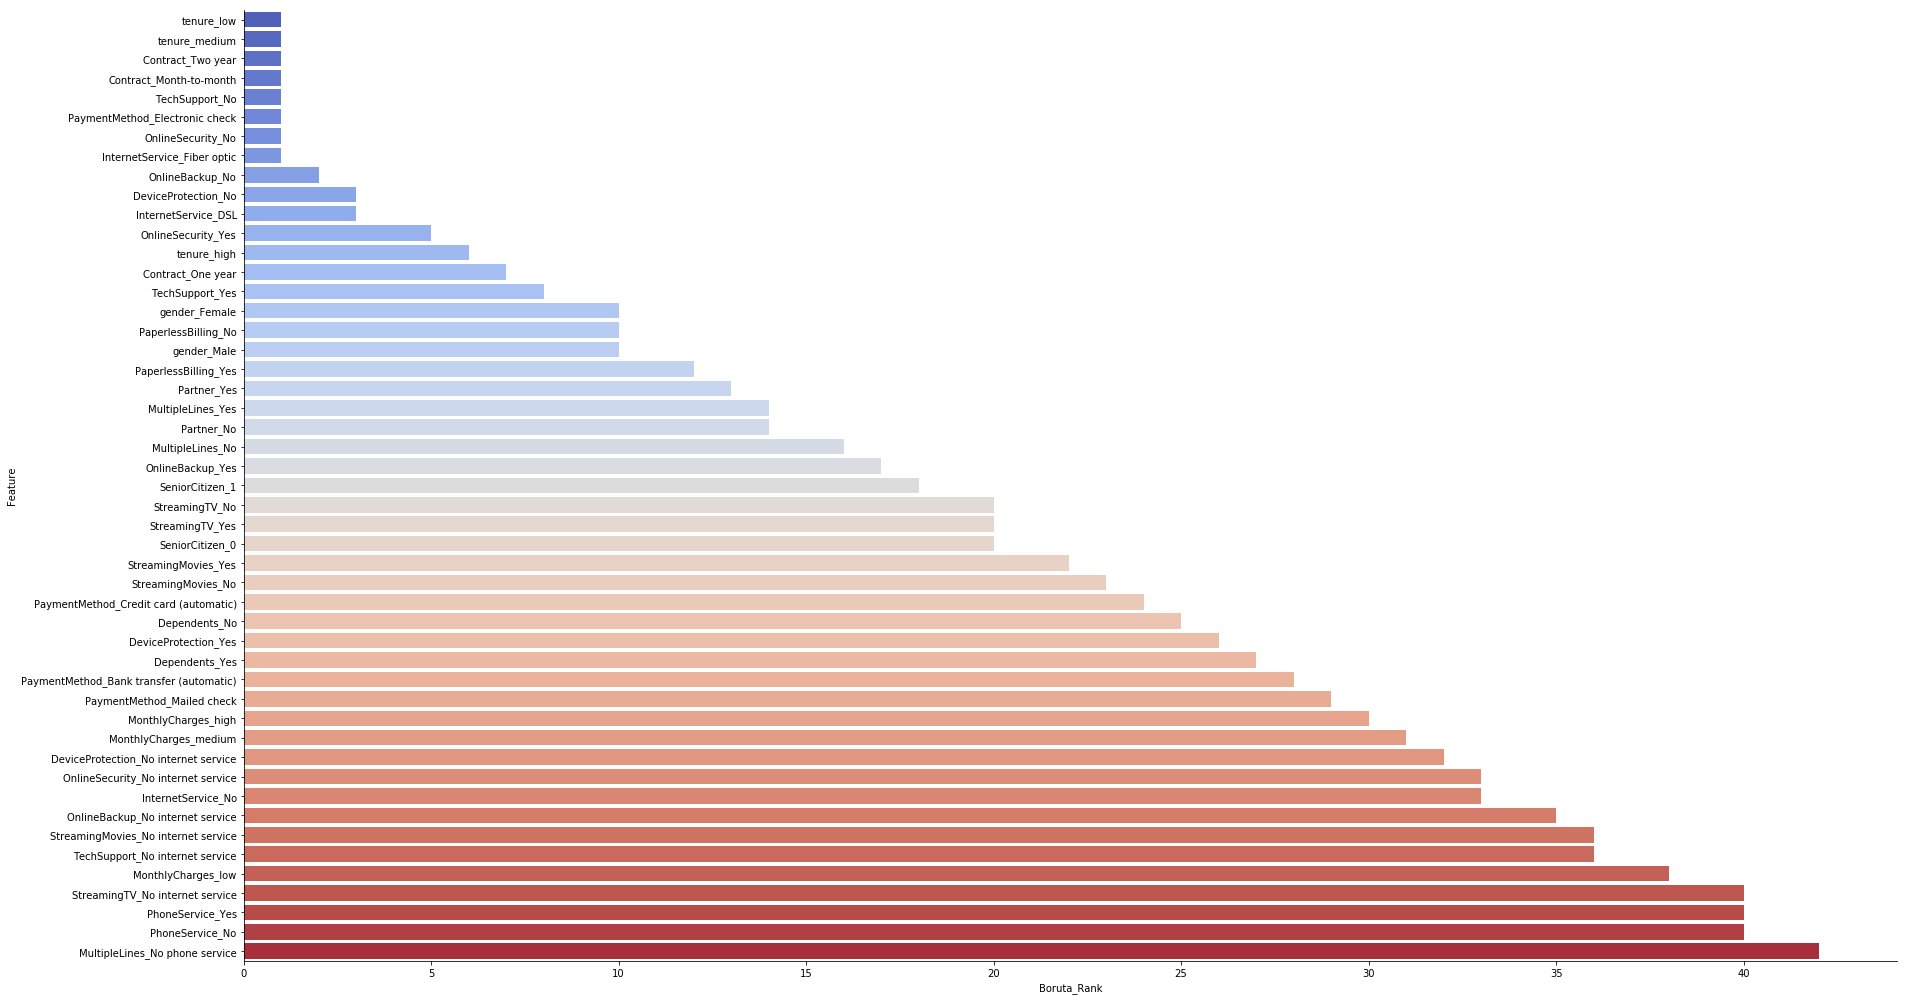

In [102]:
# Plot the ranking of the features
sns.factorplot(x='Boruta_Rank', y='Feature', data = df_features_rank, kind="bar", size=14, aspect=1.9, palette='coolwarm');
plt.figure(figsize=(20,20));

* Above plot gives us the ranking of features where top ranked features are strong predictors of customer Churn

**Feature selection technique using Boruta are used for following reasons:**
    
* Simplification of models to make them easier to interpret by users 
* Shorter training times
* Enhanced generalization by reducing Overfitting 

## Defining Hyperparameters
> From above feature selection method, it is easy to define some hyperparameters on the basis of Boruta Rank

* To select enough and concise number of parameters, variables of Rank 1 & 2 will suffice the need of effective input for high accuracy of prediction algorithms.

In [103]:
df_features_rank.head(9)

,0,1,2,3,4,5,6,7,8,9,...,7035,7036,7037,7038,7039,7040,7041,7042,Boruta_Rank,Feature
tenure_low,1,0,1,0,1,1,0,1,0,0,...,1,1,0,0,0,1,1,0,1,tenure_low
tenure_medium,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,tenure_medium
Contract_Two year,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,Contract_Two year
Contract_Month-to-month,1,0,1,0,1,1,1,1,1,0,...,1,0,0,0,0,1,1,0,1,Contract_Month-to-month
TechSupport_No,1,1,1,0,1,1,1,1,0,1,...,1,0,0,0,1,1,1,0,1,TechSupport_No
PaymentMethod_Electronic check,1,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,PaymentMethod_Electronic check
OnlineSecurity_No,1,0,0,0,1,1,1,0,1,0,...,1,1,0,0,1,0,1,0,1,OnlineSecurity_No
InternetService_Fiber optic,0,0,0,0,1,1,1,0,1,0,...,1,0,0,0,1,0,1,1,1,InternetService_Fiber optic
OnlineBackup_No,0,1,0,1,1,1,0,1,1,0,...,1,0,0,1,0,1,1,1,2,OnlineBackup_No


In [104]:
# Selecting important featutres
selected_features = df_features_rank.head(9).index

In [105]:
selected_features

Index(['tenure_low', 'tenure_medium', 'Contract_Two year',
       'Contract_Month-to-month', 'TechSupport_No',
       'PaymentMethod_Electronic check', 'OnlineSecurity_No',
       'InternetService_Fiber optic', 'OnlineBackup_No'],
      dtype='object')

* Above selected features will be used to train the different models using supervised approach for predicting Clients Churn. 

In [106]:
#Exporting new dataset with selected columns
X_selected = df_dummies[selected_features]
y_selected = df_dummies["Churn"]
X_selected.head()

,tenure_low,tenure_medium,Contract_Two year,Contract_Month-to-month,TechSupport_No,PaymentMethod_Electronic check,OnlineSecurity_No,InternetService_Fiber optic,OnlineBackup_No
0,1,0,0,1,1,1,1,0,0
1,0,1,0,0,1,0,0,0,1
2,1,0,0,1,1,0,0,0,0
3,0,1,0,0,0,0,0,0,1
4,1,0,0,1,1,1,1,1,1


# Machine Learning: Training Models

### Split Training and Testing Dataset

Splitting to 80% training and 20% testing

In [107]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_selected, y_selected, test_size=0.20, random_state=7)

To predict the customer Churn, we have used 4 following algorithms

* Logistic Regression
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier

To compare different models, using Kfold method and know the best model to predict the test data

In [108]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.798759 (0.013001)
KNN: 0.767464 (0.033844)
CART: 0.796447 (0.012383)
RF: 0.795203 (0.015226)


Predciting using all models on test dataset

In [109]:
# Make predictions on test dataset
models = []
accuracy_list = []
trained_models = {}
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

for name, model in models:
    model.fit(X_train, y_train)
    trained_models[name] = model
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    accuracy_list.append((name,acc))

In [110]:
#Creating a dataframe for the models metrics
models_metrics = pd.DataFrame(accuracy_list, columns=["Model", "Accuracy"]) 

In [111]:
models_metrics['Model_Rank'] = models_metrics['Accuracy'].rank(ascending=False, method='first')
models_metrics

,Model,Accuracy,Model_Rank
0,LogisticRegression,0.788913,1.0
1,KNeighborsClassifier,0.778252,4.0
2,DecisionTreeClassifier,0.783937,3.0
3,RandomForestClassifier,0.785359,2.0


By implementing above models on test data for predictions, we get the above metrics by rank, where Ranks are given to the models as per their accuracy score

In [112]:
# Store the result into csv
models_metrics.to_csv('metrics_score.csv', index=False)

**The above metrics shows that Logistic Regression model is the best model and have good overall prediction.**

# Pickle
>Serialization is the process of translating data structures or object state into a format that can be stored (for example, in a file or memory buffer) or transmitted (For example, across a network) and reconstructed later (possibly in a different computer environment).

**Pickle** is the standard way of serializing objects in Python. We can use the pickle operation to serialize our machine learning algorithms and save the serialized format to a file. Later we can load this file to deserialize our model and use it to make new predictions.

In [113]:
# Rank Dictionary
rank_dict = pd.Series(models_metrics.Model_Rank.values, index=models_metrics.Model.values).to_dict()

In [114]:
rank_dict

{'DecisionTreeClassifier': 3.0,
 'KNeighborsClassifier': 4.0,
 'LogisticRegression': 1.0,
 'RandomForestClassifier': 2.0}

In [115]:
# Dictionary with Key:Value pair as Rank:[model, model_name]
trained_models_with_rank = {}
for key, value in rank_dict.items():
    trained_models_with_rank[rank_dict[key]] = [value1 for key1, value1 in trained_models.items() if key == key1]
    trained_models_with_rank[rank_dict[key]].append(key)

In [116]:
trained_models_with_rank

{1.0: [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False), 'LogisticRegression'],
 2.0: [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False),
  'RandomForestClassifier'],
 3.0: [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples

* Following will save the pickle format in a file

In [117]:
# Save the model to disk
filename = 'pickled_models.pkl'
pickle.dump(trained_models_with_rank, open(filename, 'wb'), protocol=2)

# Conclusion

In this project a customer churn analysis was presented in a Telecommunication sector. The analysis focused on churn prediction based on various predictive models using supervised approach. The different models predicted the actual churners relatively well. Models did work almost as the random probabilities. There is no difference between the models input which indicates nature of the churning customer profile. Accuracy measure formulate one standard model that could be used as the predictive model in the future. The findings of this study indicate that, in case of logistic regression model, the user should update the model to be able to produce predictions with high accuracy.

All these results together give us an important tool when the company wants to decide which clients to focus their resources to try to avoid them leaving so you can leverage your resources in the best way possible.

### Solutions Proposed

* By using best model, prioritize the concerns of churning customers first.
* Leverage the time to improve quality of services, of the high cost services like Fibre optic.
* Collect customer feedback and act it on immediately to prevent customer churn.

### Future Work

* Customer profile should be included in the data for a company’s perspective whether the churning customer are worth retaining or not.
* A probabilistic model can be introduced to list the clients with highest chance of leaving.

# References

* https://www.ibm.com/
* https://towardsdatascience.com/predict-customer-churn-with-r-9e62357d47b4
* http://www.vtt.fi/inf/julkaisut/muut/2006/customer_churn_case_study.pdf
* https://github.com/Atreya22/luigi_rosmann_sales
* https://pythontips.com/2013/08/02/what-is-pickle-in-python/